In [1]:
import pandas as pd
import os
data_folder = r"C:\Users\valin\OneDrive\DataGenieHackathon\data"  

def load_time_series_data(granularity_folder):
    time_series_data = []
    folder_path = os.path.join(data_folder, granularity_folder)
    
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return time_series_data
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            if "point_timestamp" in df.columns and "point_value" in df.columns:
                df["point_timestamp"] = pd.to_datetime(df["point_timestamp"])
                time_series_data.append(df)
            else:
                print(f"File {file_name} does not have the expected columns.")
    
    return time_series_data

granularities = ["hourly", "daily", "weekly", "monthly"]
all_data = {}

for granularity in granularities:
    print(f"Loading {granularity} data...")
    all_data[granularity] = load_time_series_data(granularity)

for granularity, data_list in all_data.items():
    print(f"{granularity}: {len(data_list)} time series loaded.")

Loading hourly data...
Loading daily data...
Loading weekly data...
Loading monthly data...
hourly: 10 time series loaded.
daily: 10 time series loaded.
weekly: 7 time series loaded.
monthly: 9 time series loaded.


Pre-processing 

In [4]:
import pandas as pd


def preprocess_time_series(df, dataset_name="Unknown Dataset"):
    print(f"\nProcessing: {dataset_name}")
    print(f"Original shape: {df.shape}")
    
    df = df.rename(columns={"point_timestamp": "timestamp", "point_value": "value"})
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp").reset_index(drop=True)
    missing_before = df["value"].isna().sum()
    print(f"Missing values before: {missing_before}")
    
    df["value"] = df["value"].interpolate(method="linear")
    df["value"] = df["value"].fillna(method="ffill").fillna(method="bfill")
    
    missing_after = df["value"].isna().sum()
    print(f"Missing values after: {missing_after}")
    
    start_date = df["timestamp"].min()
    end_date = df["timestamp"].max()
    print(f"Time range: {start_date} to {end_date}")
    
    print("\nSample data (head):")
    print(df.head())
    print("\nSample data (tail):")
    print(df.tail())
    
    print(f"\nCompleted processing {dataset_name}. Clean shape: {df.shape}")
    
    return df

for granularity, data_list in all_data.items():
    print(f"\nPreprocessing {granularity.upper()} data...")
    processed_data_list = []
    
    for idx, df in enumerate(data_list):
        dataset_name = f"{granularity}_series_{idx + 1}"
        processed_df = preprocess_time_series(df, dataset_name)
        processed_data_list.append(processed_df)
    
    all_data[granularity] = processed_data_list

print("\nPreprocessing completed for ALL datasets! Ready for next step.")



Preprocessing HOURLY data...

Processing: hourly_series_1
Original shape: (1512, 3)
Missing values before: 0
Missing values after: 0
Time range: 2022-08-10 19:00:00 to 2022-10-12 18:00:00

Sample data (head):
   Unnamed: 0           timestamp       value
0           0 2022-08-10 19:00:00  554.514832
1           1 2022-08-10 20:00:00  504.927783
2           2 2022-08-10 21:00:00  496.388722
3           3 2022-08-10 22:00:00  425.086839
4           4 2022-08-10 23:00:00  513.480670

Sample data (tail):
      Unnamed: 0           timestamp       value
1507        1507 2022-10-12 14:00:00  572.217117
1508        1508 2022-10-12 15:00:00  609.115585
1509        1509 2022-10-12 16:00:00  527.769286
1510        1510 2022-10-12 17:00:00  618.195173
1511        1511 2022-10-12 18:00:00  510.181469

Completed processing hourly_series_1. Clean shape: (1512, 3)

Processing: hourly_series_2
Original shape: (228, 3)
Missing values before: 0
Missing values after: 0
Time range: 2022-12-08 13:00:00 to

C:\Users\valin\AppData\Local\Temp\ipykernel_14912\2732189870.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["value"] = df["value"].fillna(method="ffill").fillna(method="bfill")
C:\Users\valin\AppData\Local\Temp\ipykernel_14912\2732189870.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["value"] = df["value"].fillna(method="ffill").fillna(method="bfill")
C:\Users\valin\AppData\Local\Temp\ipykernel_14912\2732189870.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["value"] = df["value"].fillna(method="ffill").fillna(method="bfill")
C:\Users\valin\AppData\Local\Temp\ipykernel_14912\2732189870.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill(

EDA , Time Series Visualization,Autocorrelation and Partial Autocorrelation (ACF/PACF),Seasonality Decomposition - done for understanding of dataset


Plotting hourly data for hourly_series_1...

EDA for hourly_series_1:
        Unnamed: 0            timestamp        value
count  1512.000000                 1512  1512.000000
mean    755.500000  2022-09-11 06:30:00   566.949575
min       0.000000  2022-08-10 19:00:00   307.389626
25%     377.750000  2022-08-26 12:45:00   534.691315
50%     755.500000  2022-09-11 06:30:00   561.625520
75%    1133.250000  2022-09-27 00:15:00   592.245784
max    1511.000000  2022-10-12 18:00:00  1531.098238
std     436.621117                  NaN    66.248057
Missing values in hourly_series_1:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


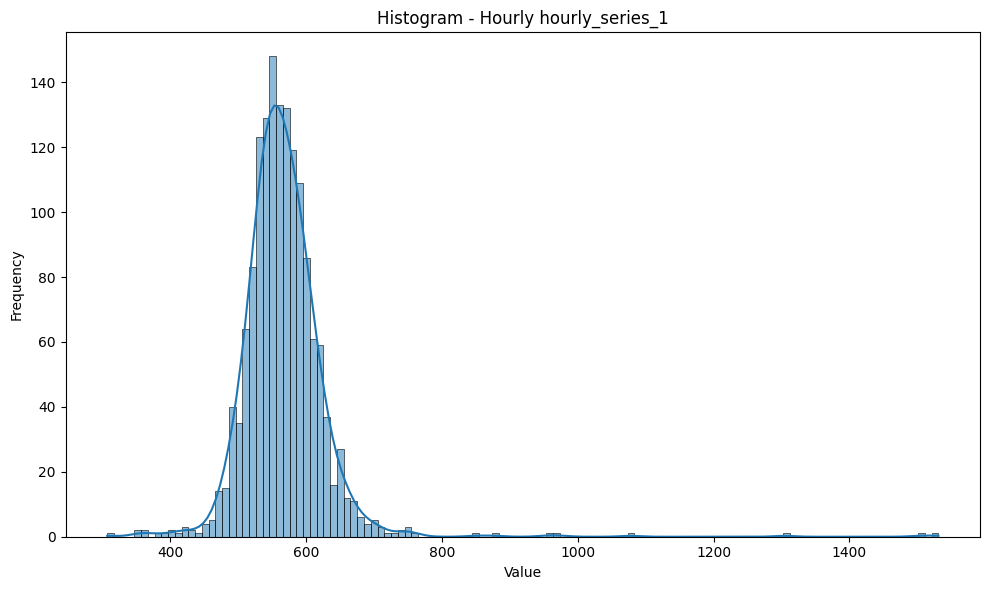

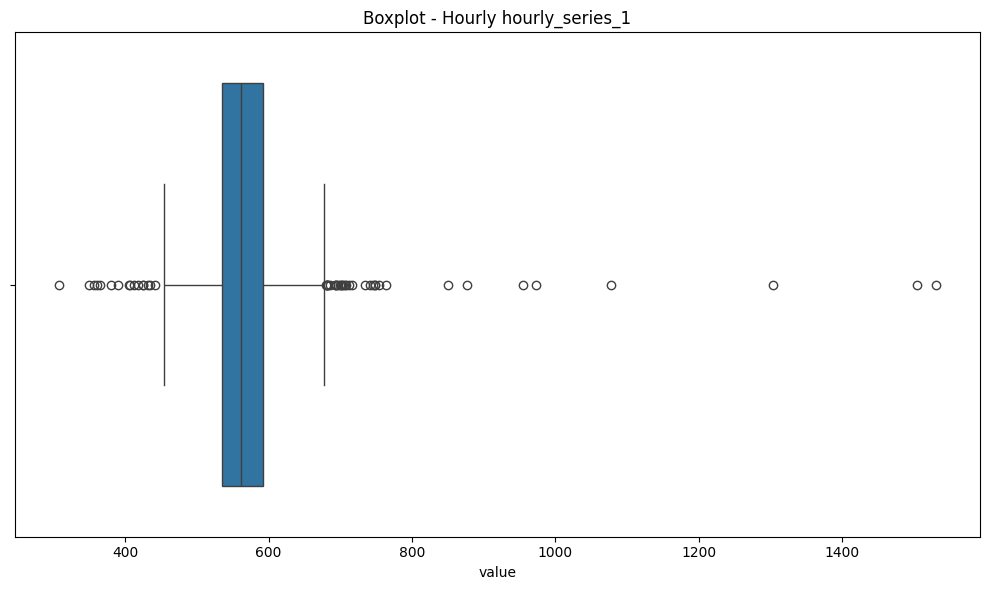

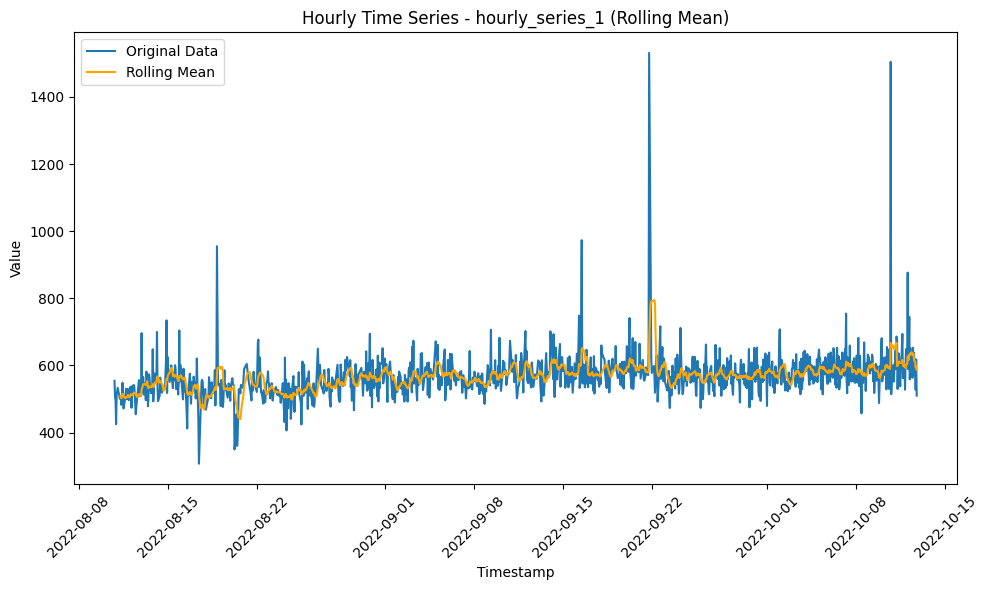

<Figure size 1000x600 with 0 Axes>

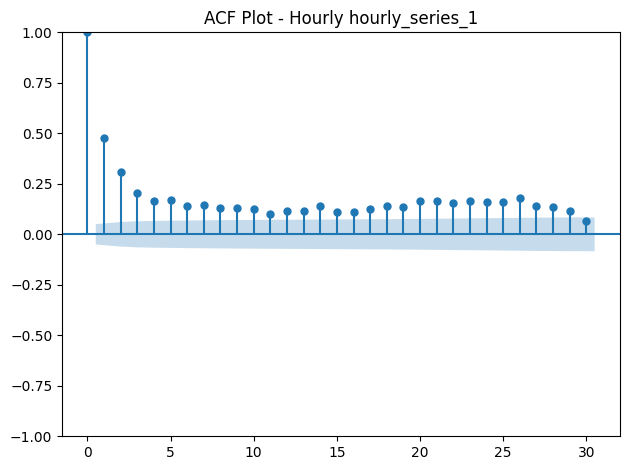

<Figure size 1000x600 with 0 Axes>

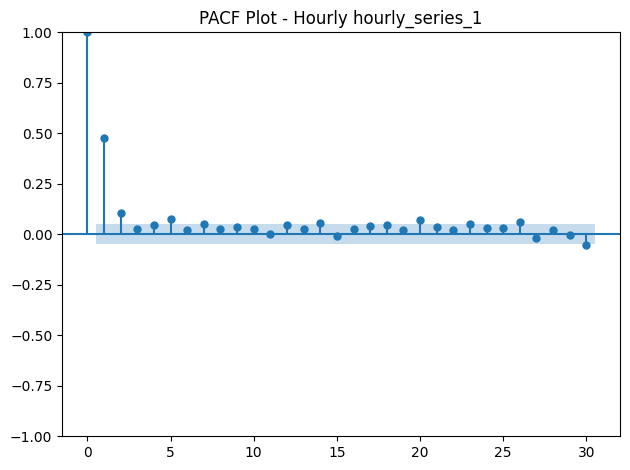

Decomposing series hourly_series_1 with period=12...


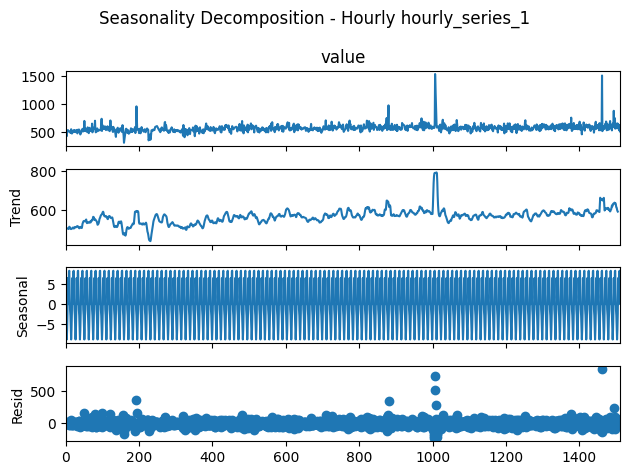

Plotting hourly data for hourly_series_2...

EDA for hourly_series_2:
       Unnamed: 0            timestamp       value
count   228.00000                  228  228.000000
mean    113.50000  2022-12-13 06:30:00   22.539474
min       0.00000  2022-12-08 13:00:00    6.000000
25%      56.75000  2022-12-10 21:45:00   16.000000
50%     113.50000  2022-12-13 06:30:00   22.000000
75%     170.25000  2022-12-15 15:15:00   26.000000
max     227.00000  2022-12-18 00:00:00  151.000000
std      65.96211                  NaN   11.455073
Missing values in hourly_series_2:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


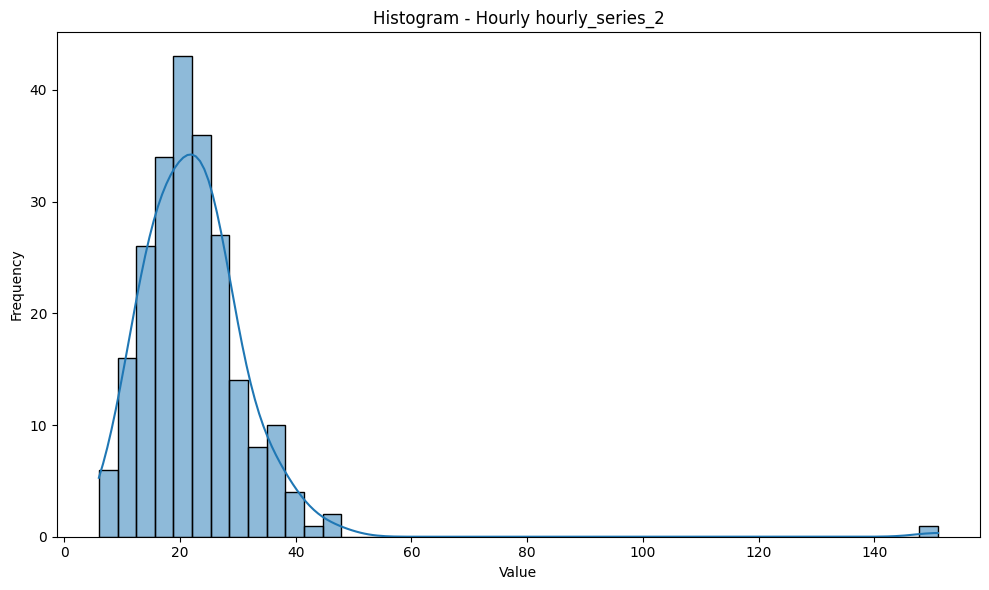

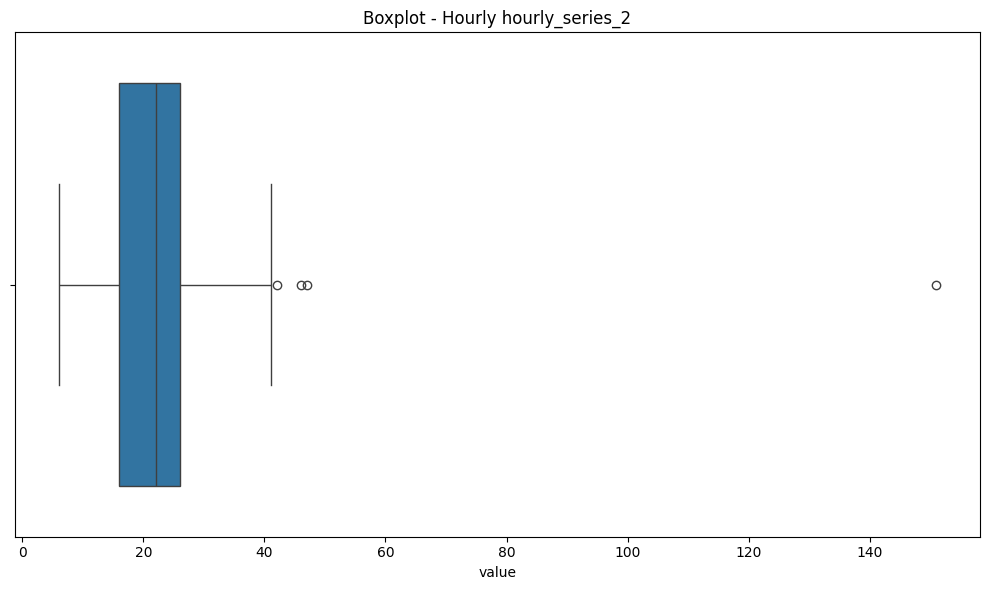

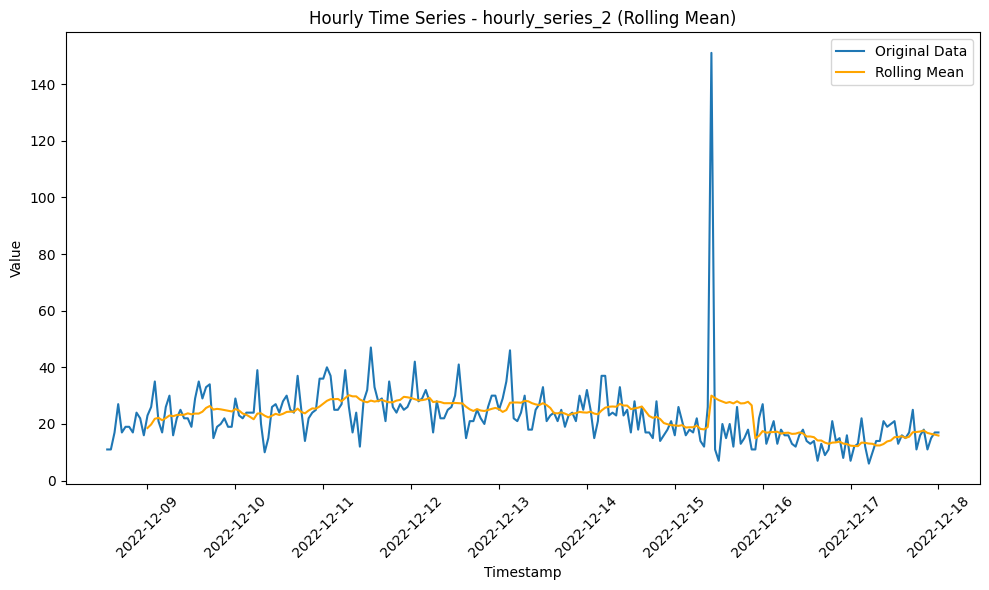

<Figure size 1000x600 with 0 Axes>

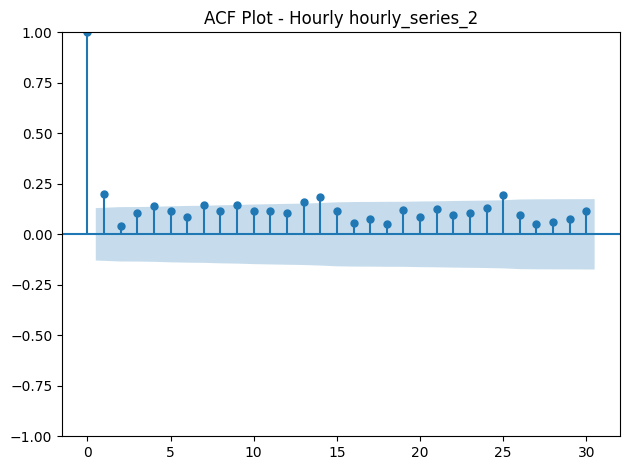

<Figure size 1000x600 with 0 Axes>

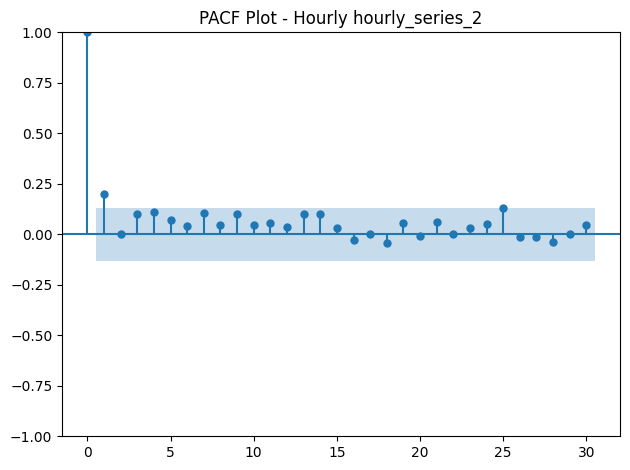

Decomposing series hourly_series_2 with period=12...


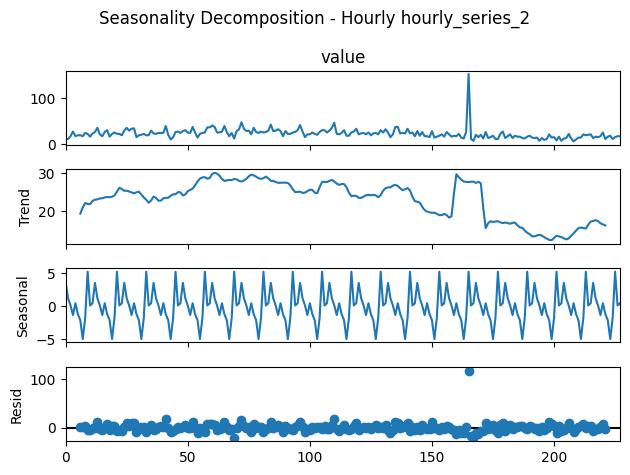

Plotting hourly data for hourly_series_3...

EDA for hourly_series_3:
       Unnamed: 0            timestamp      value
count   81.000000                   81  81.000000
mean    40.000000  2022-11-24 08:00:00 -92.580245
min      0.000000  2022-11-22 16:00:00 -92.848418
25%     20.000000  2022-11-23 12:00:00 -92.643012
50%     40.000000  2022-11-24 08:00:00 -92.579820
75%     60.000000  2022-11-25 04:00:00 -92.519742
max     80.000000  2022-11-26 00:00:00 -92.280957
std     23.526581                  NaN   0.119331
Missing values in hourly_series_3:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


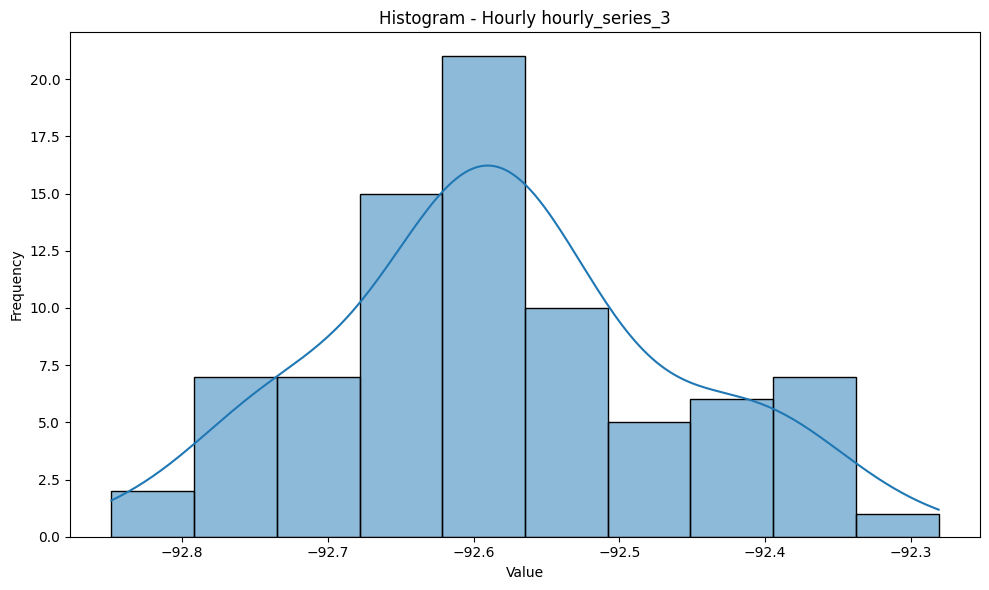

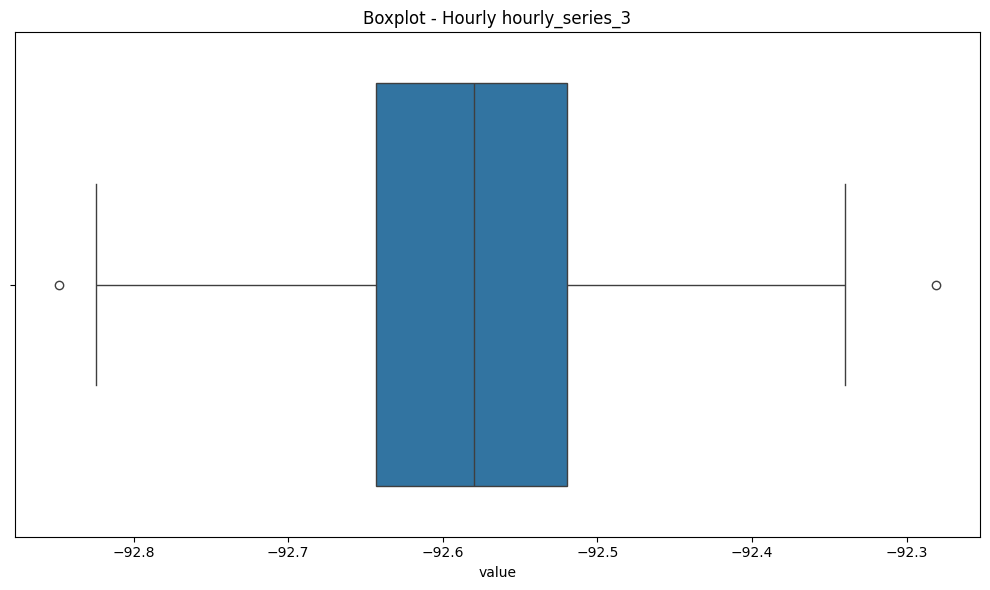

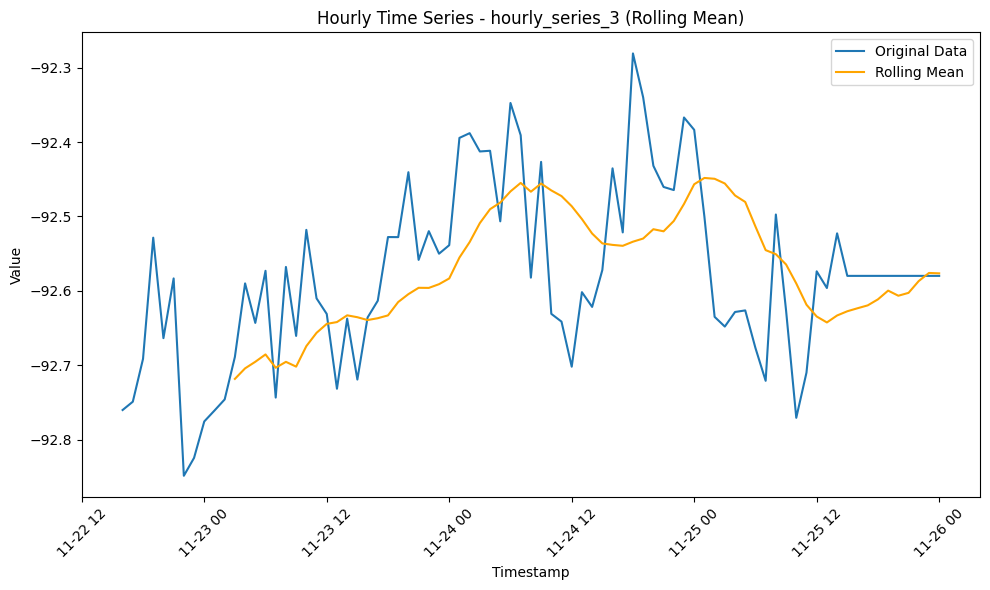

<Figure size 1000x600 with 0 Axes>

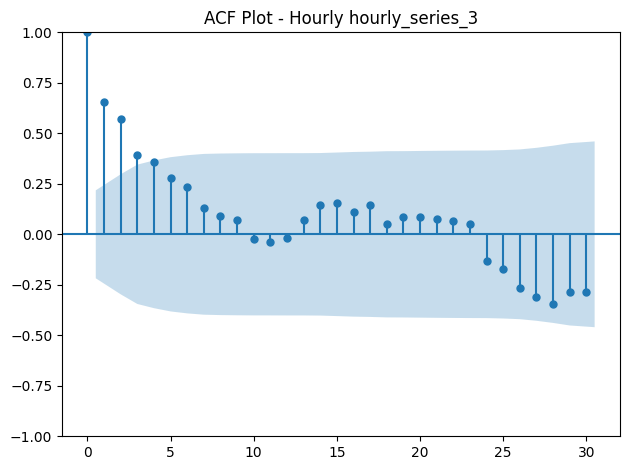

<Figure size 1000x600 with 0 Axes>

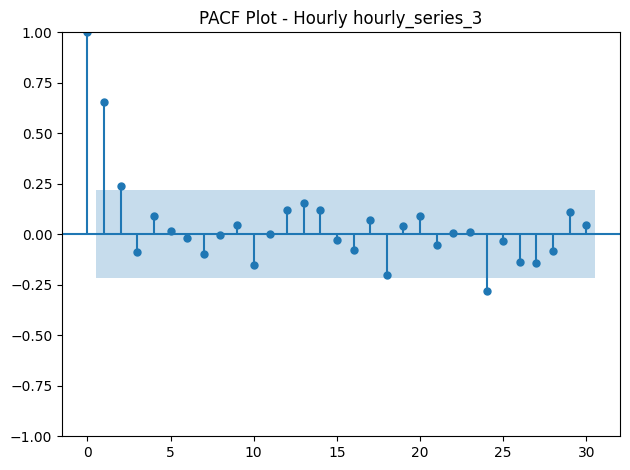

Decomposing series hourly_series_3 with period=12...


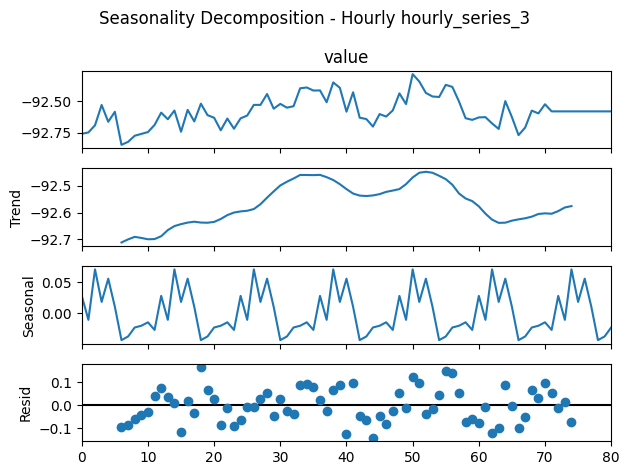

Plotting hourly data for hourly_series_4...

EDA for hourly_series_4:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-22 07:14:52.799999744     0.000063
min       0.000000            2019-09-01 00:00:00     0.000000
25%     249.750000            2019-09-11 20:45:00     0.000000
50%     499.500000            2019-09-22 06:30:00     0.000000
75%     749.250000            2019-10-02 21:15:00     0.000000
max     999.000000            2019-10-13 10:00:00     0.062500
std     288.819436                            NaN     0.001976
Missing values in hourly_series_4:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


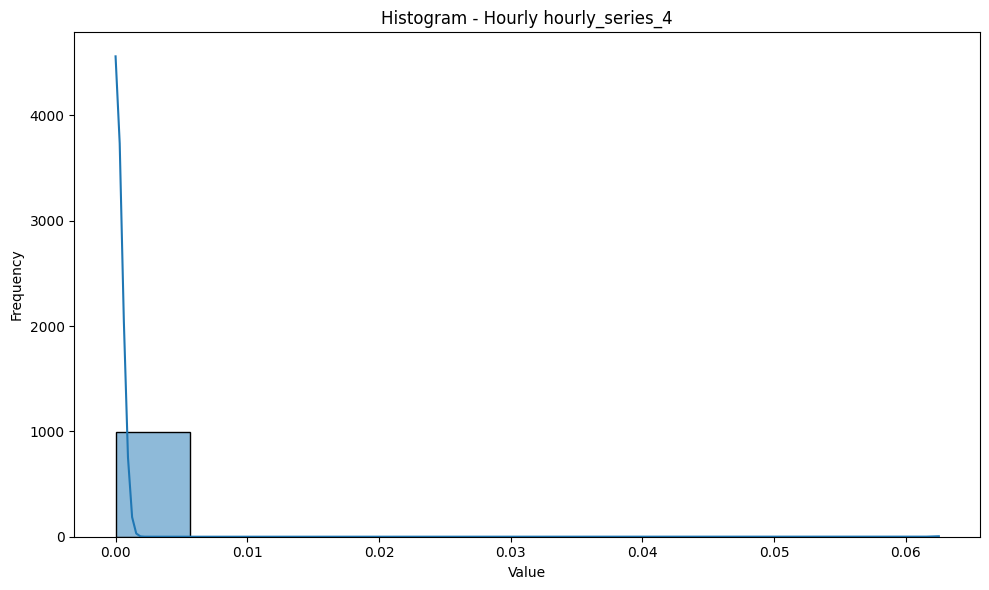

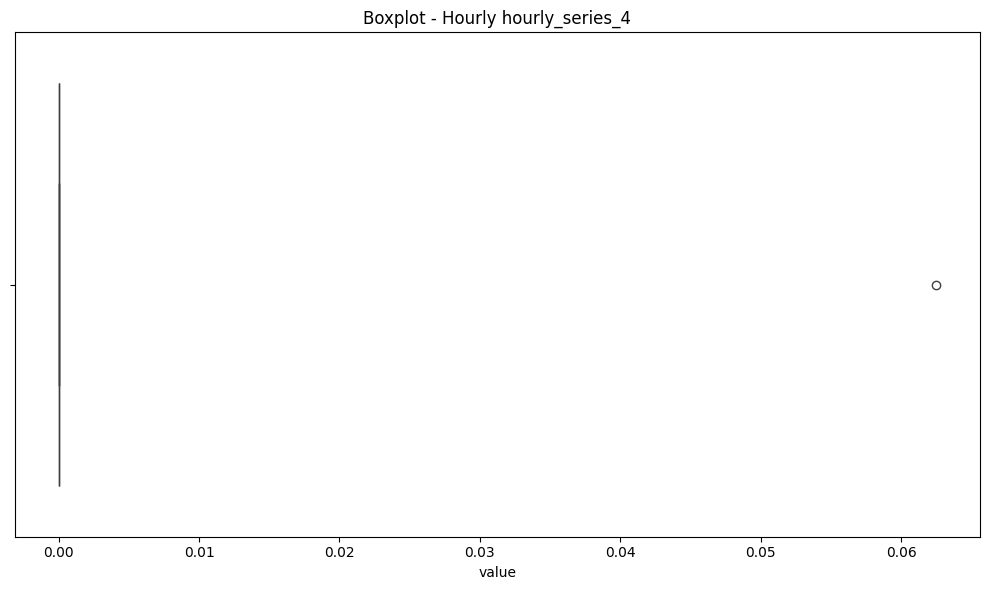

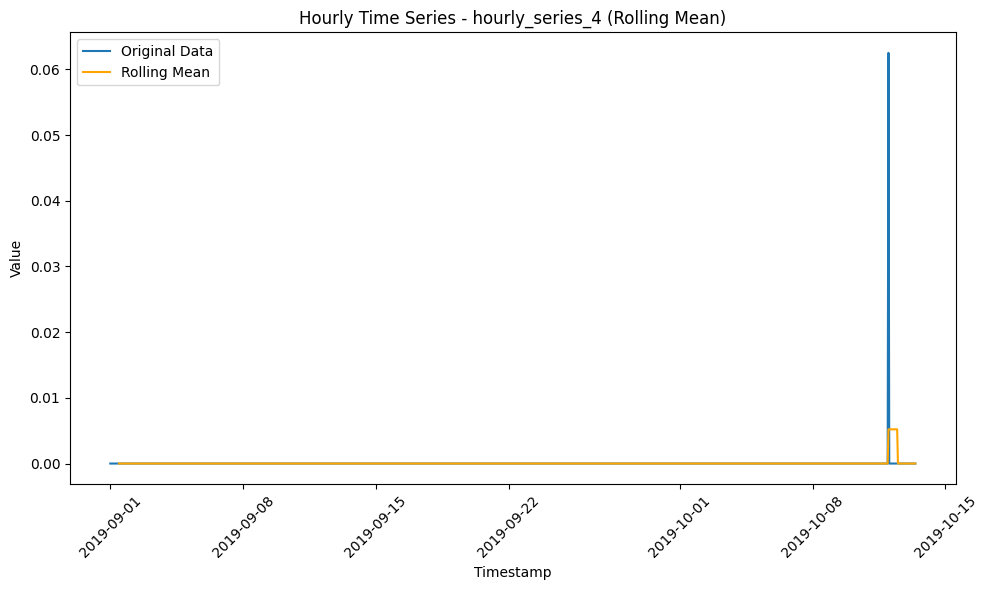

<Figure size 1000x600 with 0 Axes>

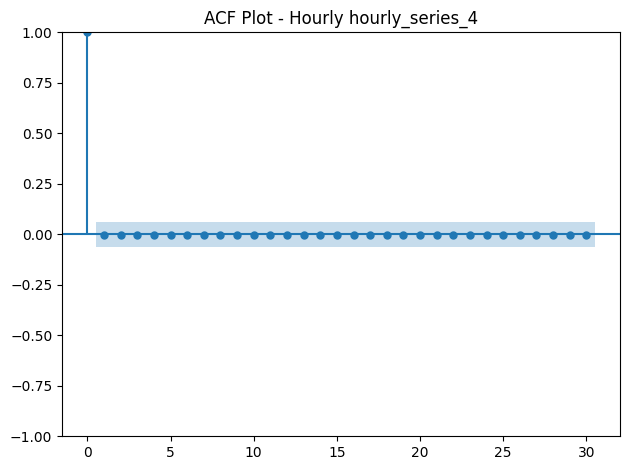

<Figure size 1000x600 with 0 Axes>

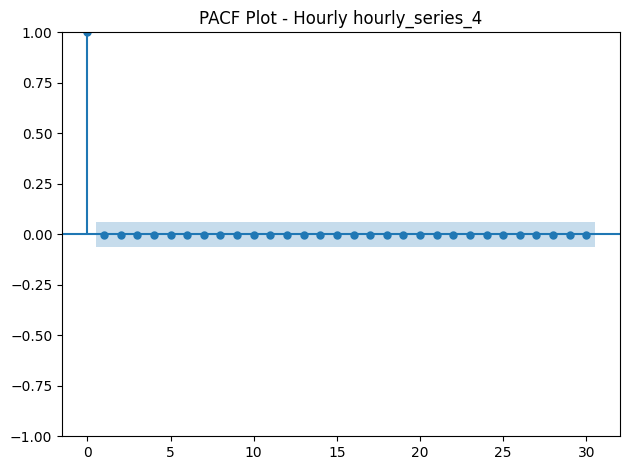

Decomposing series hourly_series_4 with period=12...


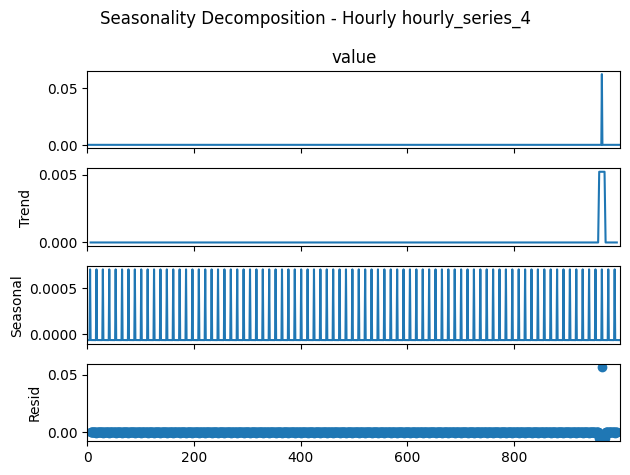

Plotting hourly data for hourly_series_5...

EDA for hourly_series_5:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-21 19:29:59.999999744     0.000128
min       0.000000            2019-09-01 00:00:00     0.000000
25%     249.750000            2019-09-11 09:45:00     0.000000
50%     499.500000            2019-09-21 19:30:00     0.000000
75%     749.250000            2019-10-02 05:15:00     0.000000
max     999.000000            2019-10-12 15:00:00     0.027027
std     288.819436                            NaN     0.001523
Missing values in hourly_series_5:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


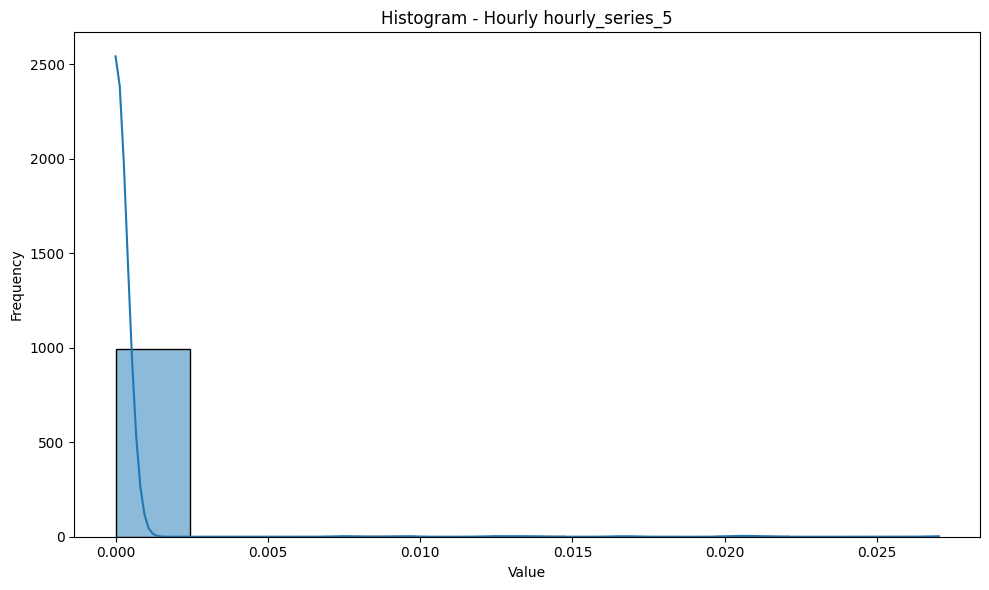

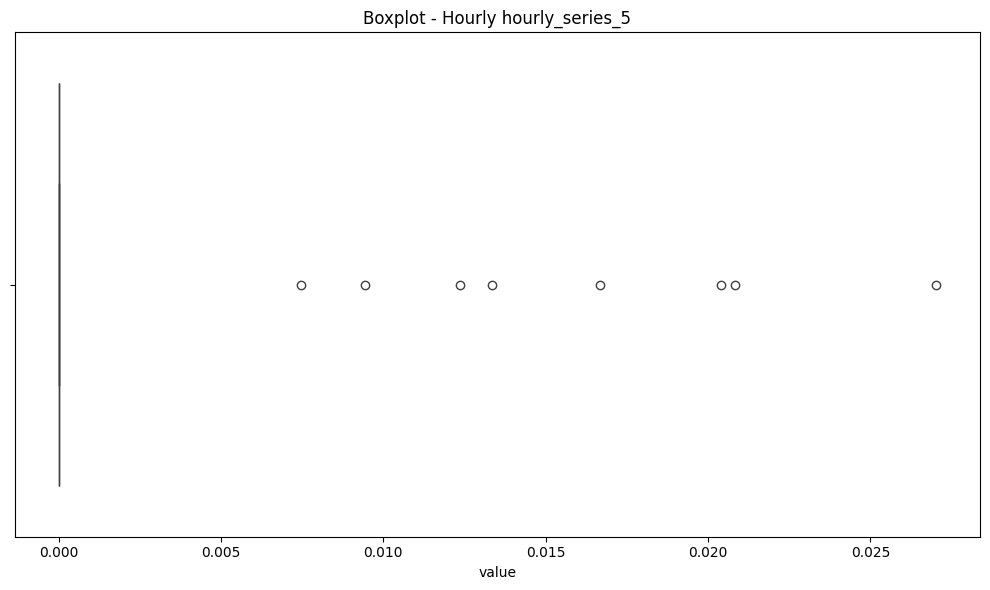

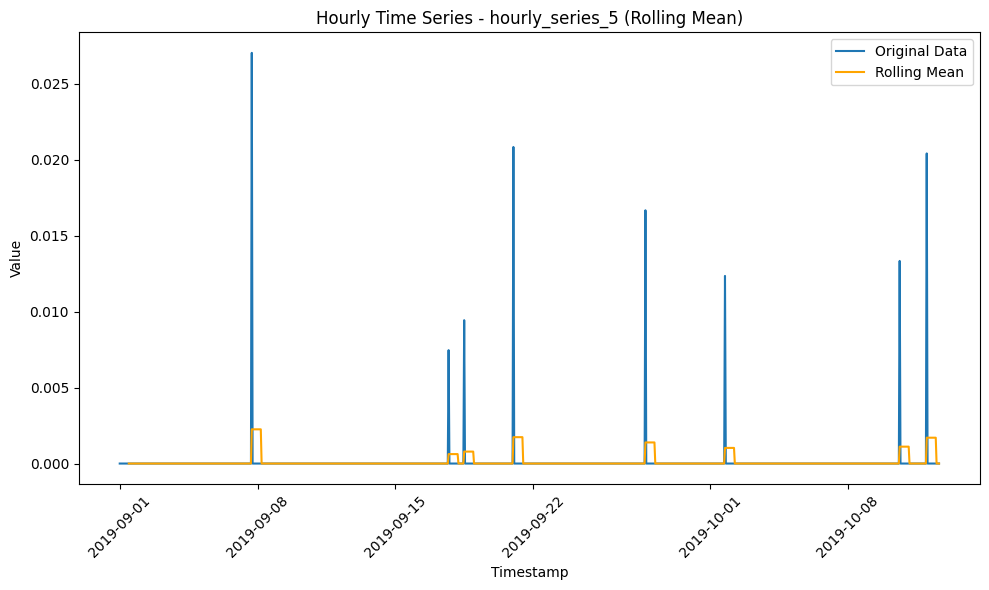

<Figure size 1000x600 with 0 Axes>

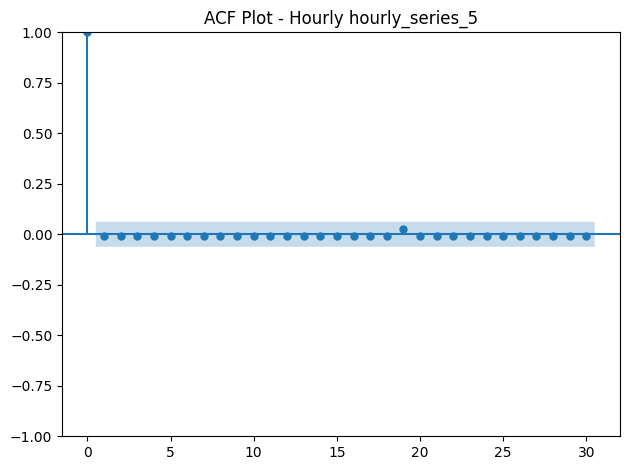

<Figure size 1000x600 with 0 Axes>

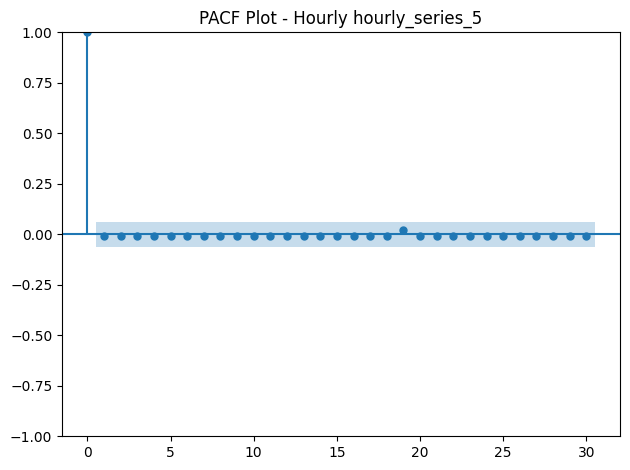

Decomposing series hourly_series_5 with period=12...


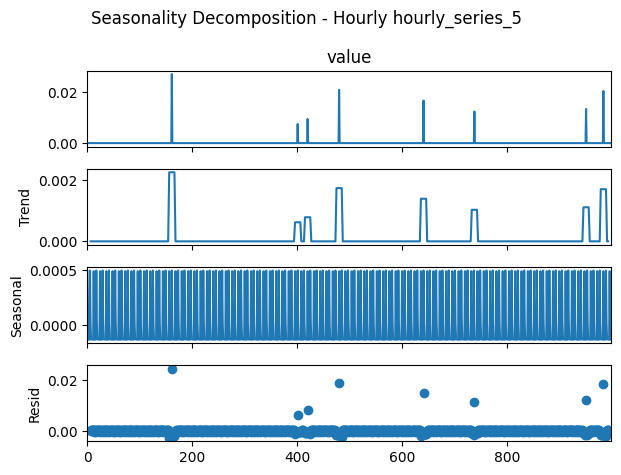

Plotting hourly data for hourly_series_6...

EDA for hourly_series_6:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-21 19:29:59.999999744     0.080813
min       0.000000            2019-09-01 00:00:00     0.058061
25%     249.750000            2019-09-11 09:45:00     0.075316
50%     499.500000            2019-09-21 19:30:00     0.080898
75%     749.250000            2019-10-02 05:15:00     0.085777
max     999.000000            2019-10-12 15:00:00     0.111192
std     288.819436                            NaN     0.007967
Missing values in hourly_series_6:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


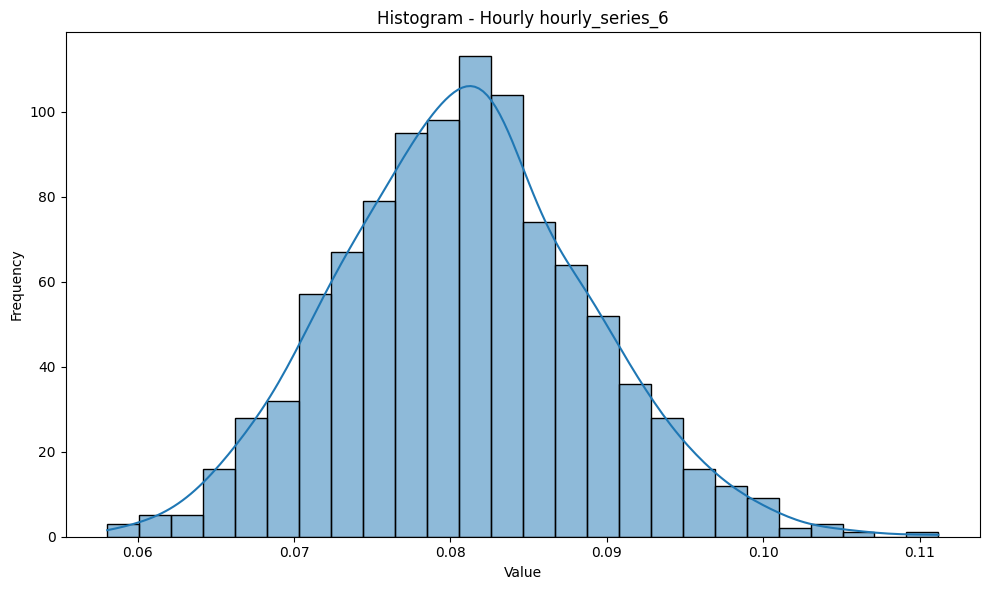

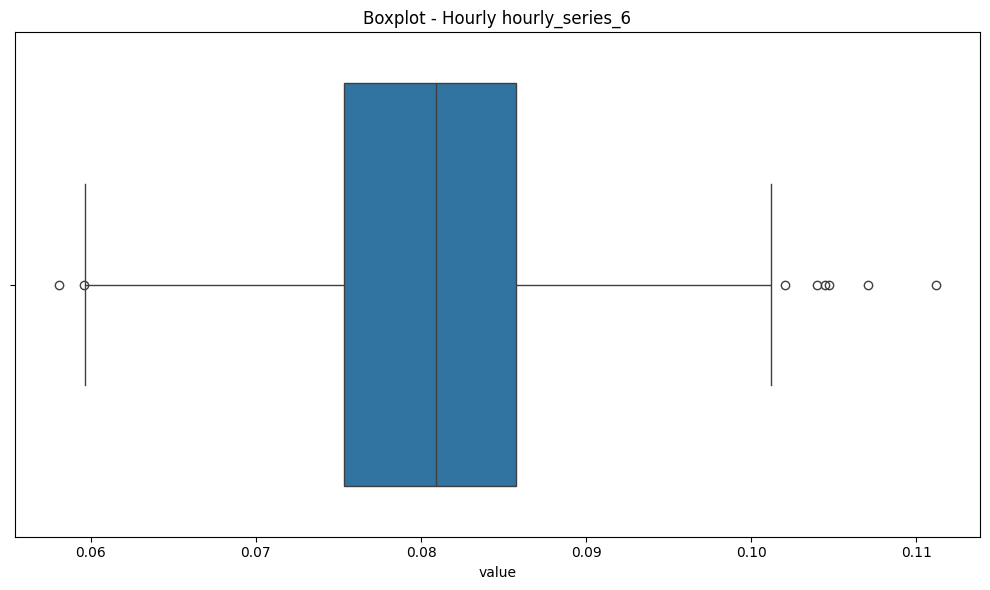

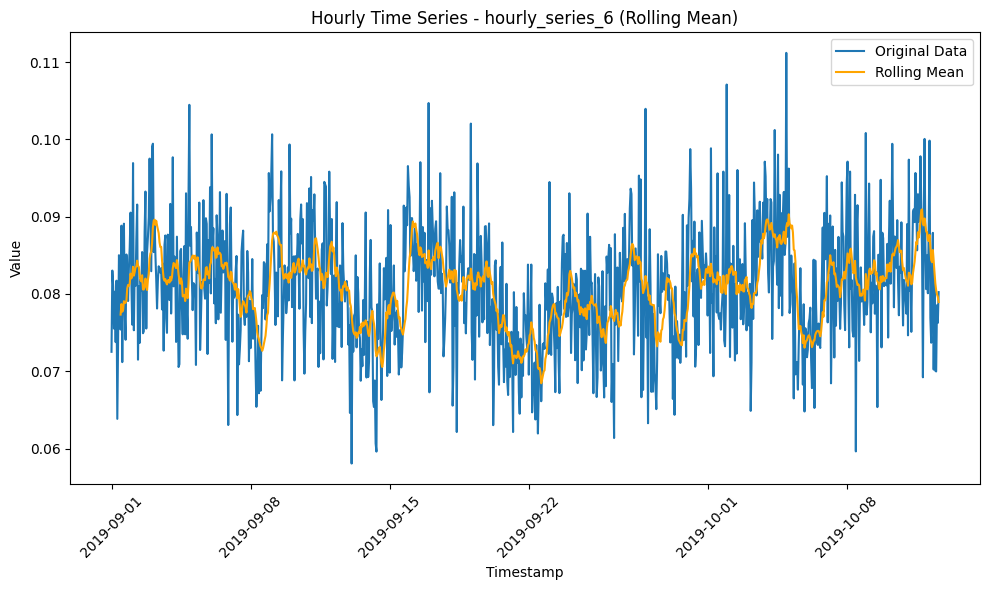

<Figure size 1000x600 with 0 Axes>

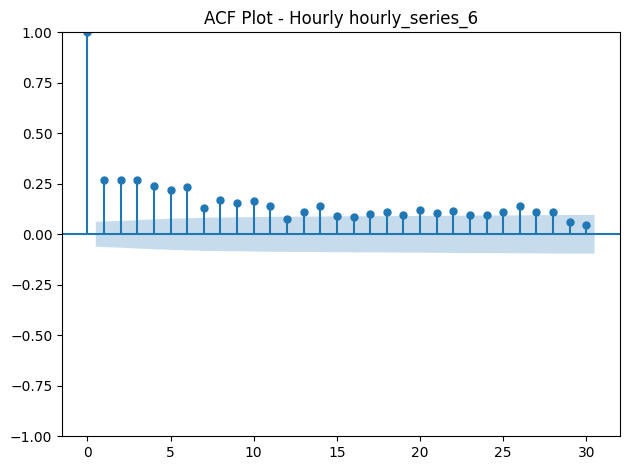

<Figure size 1000x600 with 0 Axes>

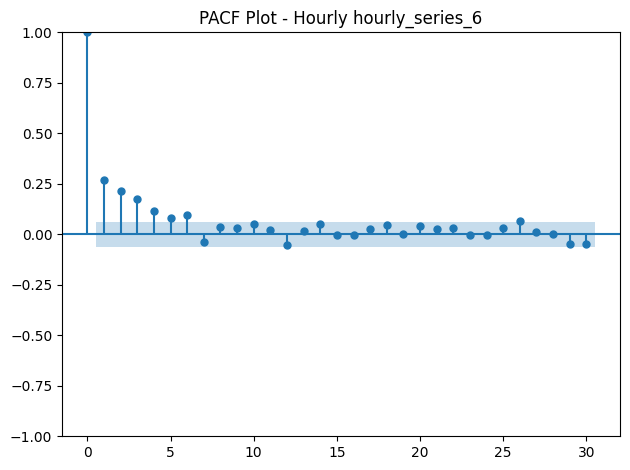

Decomposing series hourly_series_6 with period=12...


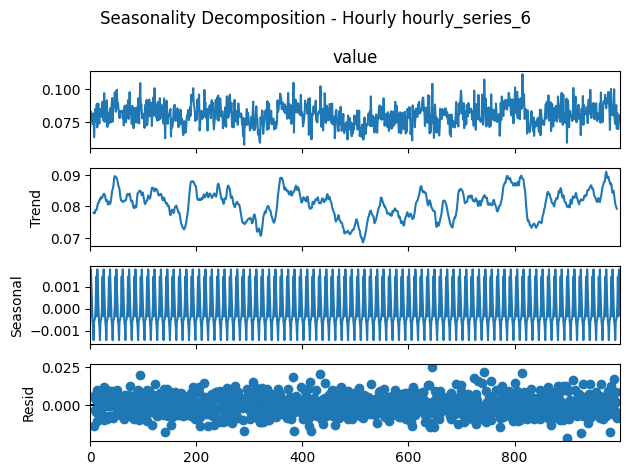

Plotting hourly data for hourly_series_7...

EDA for hourly_series_7:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-21 19:29:59.999999744     0.080813
min       0.000000            2019-09-01 00:00:00     0.058061
25%     249.750000            2019-09-11 09:45:00     0.075316
50%     499.500000            2019-09-21 19:30:00     0.080898
75%     749.250000            2019-10-02 05:15:00     0.085777
max     999.000000            2019-10-12 15:00:00     0.111192
std     288.819436                            NaN     0.007967
Missing values in hourly_series_7:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


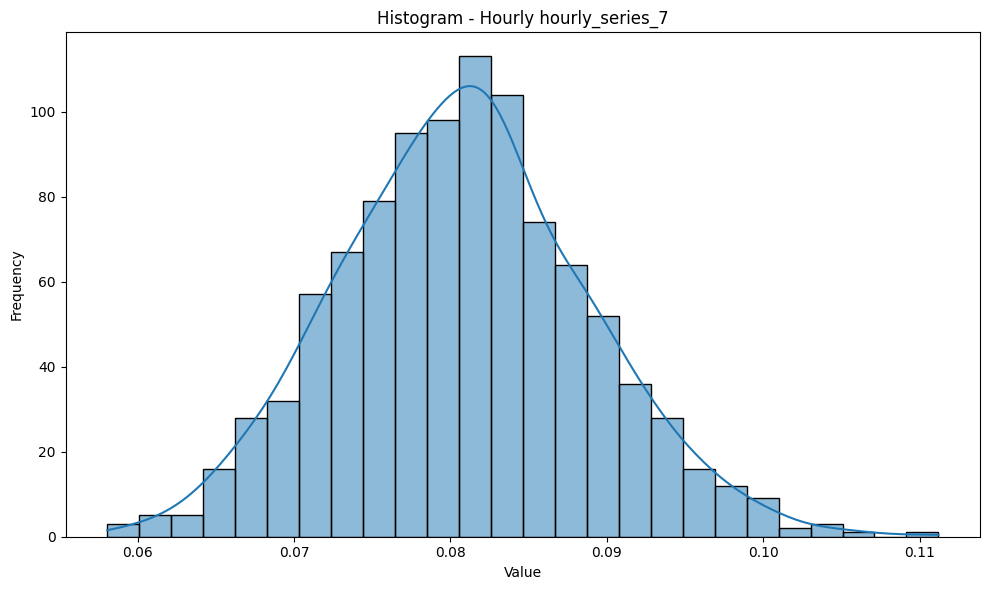

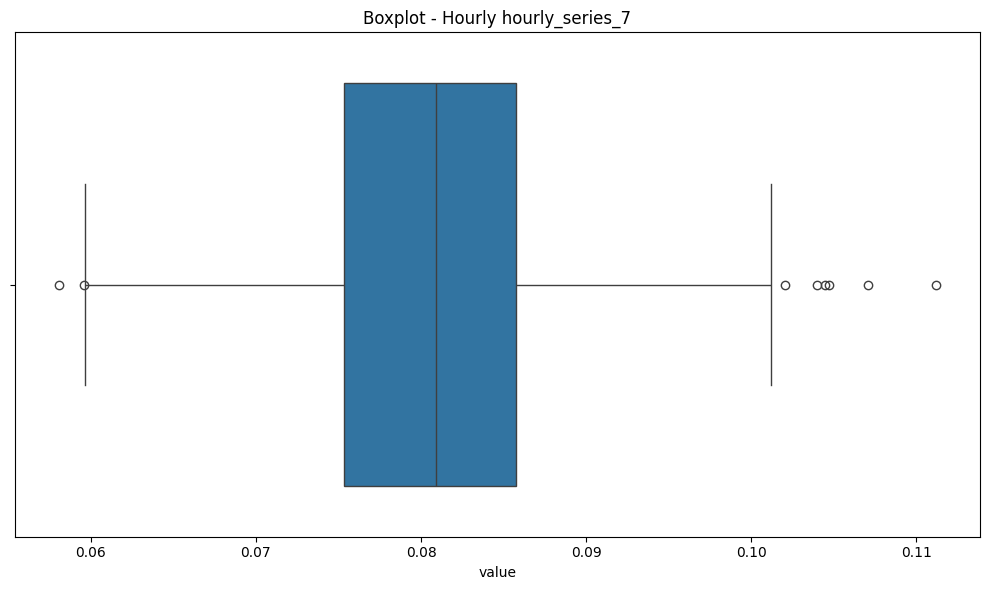

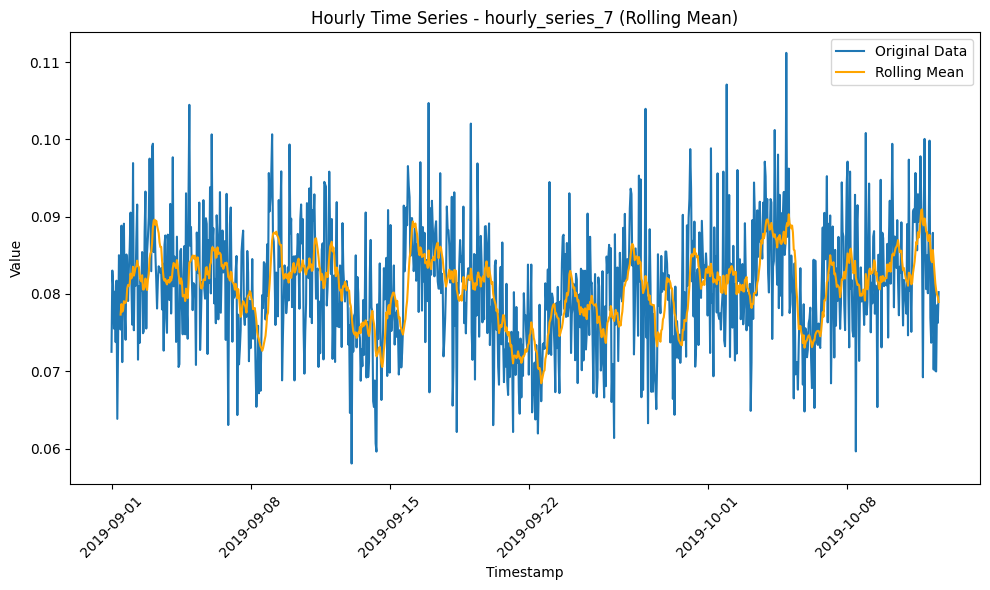

<Figure size 1000x600 with 0 Axes>

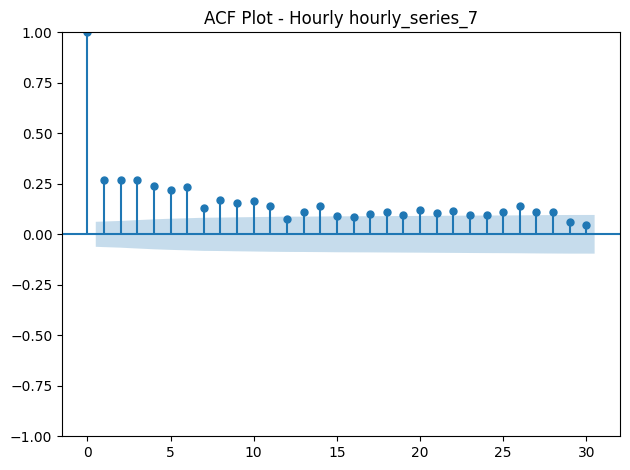

<Figure size 1000x600 with 0 Axes>

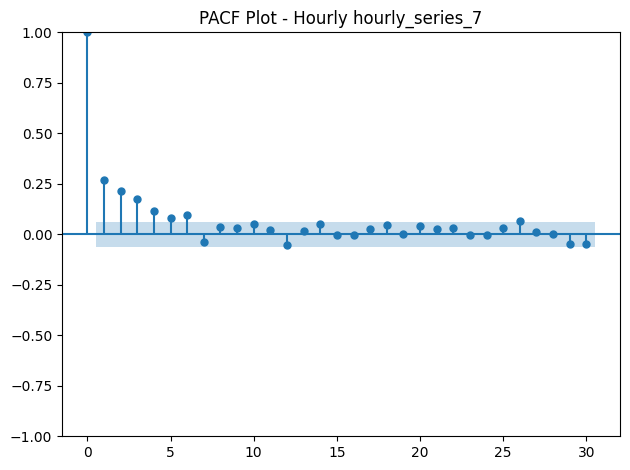

Decomposing series hourly_series_7 with period=12...


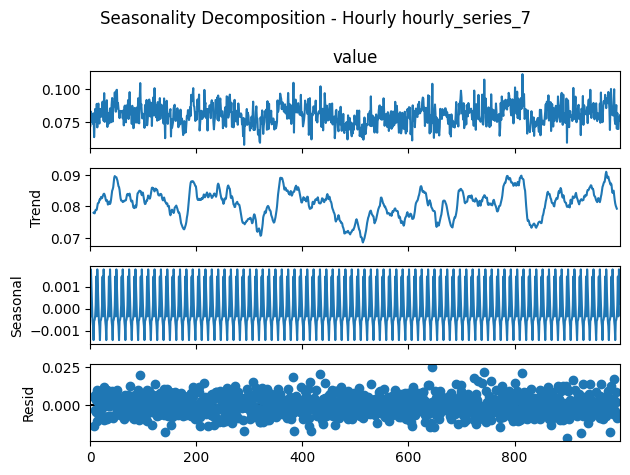

Plotting hourly data for hourly_series_8...

EDA for hourly_series_8:
       Unnamed: 0                      timestamp       value
count  833.000000                            833  833.000000
mean   416.000000  2019-11-16 17:28:40.048019200    0.067707
min      0.000000            2019-09-01 17:00:00    0.000000
25%    208.000000            2019-10-24 22:00:00    0.000000
50%    416.000000            2019-11-20 23:00:00    0.000000
75%    624.000000            2019-12-11 16:00:00    0.000000
max    832.000000            2020-01-08 21:00:00    1.000000
std    240.610681                            NaN    0.229042
Missing values in hourly_series_8:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


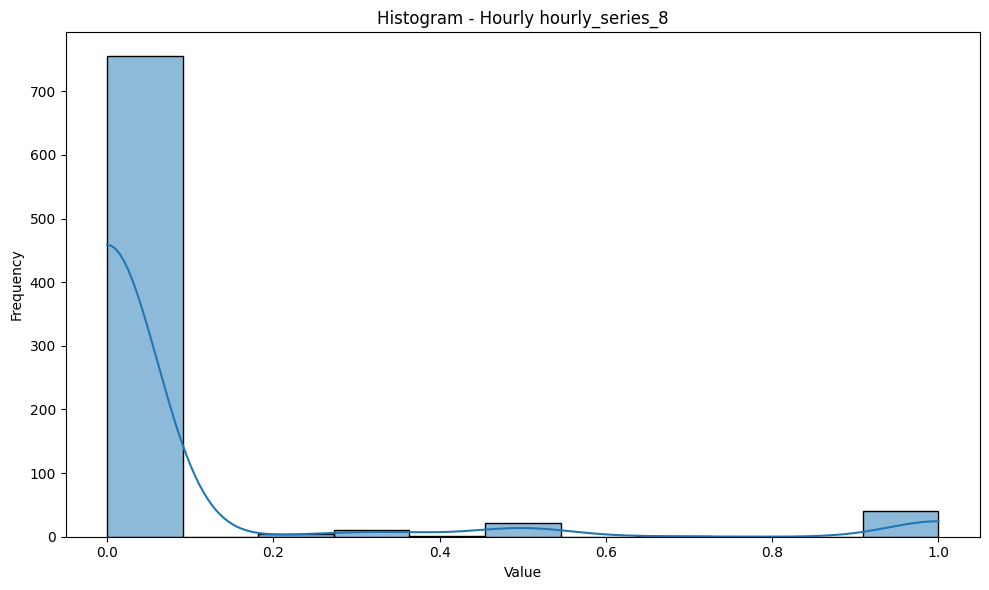

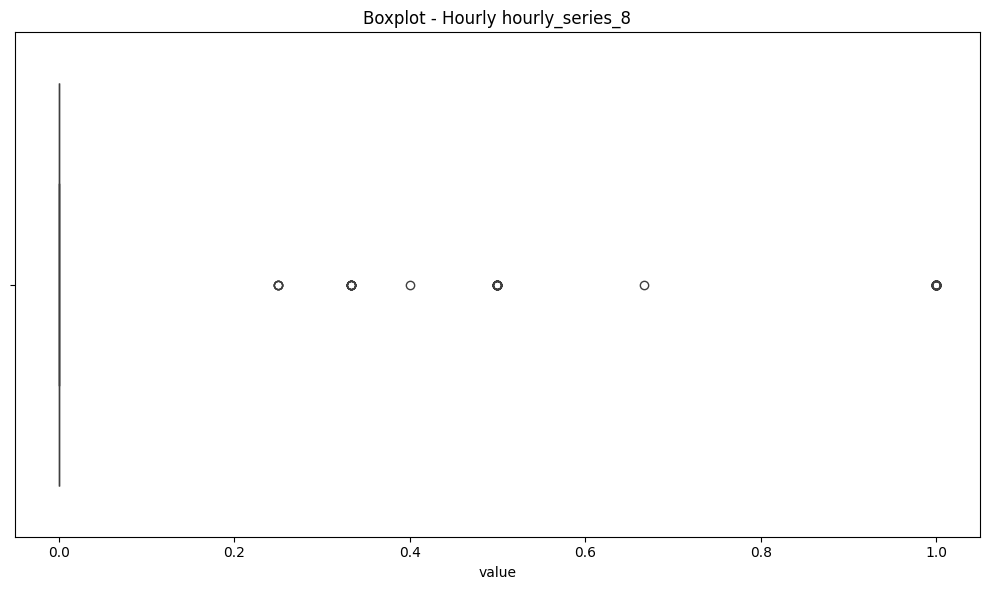

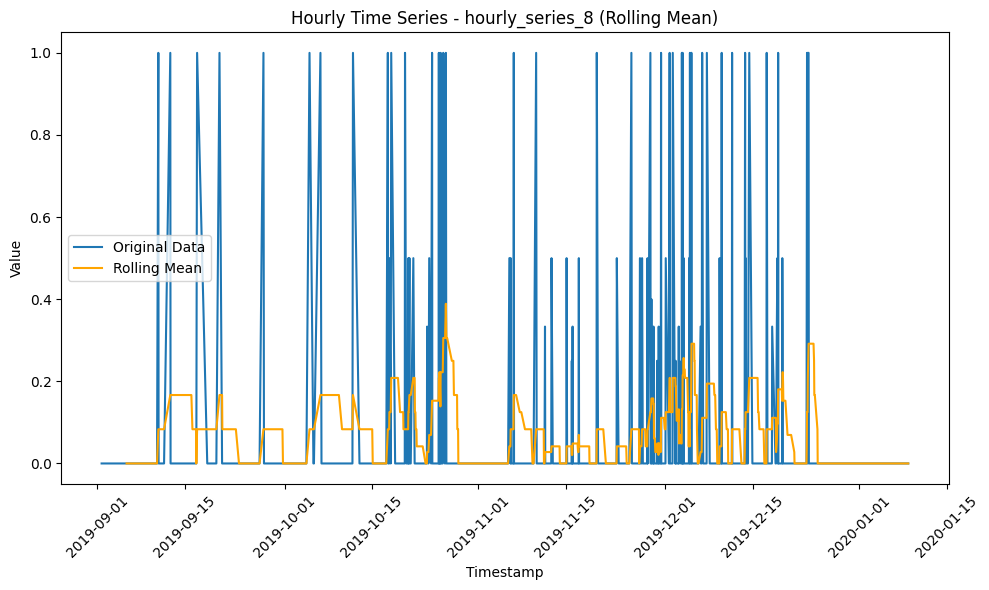

<Figure size 1000x600 with 0 Axes>

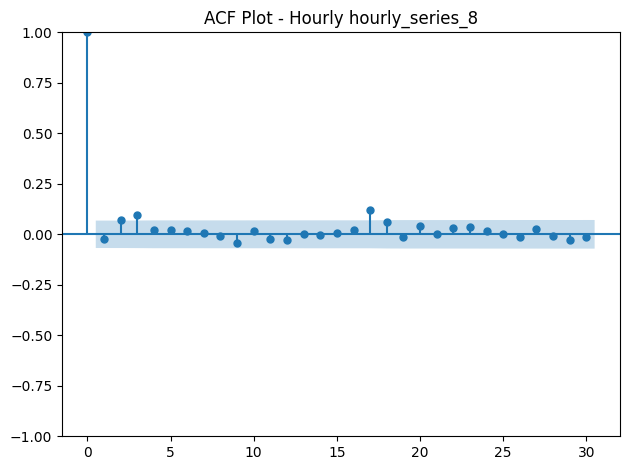

<Figure size 1000x600 with 0 Axes>

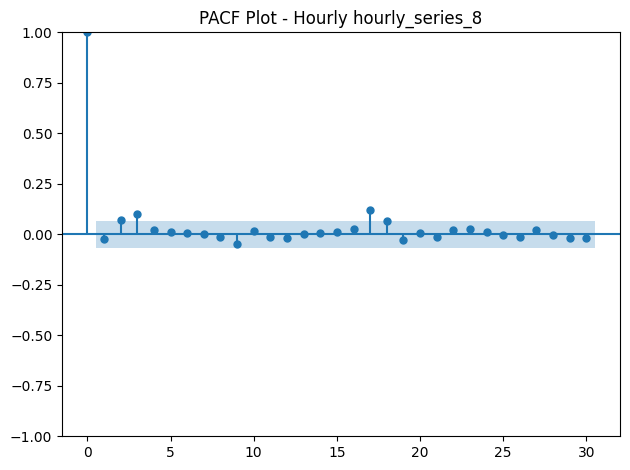

Decomposing series hourly_series_8 with period=12...


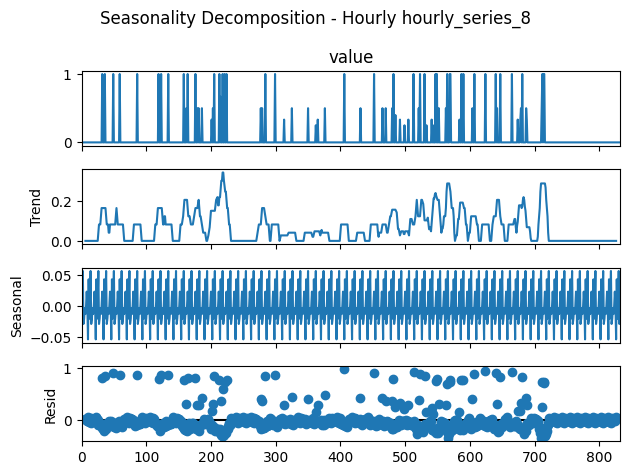

Plotting hourly data for hourly_series_9...

EDA for hourly_series_9:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-21 19:29:59.999999744     0.009419
min       0.000000            2019-09-01 00:00:00     0.000000
25%     249.750000            2019-09-11 09:45:00     0.000000
50%     499.500000            2019-09-21 19:30:00     0.000000
75%     749.250000            2019-10-02 05:15:00     0.015625
max     999.000000            2019-10-12 15:00:00     0.125000
std     288.819436                            NaN     0.014963
Missing values in hourly_series_9:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


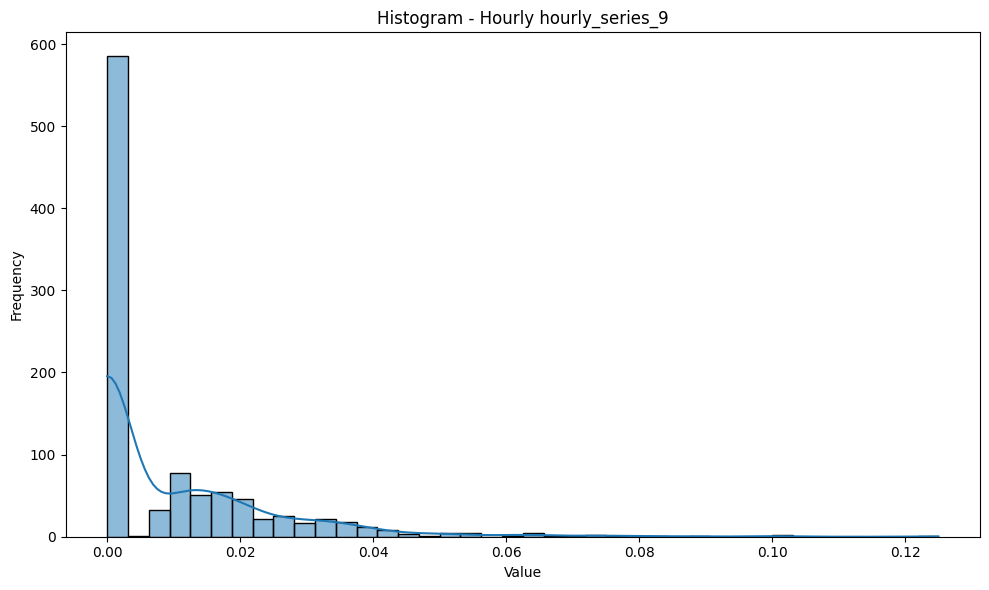

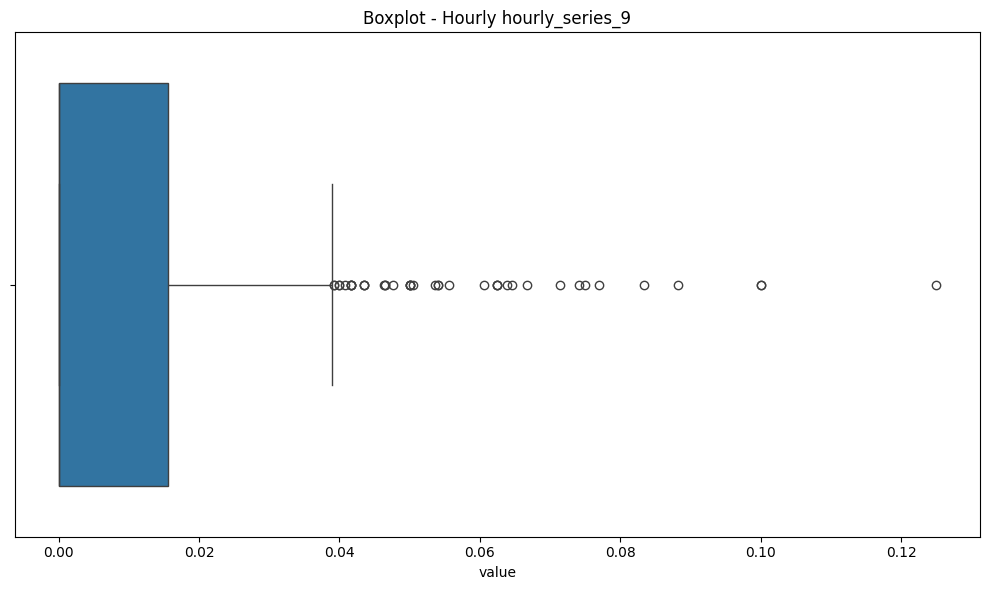

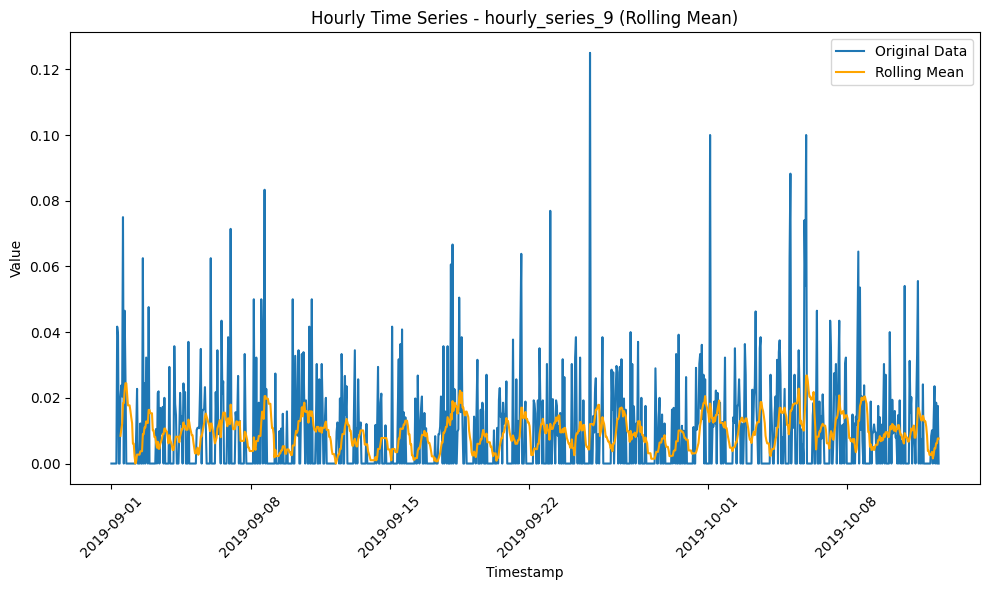

<Figure size 1000x600 with 0 Axes>

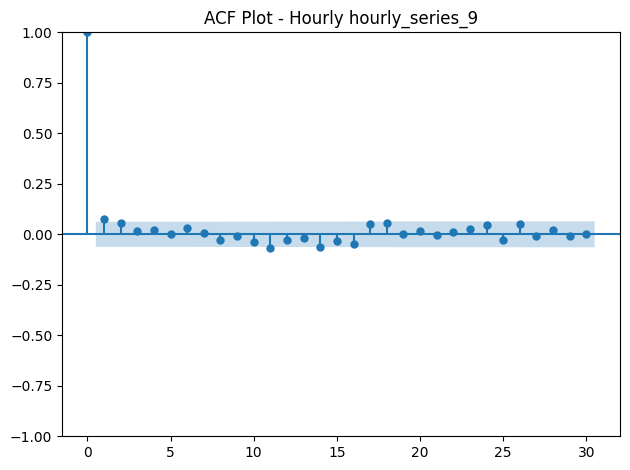

<Figure size 1000x600 with 0 Axes>

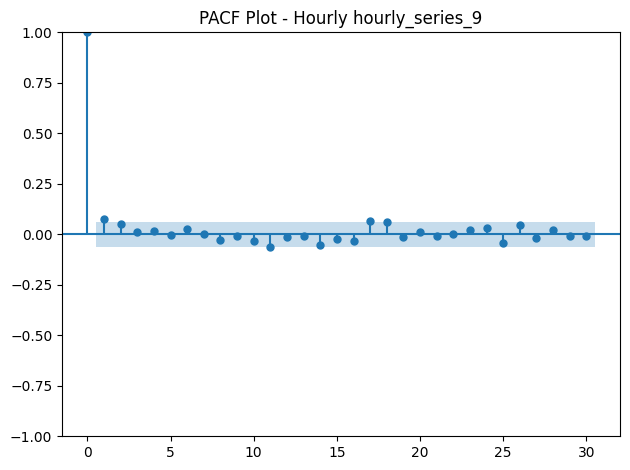

Decomposing series hourly_series_9 with period=12...


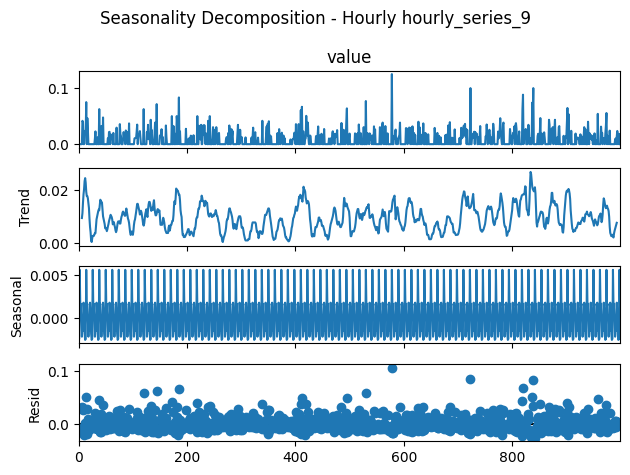

Plotting hourly data for hourly_series_10...

EDA for hourly_series_10:
        Unnamed: 0                      timestamp        value
count  1000.000000                           1000  1000.000000
mean    499.500000  2019-09-21 19:29:59.999999744     0.154803
min       0.000000            2019-09-01 00:00:00     0.101306
25%     249.750000            2019-09-11 09:45:00     0.147496
50%     499.500000            2019-09-21 19:30:00     0.154548
75%     749.250000            2019-10-02 05:15:00     0.161858
max     999.000000            2019-10-12 15:00:00     0.189671
std     288.819436                            NaN     0.011168
Missing values in hourly_series_10:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


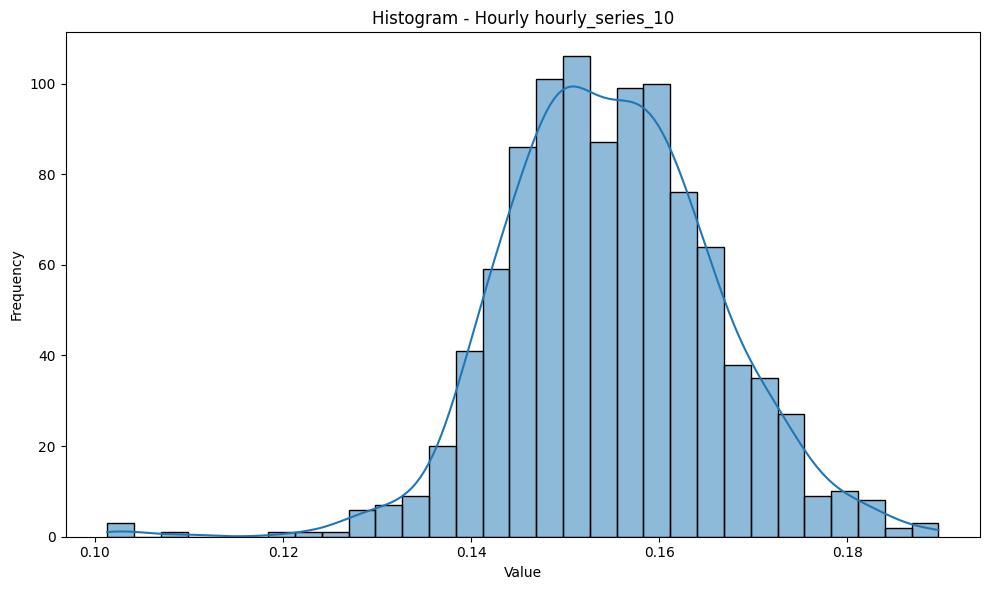

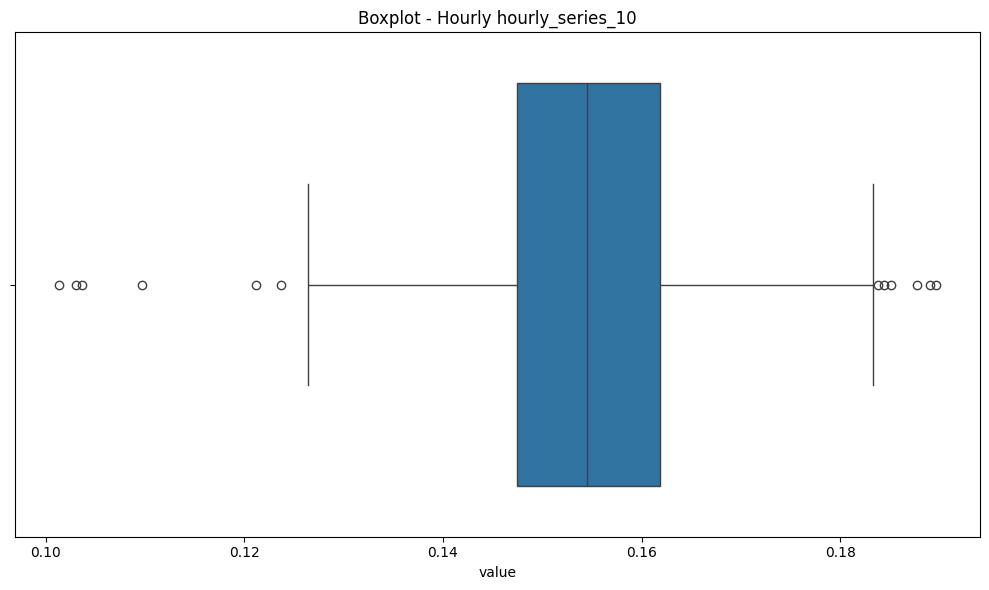

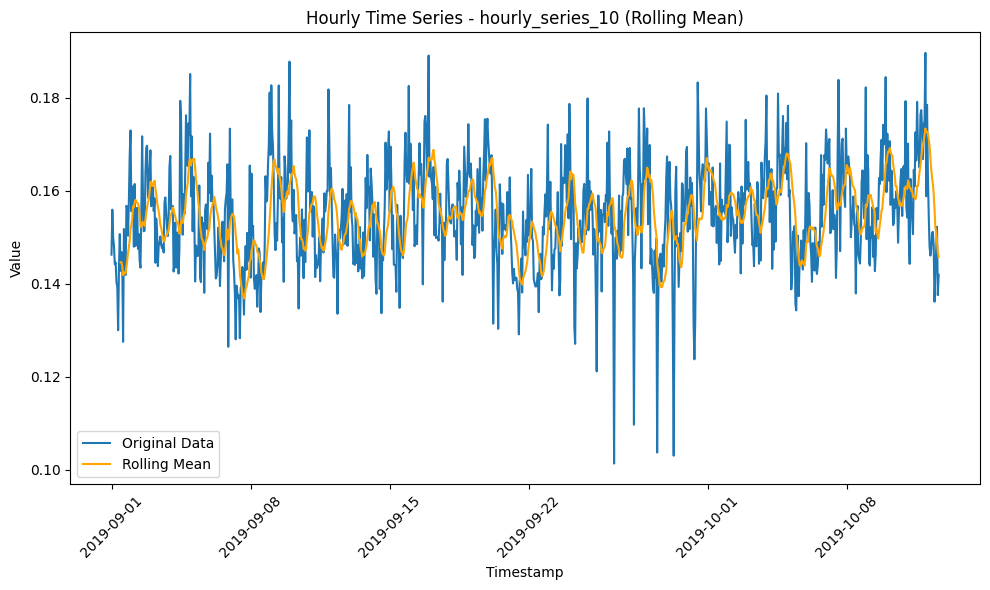

<Figure size 1000x600 with 0 Axes>

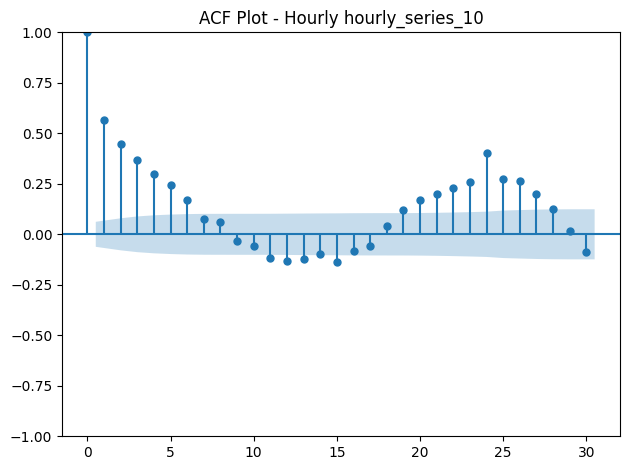

<Figure size 1000x600 with 0 Axes>

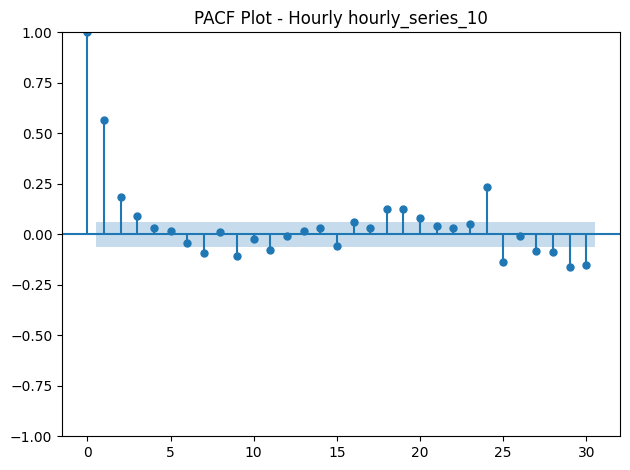

Decomposing series hourly_series_10 with period=12...


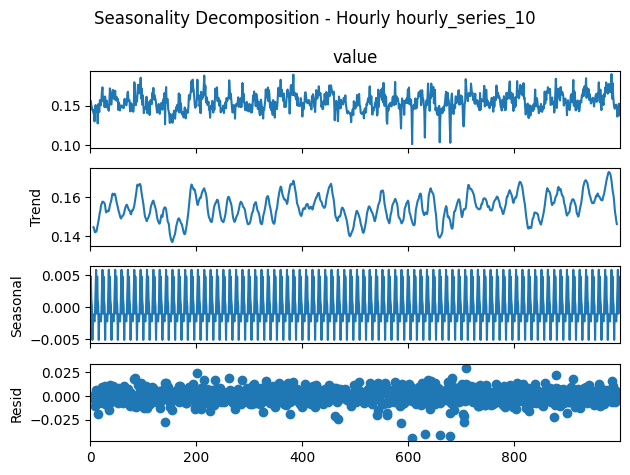

Plotting daily data for daily_series_1...

EDA for daily_series_1:
       Unnamed: 0            timestamp       value
count  745.000000                  745  745.000000
mean   372.000000  2020-07-20 00:00:00    7.088591
min      0.000000  2019-07-14 00:00:00    6.000000
25%    186.000000  2020-01-16 00:00:00    7.000000
50%    372.000000  2020-07-20 00:00:00    7.000000
75%    558.000000  2021-01-22 00:00:00    7.000000
max    744.000000  2021-07-27 00:00:00    8.000000
std    215.207264                  NaN    0.548891
Missing values in daily_series_1:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


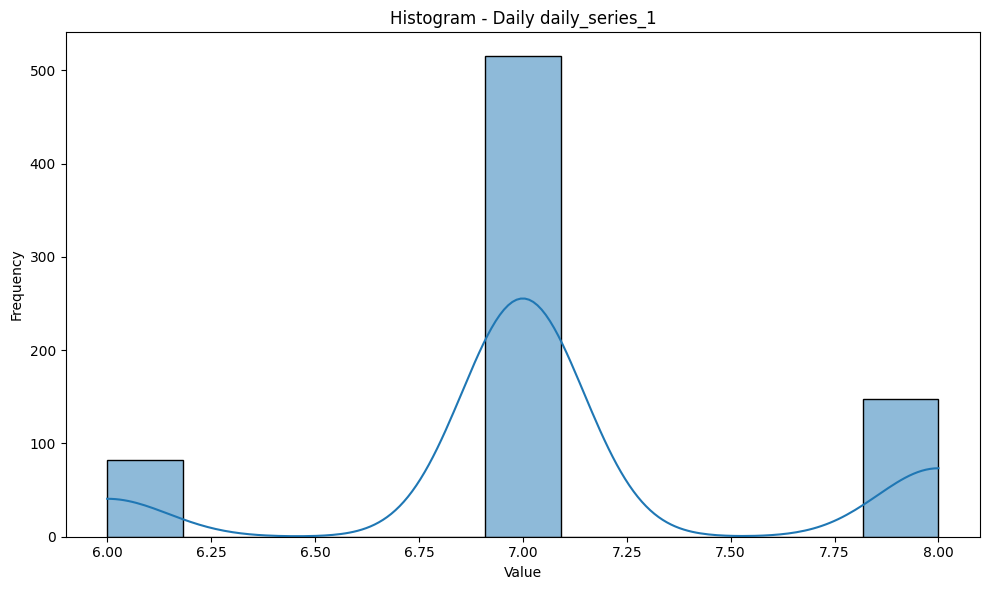

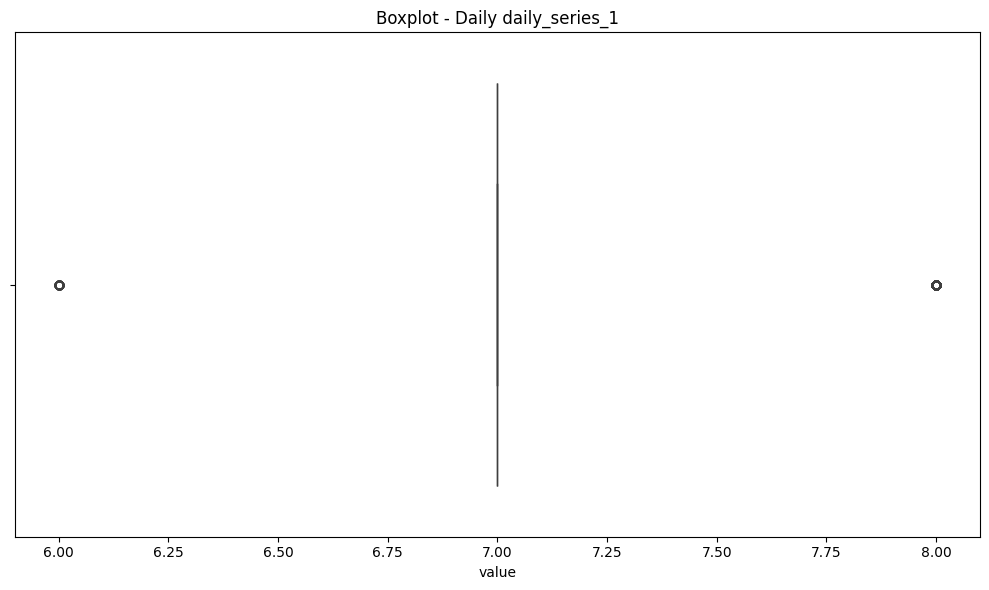

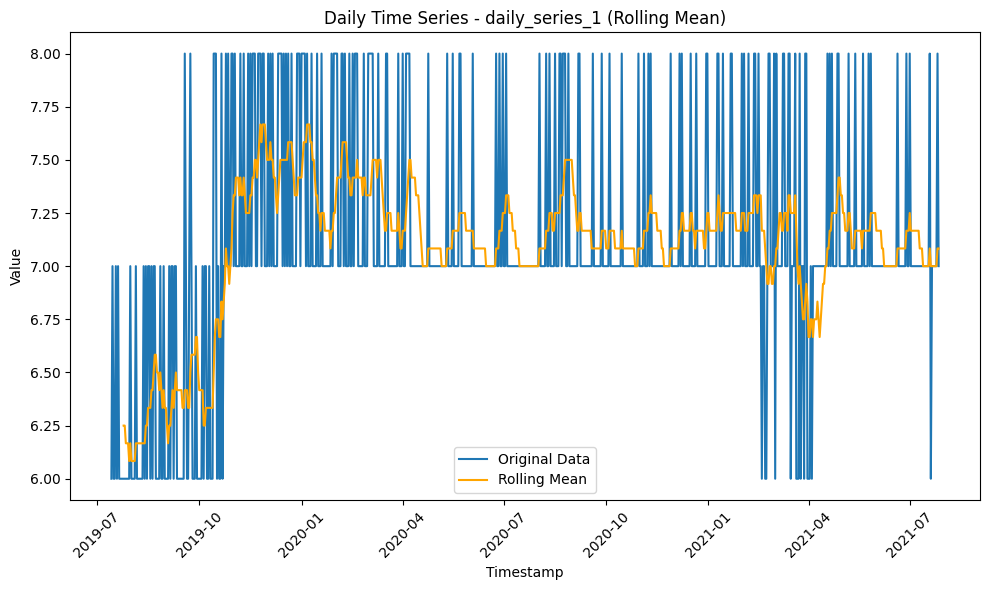

<Figure size 1000x600 with 0 Axes>

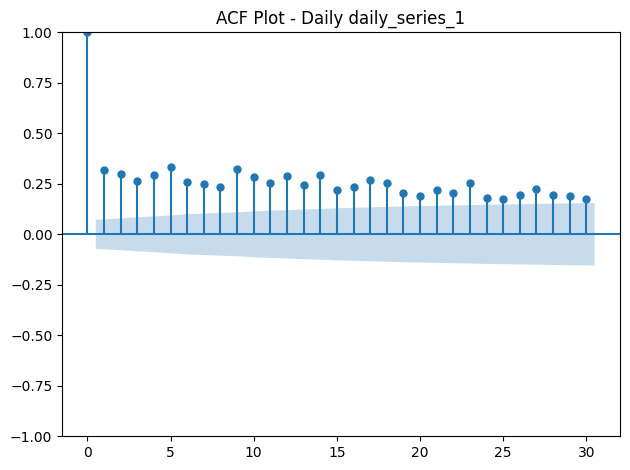

<Figure size 1000x600 with 0 Axes>

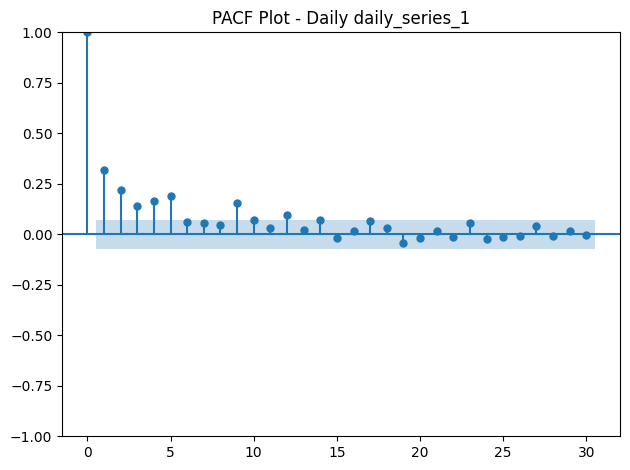

Decomposing series daily_series_1 with period=12...


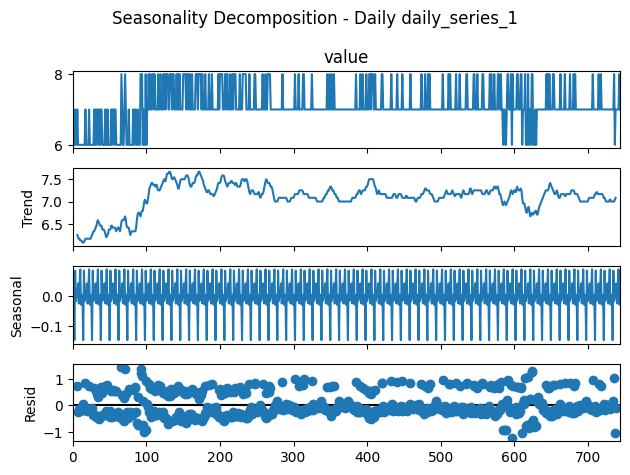

Plotting daily data for daily_series_2...

EDA for daily_series_2:
       Unnamed: 0            timestamp         value
count  475.000000                  475  4.750000e+02
mean   237.000000  2022-06-09 00:00:00  4.560001e+05
min      0.000000  2021-10-15 00:00:00  1.000000e+00
25%    118.500000  2022-02-10 12:00:00  2.453460e+05
50%    237.000000  2022-06-09 00:00:00  5.225660e+05
75%    355.500000  2022-10-05 12:00:00  6.108600e+05
max    474.000000  2023-02-01 00:00:00  1.177448e+06
std    137.264951                  NaN  2.164724e+05
Missing values in daily_series_2:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


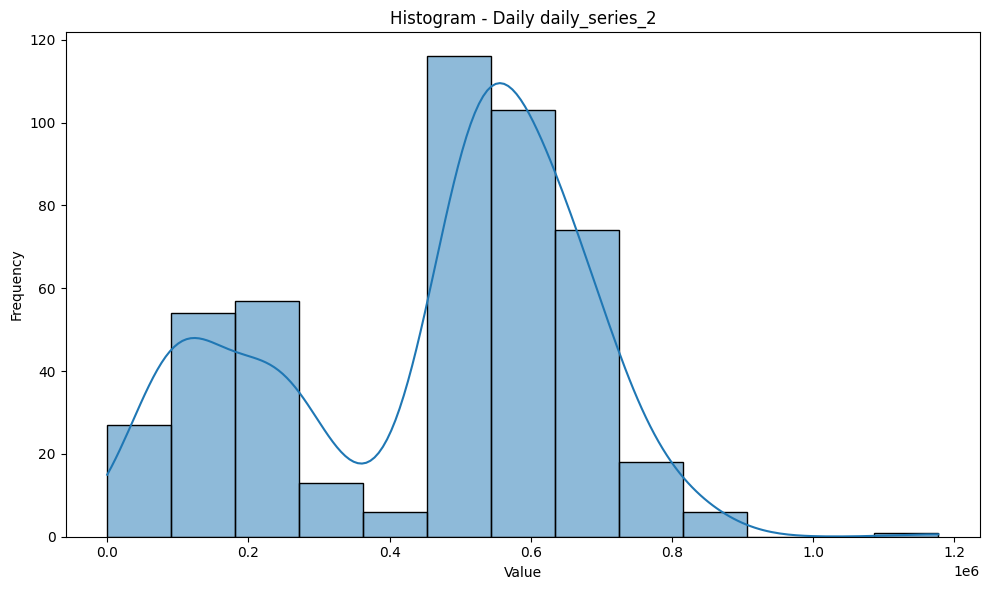

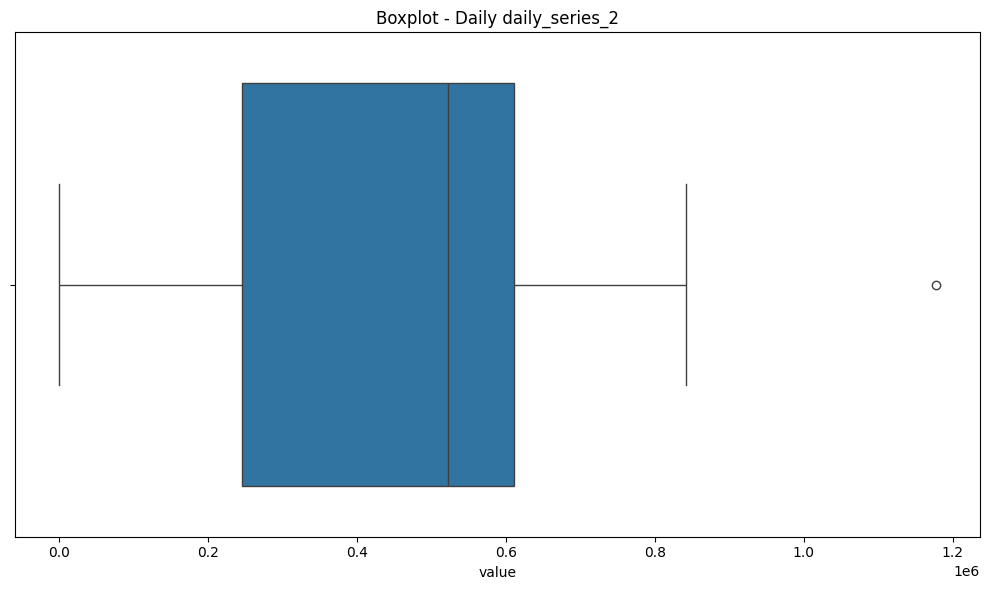

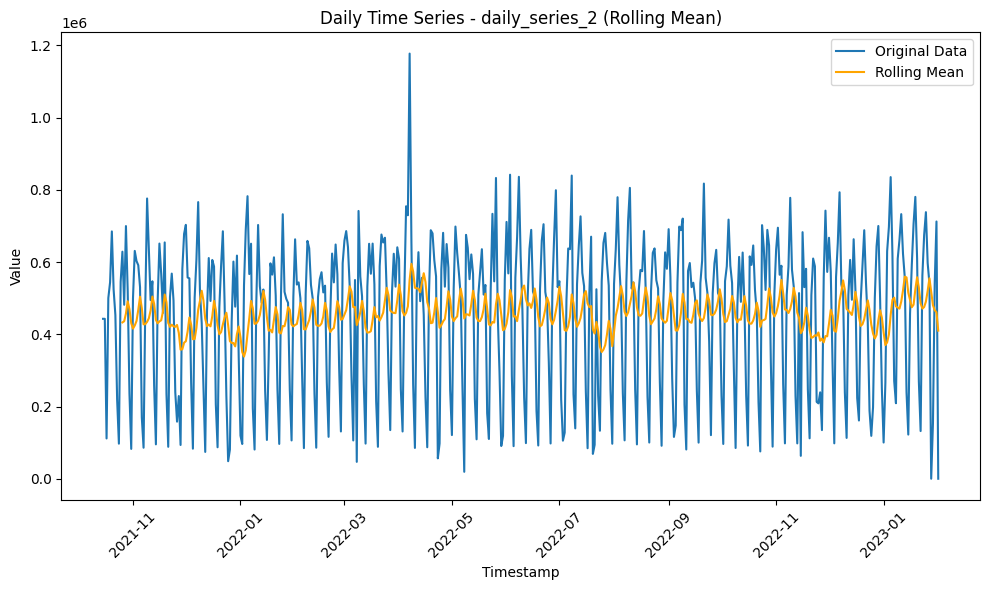

<Figure size 1000x600 with 0 Axes>

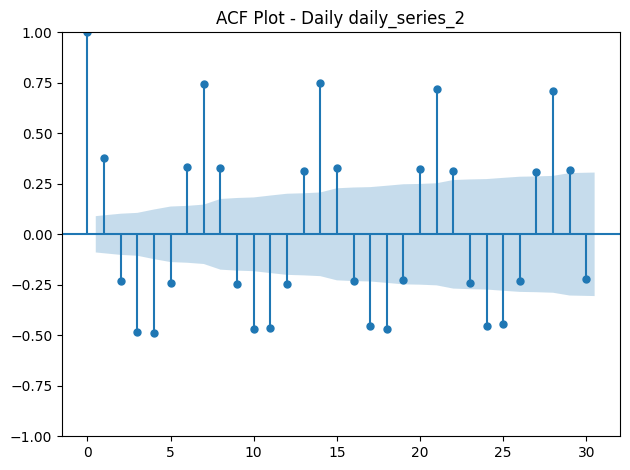

<Figure size 1000x600 with 0 Axes>

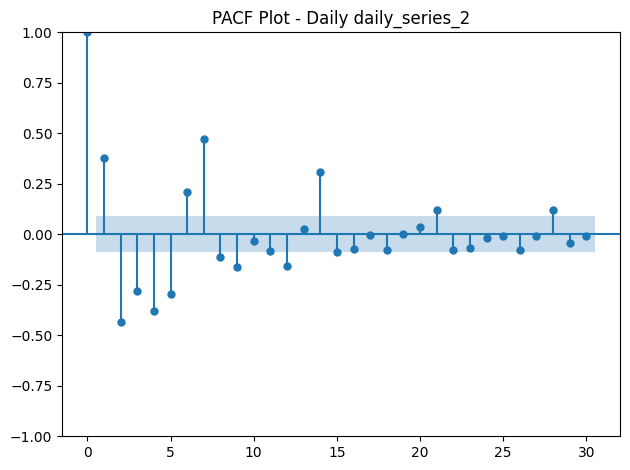

Decomposing series daily_series_2 with period=12...


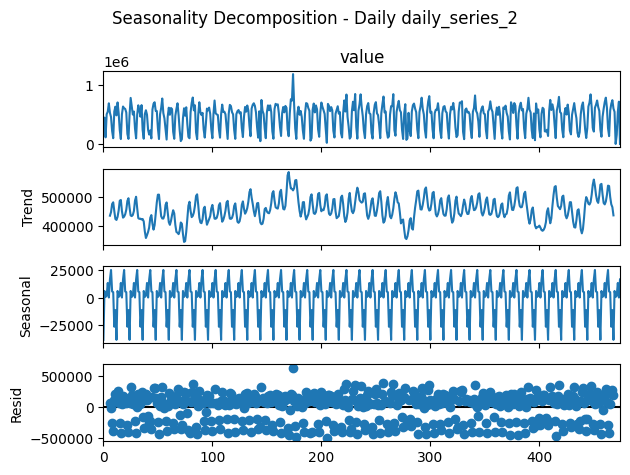

Plotting daily data for daily_series_3...

EDA for daily_series_3:
       Unnamed: 0            timestamp       value
count  350.000000                  350  350.000000
mean   174.500000  2021-05-24 12:00:00    3.857143
min      0.000000  2020-12-01 00:00:00    1.000000
25%     87.250000  2021-02-26 06:00:00    4.000000
50%    174.500000  2021-05-24 12:00:00    4.000000
75%    261.750000  2021-08-19 18:00:00    4.000000
max    349.000000  2021-11-15 00:00:00    4.000000
std    101.180532                  NaN    0.417583
Missing values in daily_series_3:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


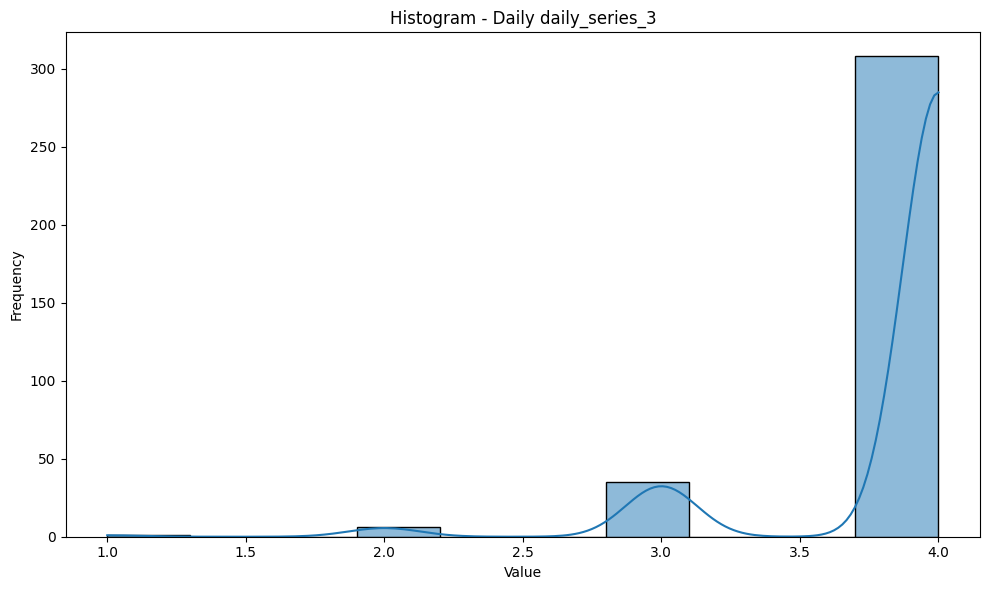

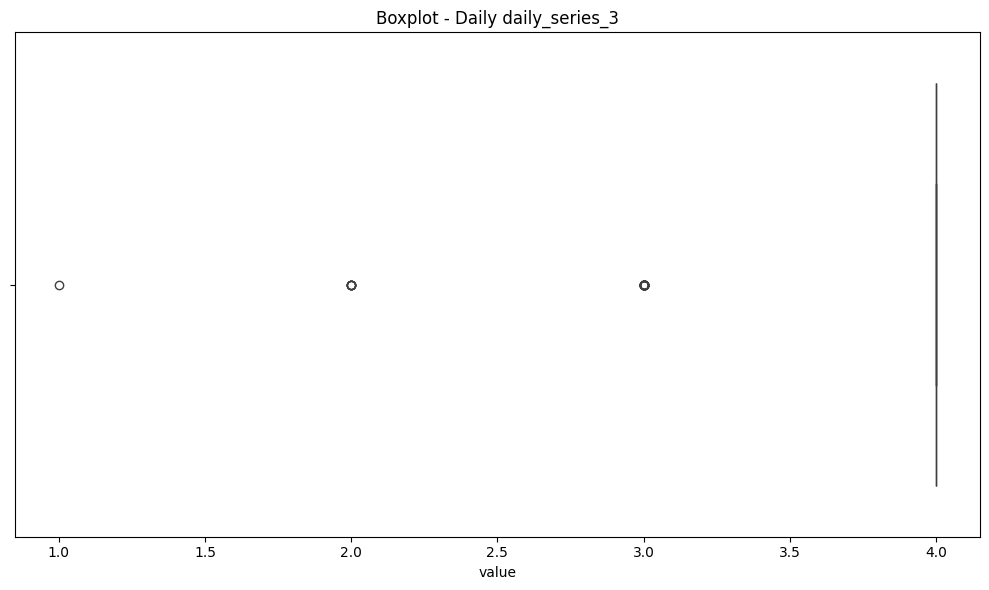

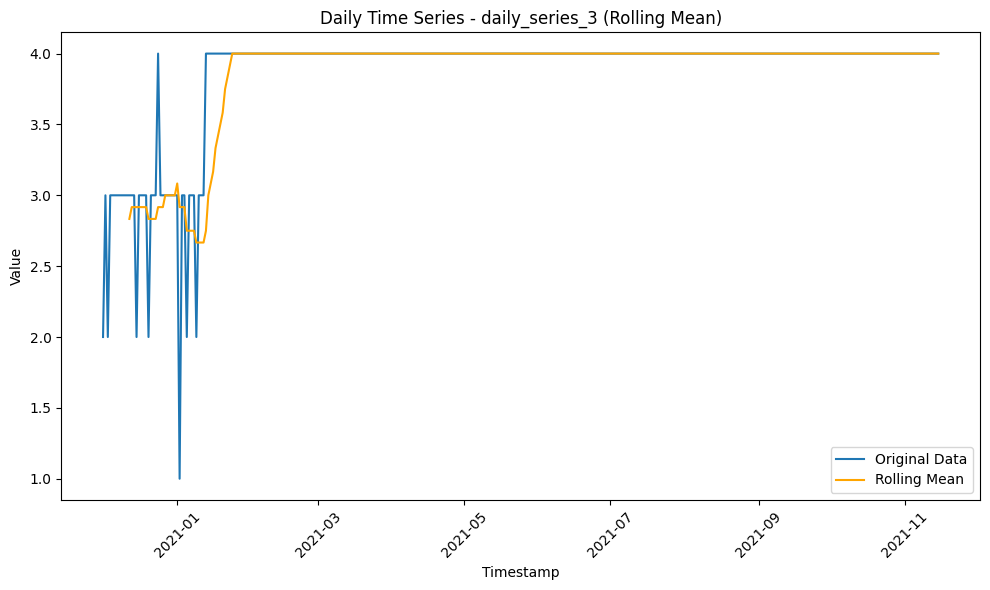

<Figure size 1000x600 with 0 Axes>

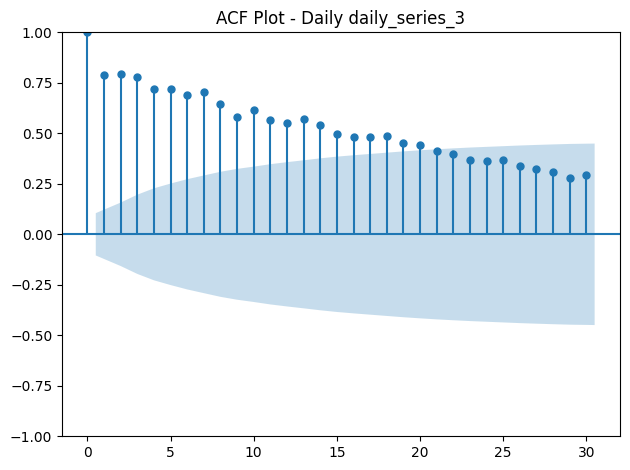

<Figure size 1000x600 with 0 Axes>

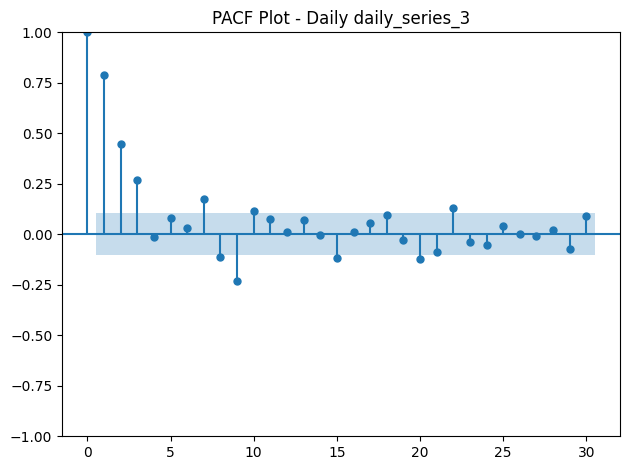

Decomposing series daily_series_3 with period=12...


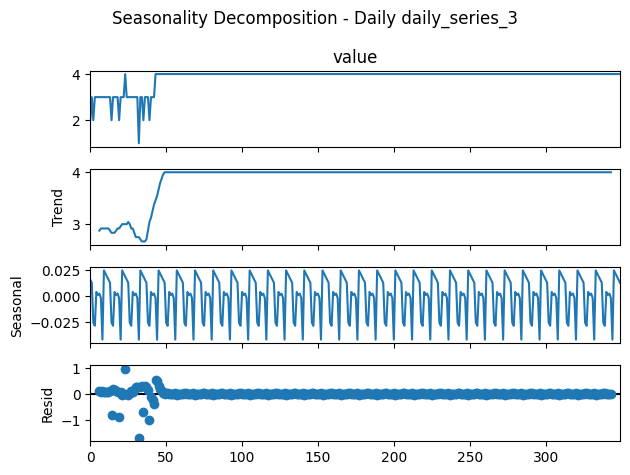

Plotting daily data for daily_series_4...

EDA for daily_series_4:
       Unnamed: 0            timestamp         value
count   261.00000                  261  2.610000e+02
mean    130.00000  2021-05-12 00:00:00  4.169523e+06
min       0.00000  2021-01-02 00:00:00  3.481300e+06
25%      65.00000  2021-03-08 00:00:00  4.060506e+06
50%     130.00000  2021-05-12 00:00:00  4.231896e+06
75%     195.00000  2021-07-16 00:00:00  4.388391e+06
max     260.00000  2021-09-19 00:00:00  4.553380e+06
std      75.48841                  NaN  2.983557e+05
Missing values in daily_series_4:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


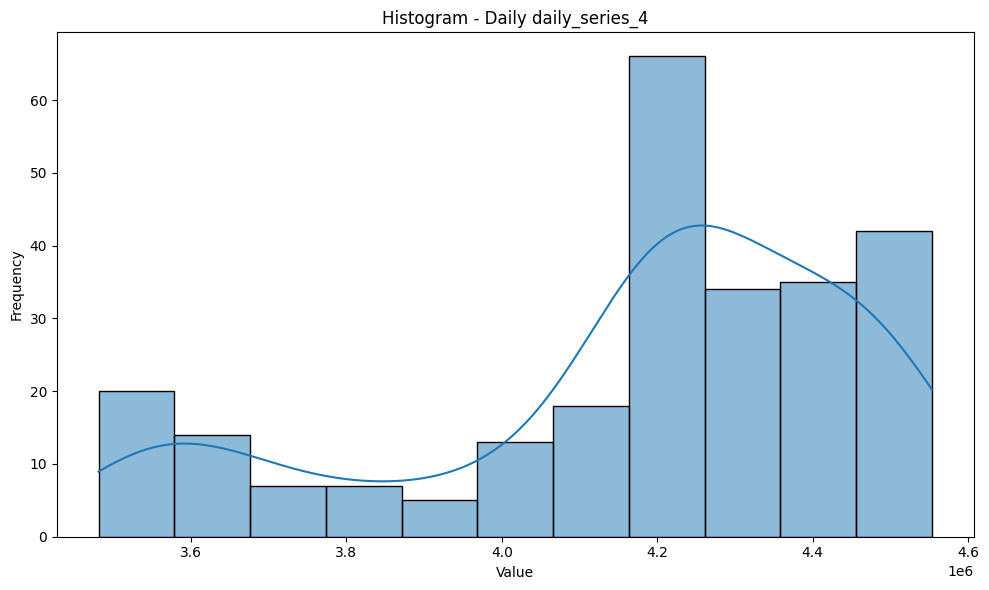

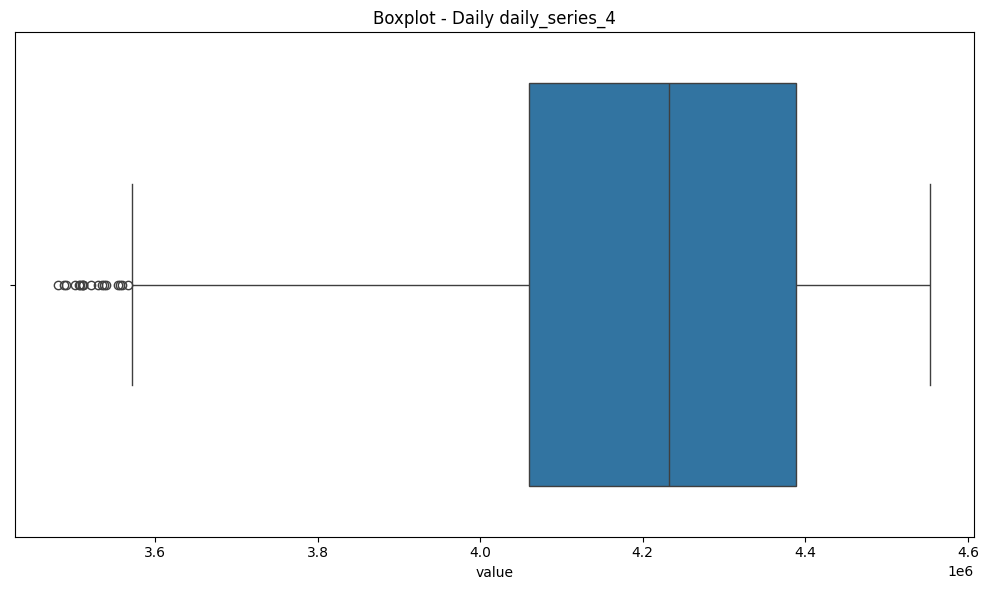

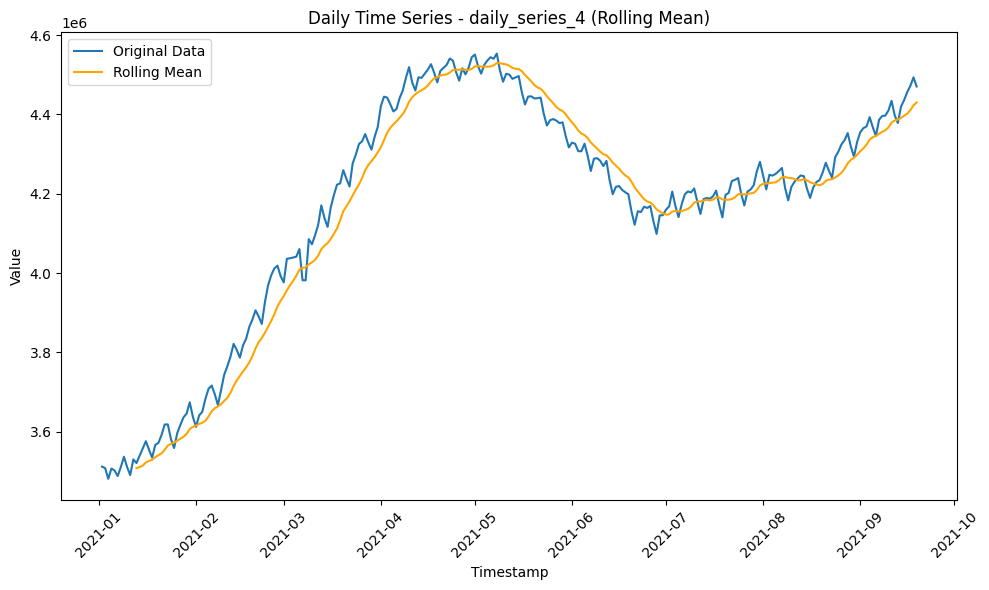

<Figure size 1000x600 with 0 Axes>

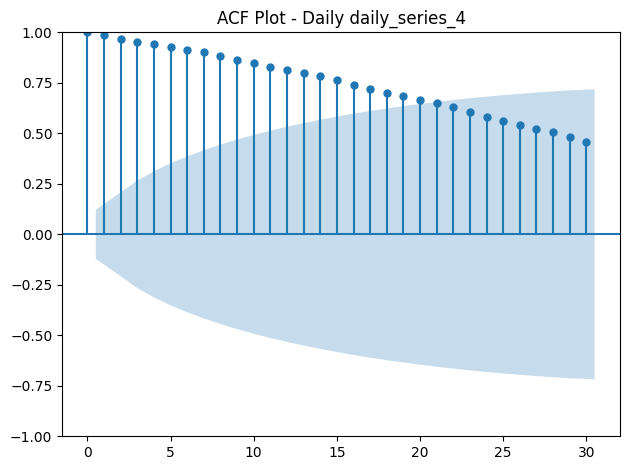

<Figure size 1000x600 with 0 Axes>

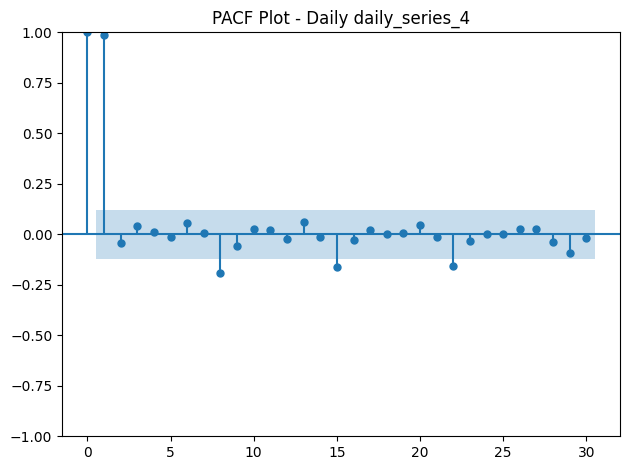

Decomposing series daily_series_4 with period=12...


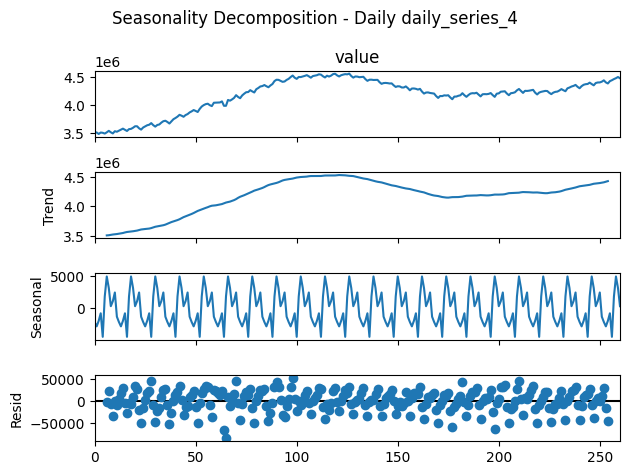

Plotting daily data for daily_series_5...

EDA for daily_series_5:
       Unnamed: 0            timestamp       value
count  269.000000                  269  269.000000
mean   134.000000  2021-05-19 00:00:00    0.022059
min      0.000000  2021-01-05 00:00:00    0.004500
25%     67.000000  2021-03-13 00:00:00    0.015600
50%    134.000000  2021-05-19 00:00:00    0.017200
75%    201.000000  2021-07-25 00:00:00    0.018200
max    268.000000  2021-09-30 00:00:00    0.531700
std     77.797815                  NaN    0.040694
Missing values in daily_series_5:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


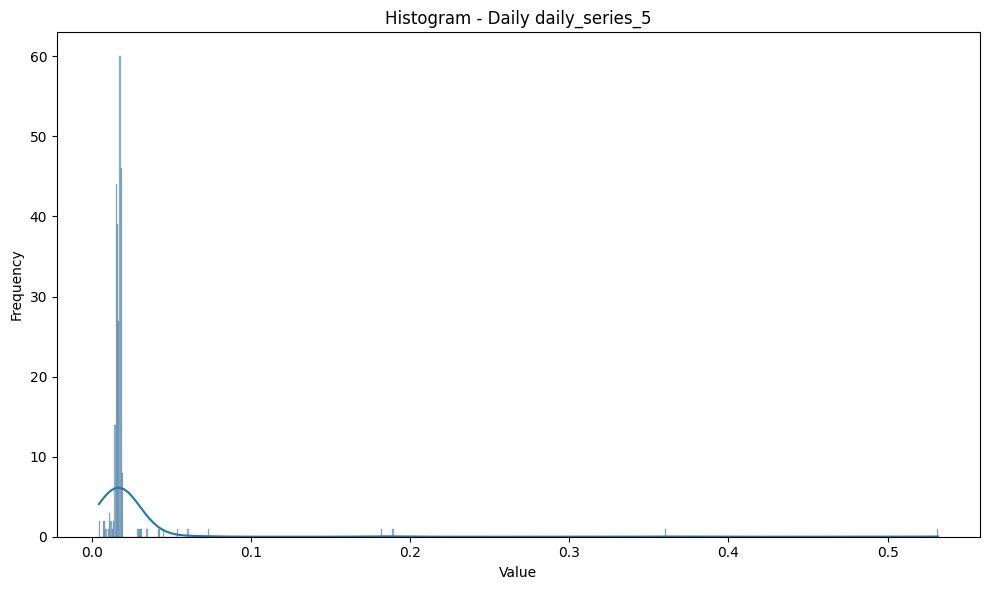

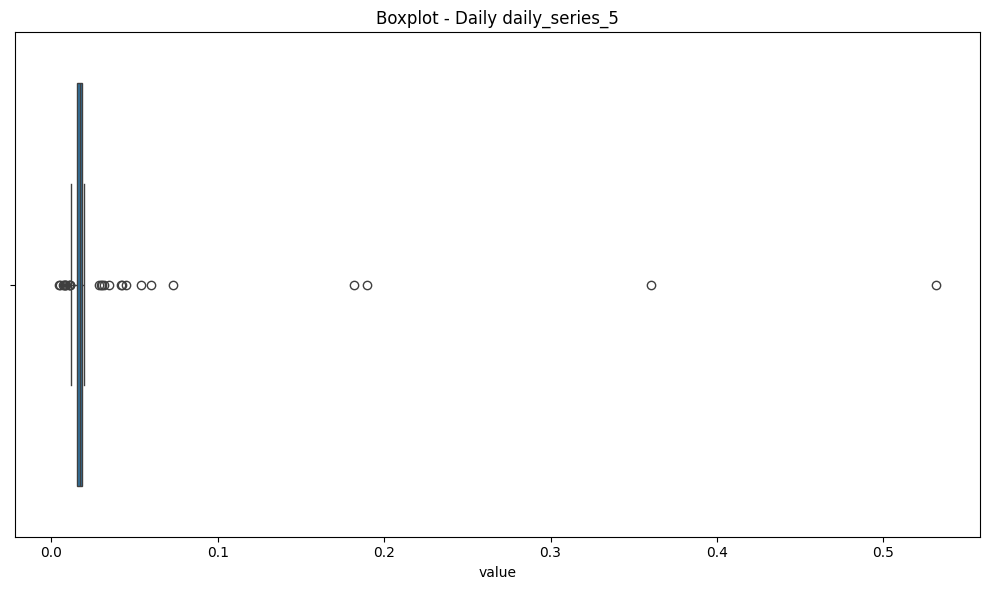

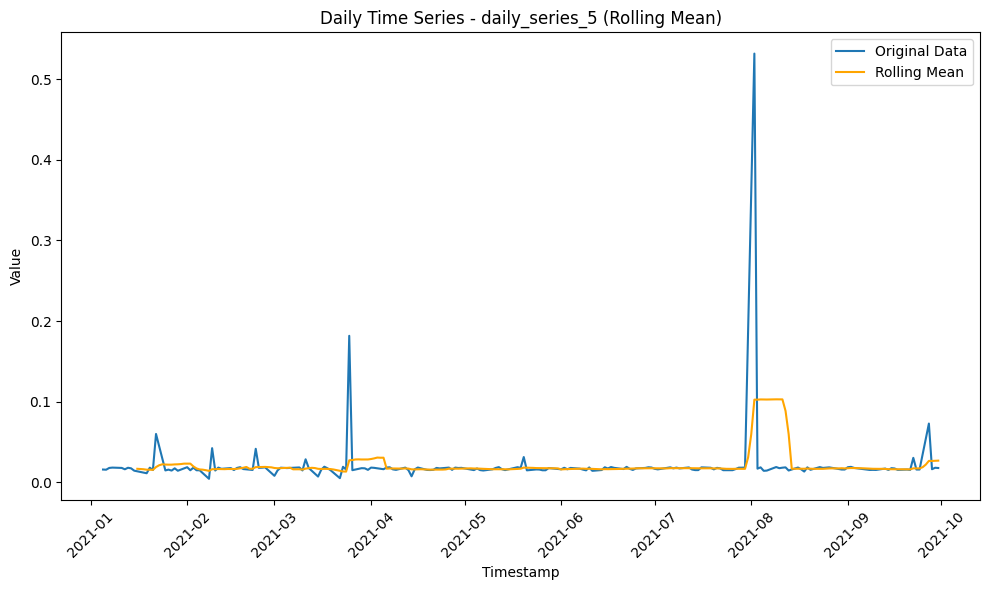

<Figure size 1000x600 with 0 Axes>

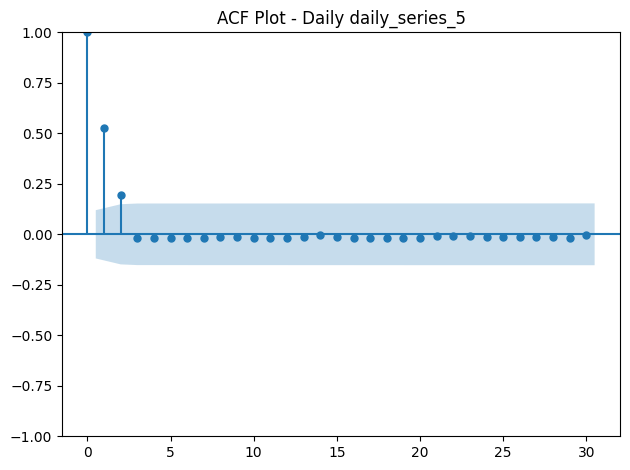

<Figure size 1000x600 with 0 Axes>

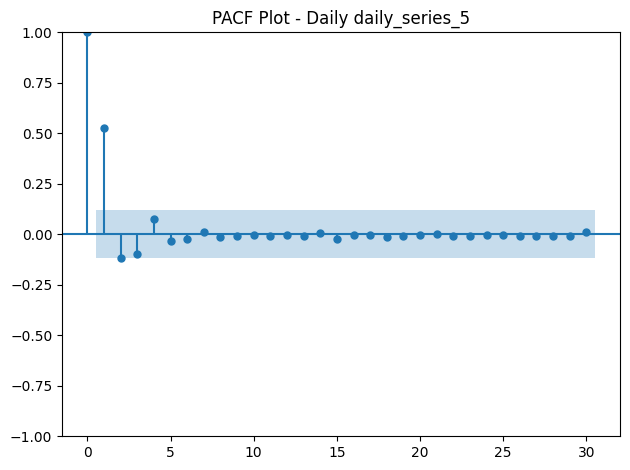

Decomposing series daily_series_5 with period=12...


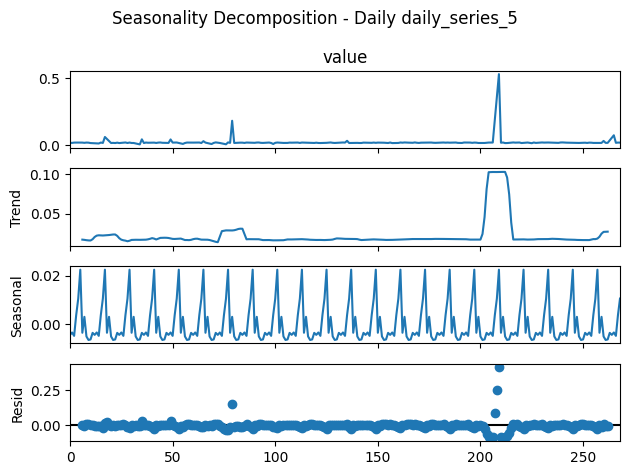

Plotting daily data for daily_series_6...

EDA for daily_series_6:
       Unnamed: 0            timestamp         value
count   74.000000                   74     74.000000
mean    36.500000  2021-08-12 12:00:00   1897.986486
min      0.000000  2021-07-07 00:00:00      0.000000
25%     18.250000  2021-07-25 06:00:00      0.000000
50%     36.500000  2021-08-12 12:00:00      0.000000
75%     54.750000  2021-08-30 18:00:00    108.500000
max     73.000000  2021-09-18 00:00:00  17003.000000
std     21.505813                  NaN   5058.858200
Missing values in daily_series_6:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


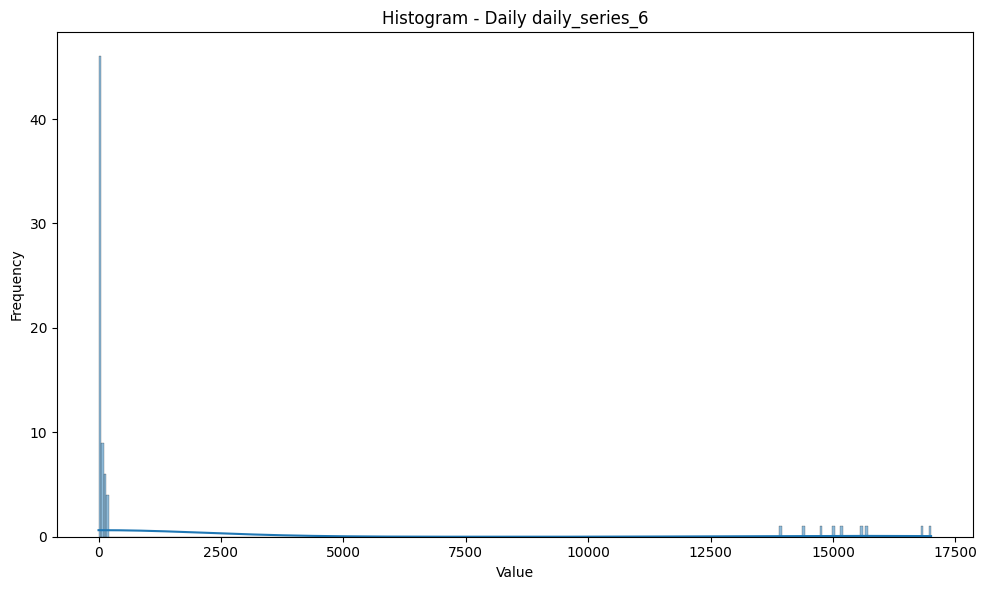

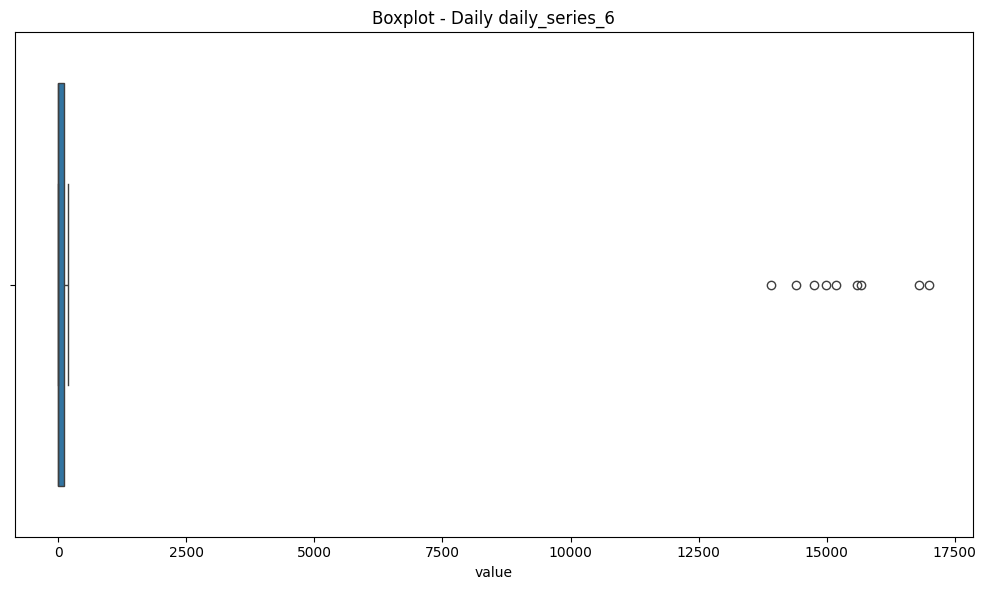

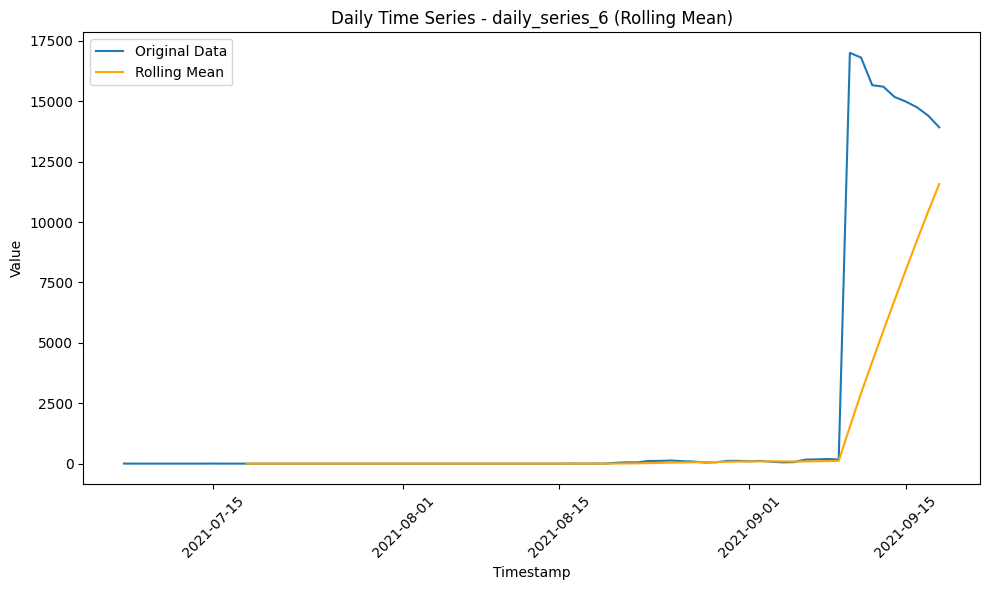

<Figure size 1000x600 with 0 Axes>

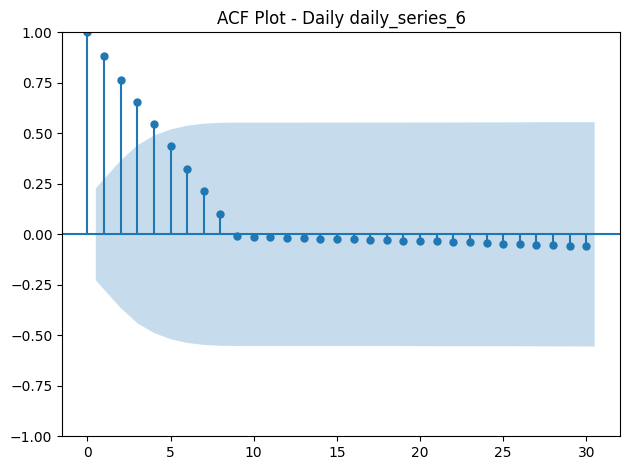

<Figure size 1000x600 with 0 Axes>

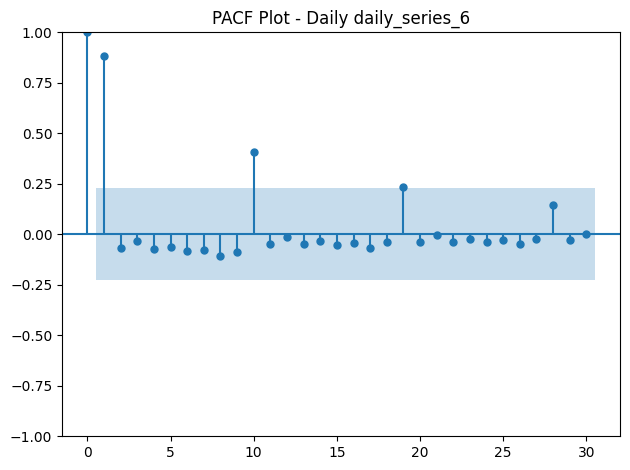

Decomposing series daily_series_6 with period=12...


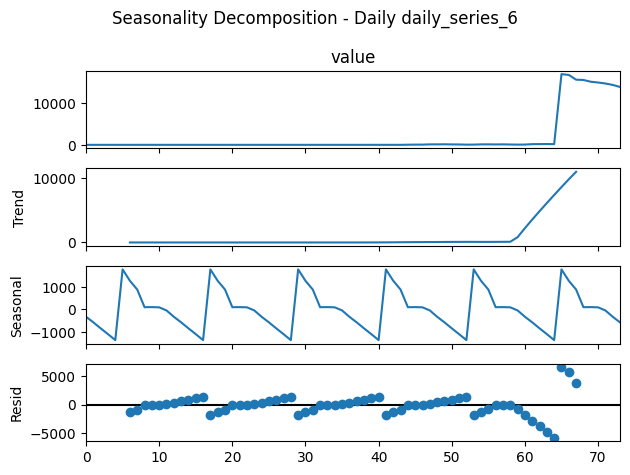

Plotting daily data for daily_series_7...

EDA for daily_series_7:
       Unnamed: 0            timestamp        value
count  504.000000                  504   504.000000
mean   251.500000  2022-05-11 12:00:00   450.482143
min      0.000000  2021-09-02 00:00:00     0.000000
25%    125.750000  2022-01-05 18:00:00   103.000000
50%    251.500000  2022-05-11 12:00:00   226.000000
75%    377.250000  2022-09-14 06:00:00   835.000000
max    503.000000  2023-01-18 00:00:00  2392.000000
std    145.636534                  NaN   497.746772
Missing values in daily_series_7:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


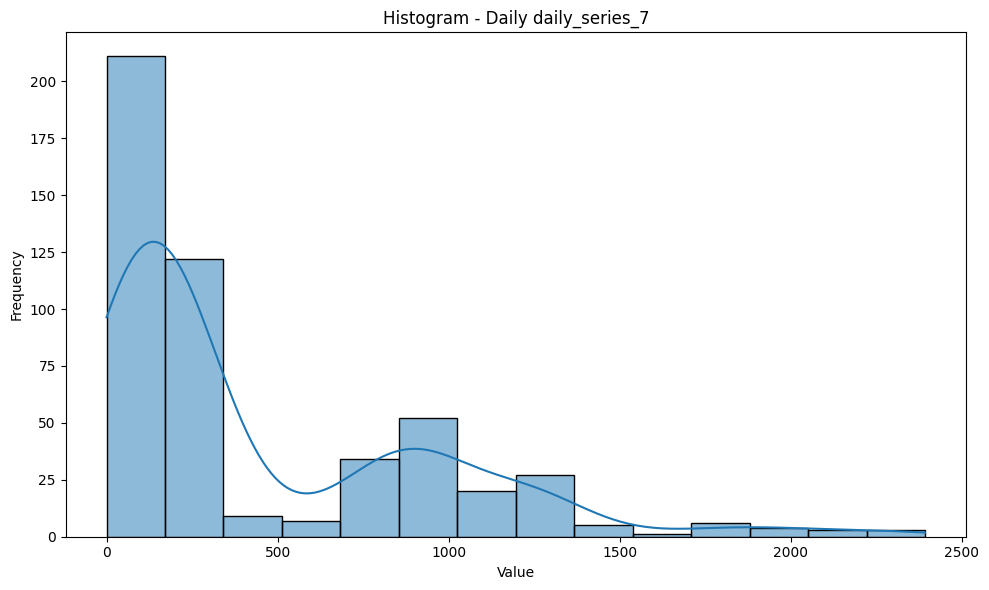

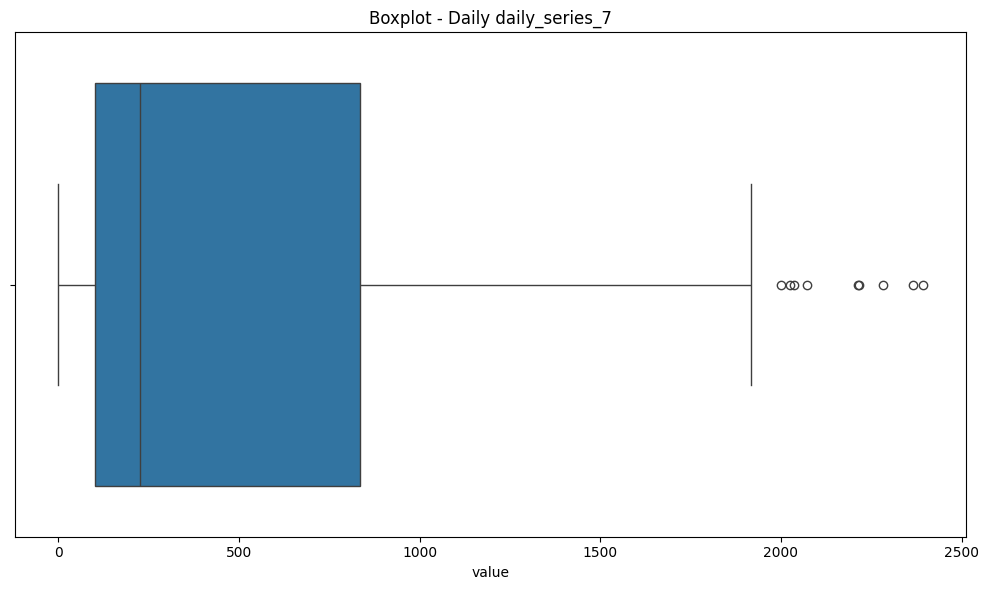

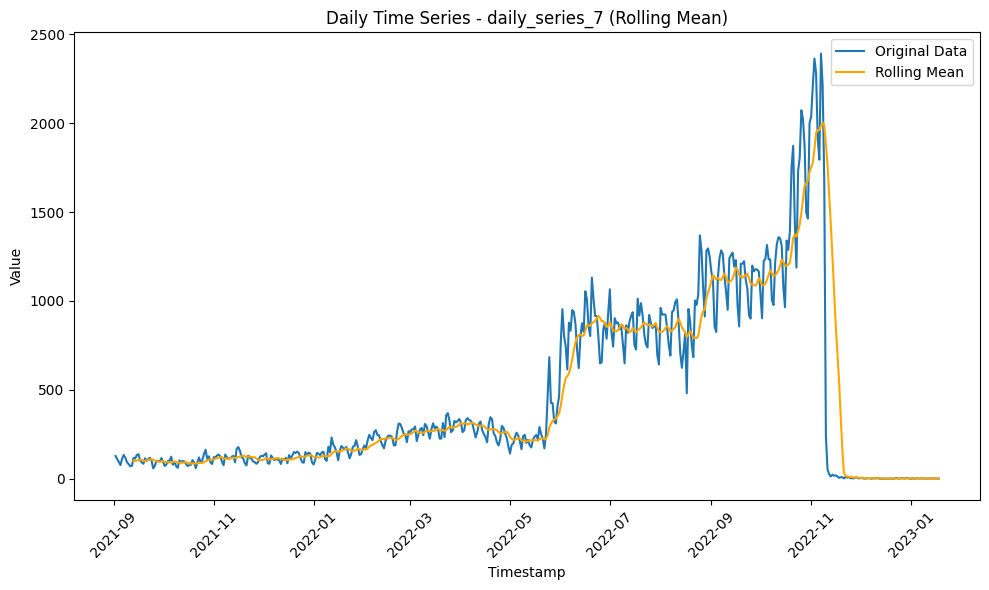

<Figure size 1000x600 with 0 Axes>

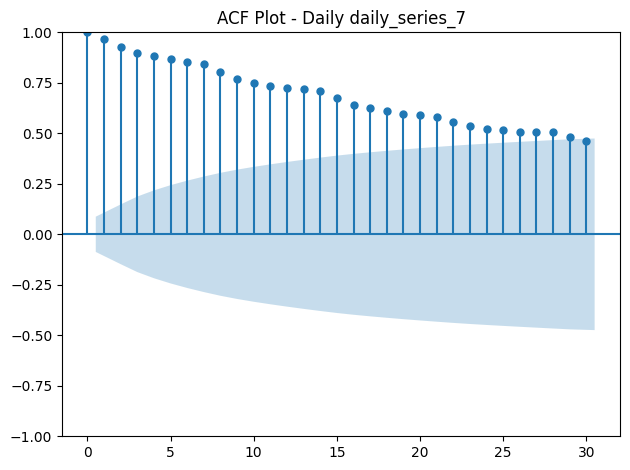

<Figure size 1000x600 with 0 Axes>

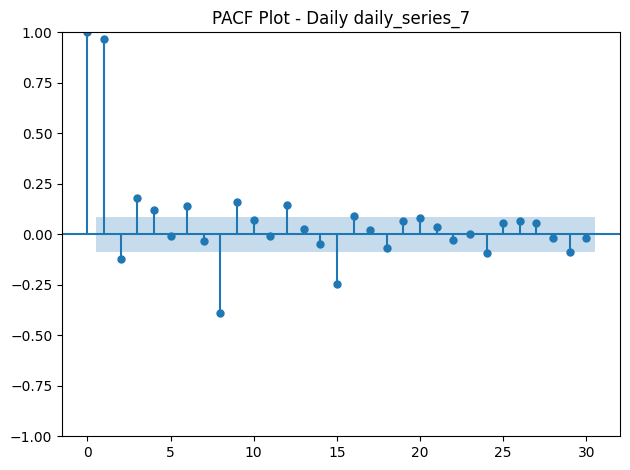

Decomposing series daily_series_7 with period=12...


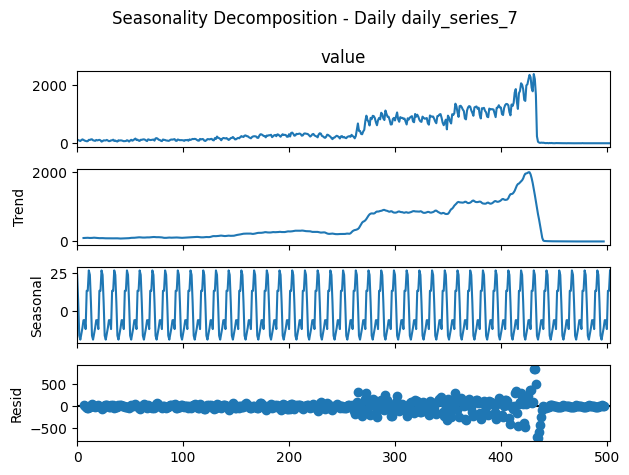

Plotting daily data for daily_series_8...

EDA for daily_series_8:
       Unnamed: 0            timestamp          value
count  327.000000                  327     327.000000
mean   163.000000  2022-02-27 00:00:00    4511.574924
min      0.000000  2021-09-17 00:00:00       3.000000
25%     81.500000  2021-12-07 12:00:00     186.500000
50%    163.000000  2022-02-27 00:00:00     349.000000
75%    244.500000  2022-05-19 12:00:00     816.500000
max    326.000000  2022-08-09 00:00:00  272413.000000
std     94.540996                  NaN   27975.261669
Missing values in daily_series_8:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


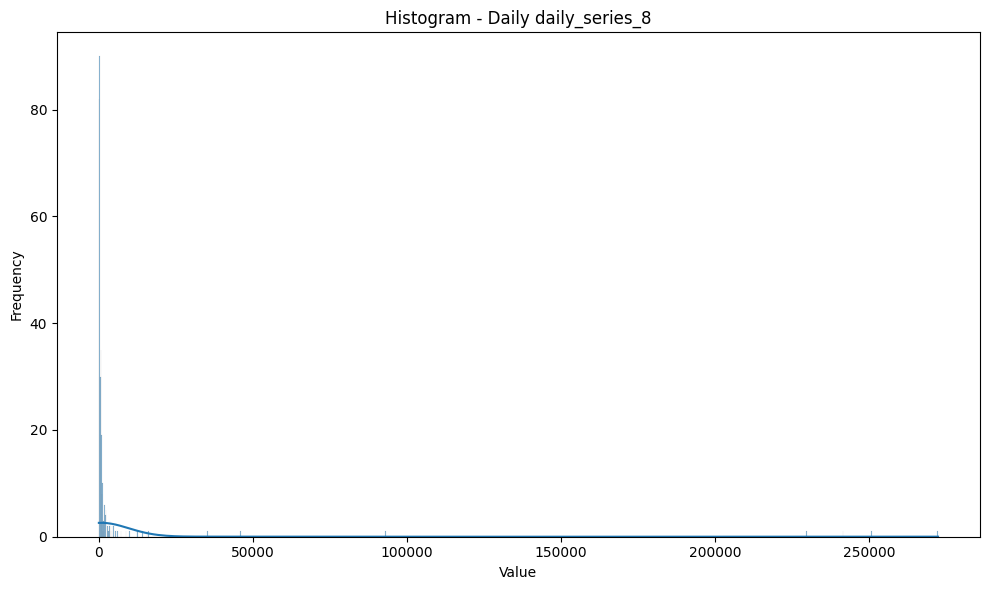

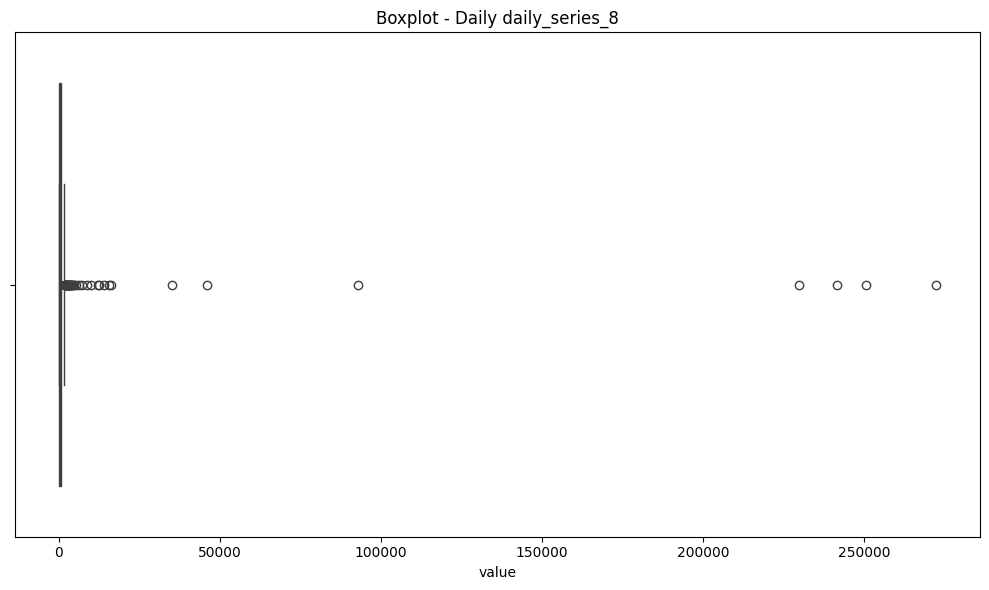

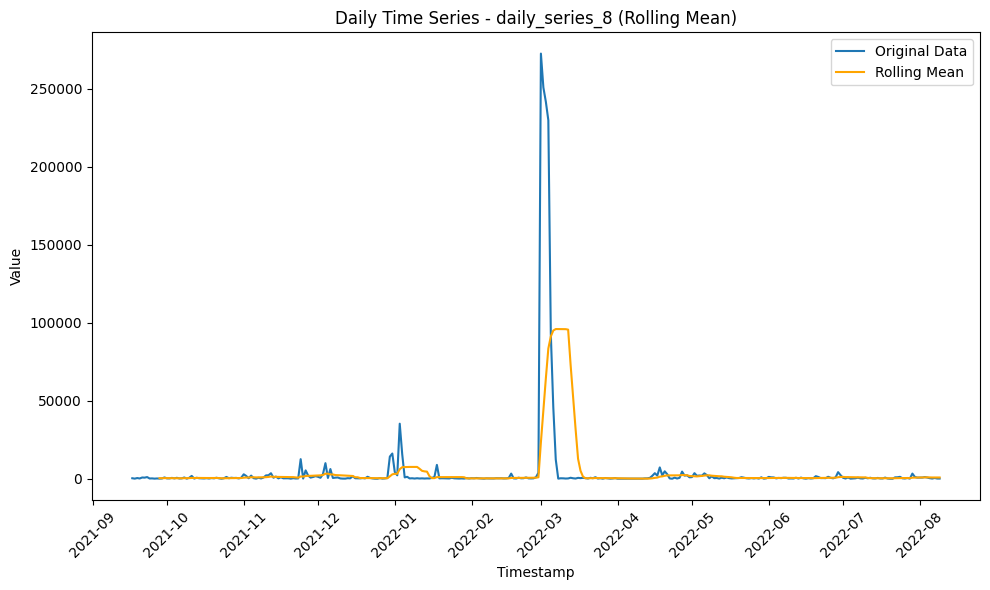

<Figure size 1000x600 with 0 Axes>

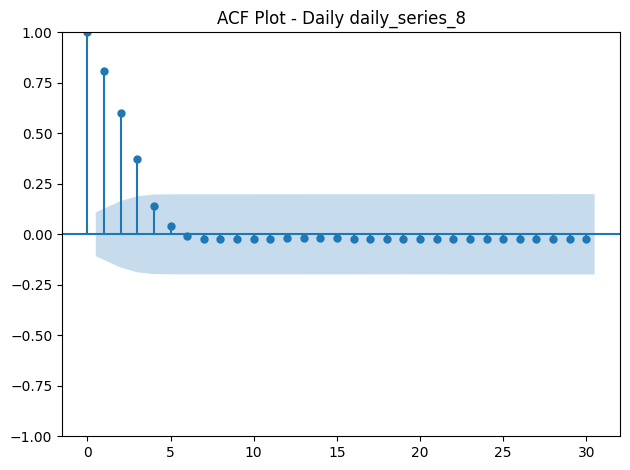

<Figure size 1000x600 with 0 Axes>

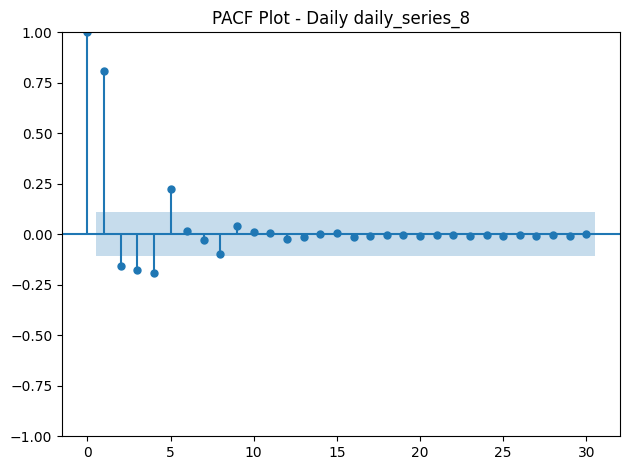

Decomposing series daily_series_8 with period=12...


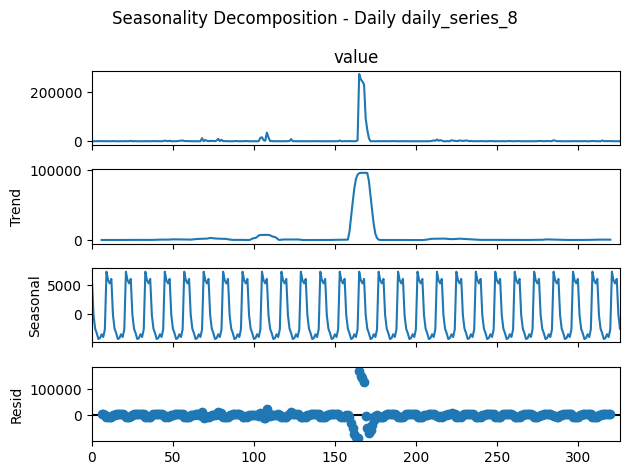

Plotting daily data for daily_series_9...

EDA for daily_series_9:
       Unnamed: 0            timestamp          value
count  341.000000                  341     341.000000
mean   170.000000  2022-08-10 00:00:00  121746.184751
min      0.000000  2022-02-21 00:00:00   10554.000000
25%     85.000000  2022-05-17 00:00:00   56204.000000
50%    170.000000  2022-08-10 00:00:00   99981.000000
75%    255.000000  2022-11-03 00:00:00  172257.000000
max    340.000000  2023-01-27 00:00:00  293358.000000
std     98.582453                  NaN   73648.861066
Missing values in daily_series_9:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


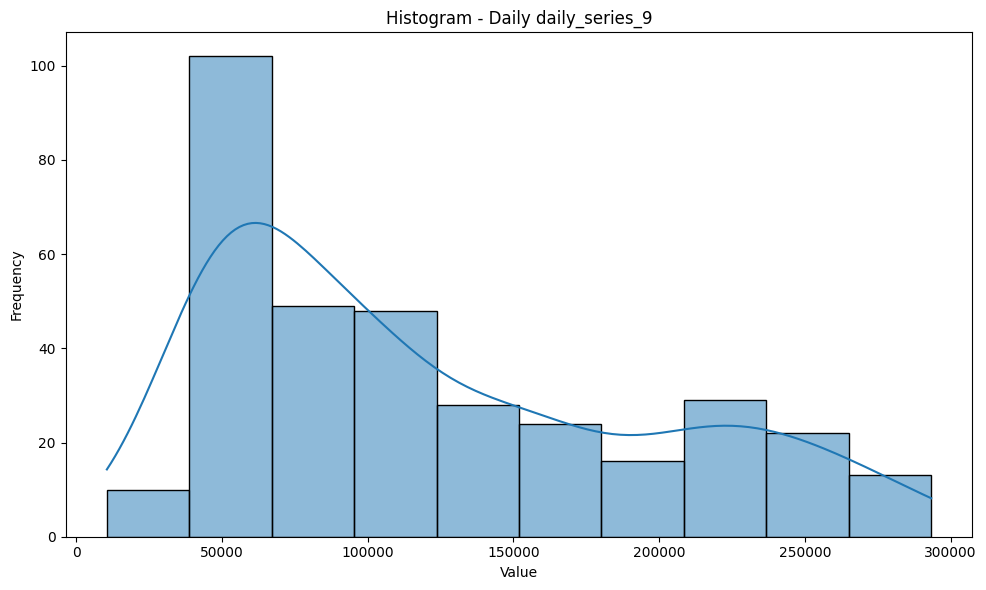

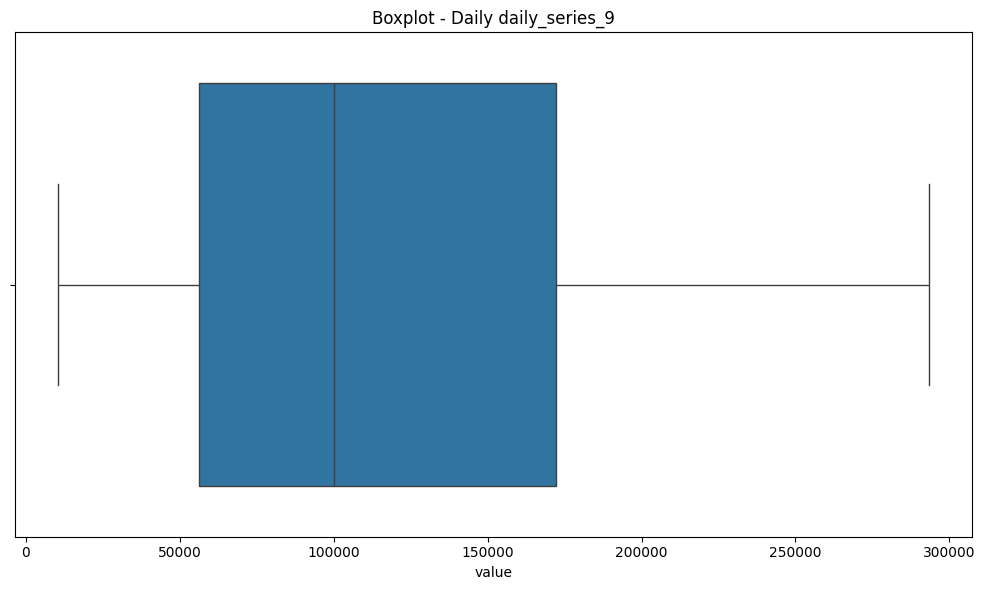

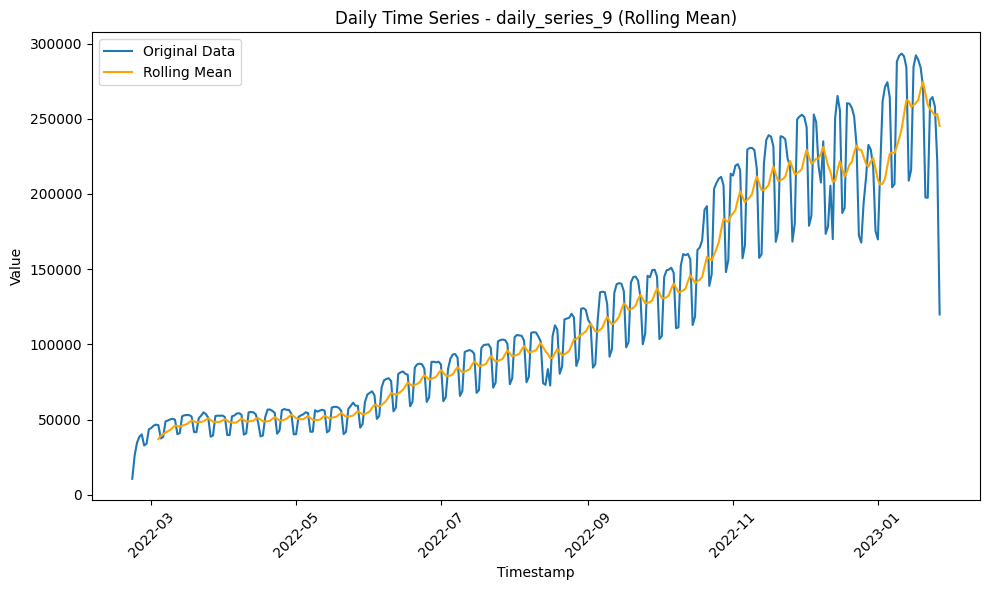

<Figure size 1000x600 with 0 Axes>

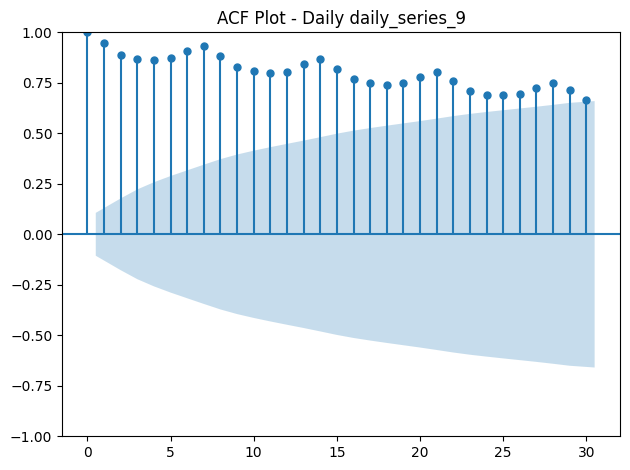

<Figure size 1000x600 with 0 Axes>

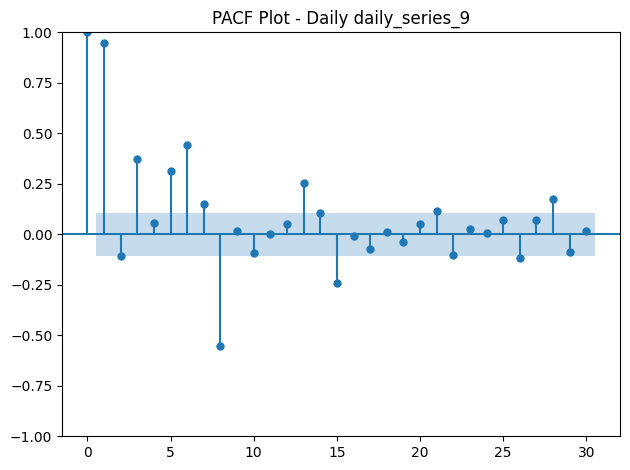

Decomposing series daily_series_9 with period=12...


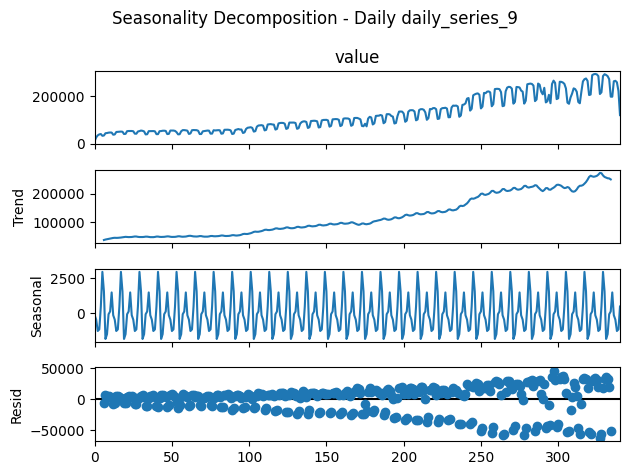

Plotting daily data for daily_series_10...

EDA for daily_series_10:
       Unnamed: 0            timestamp       value
count   96.000000                   96   96.000000
mean    47.500000  2021-08-01 12:00:00   44.489583
min      0.000000  2021-06-15 00:00:00    0.000000
25%     23.750000  2021-07-08 18:00:00    0.000000
50%     47.500000  2021-08-01 12:00:00   50.000000
75%     71.250000  2021-08-25 06:00:00   73.000000
max     95.000000  2021-09-18 00:00:00  131.000000
std     27.856777                  NaN   36.059890
Missing values in daily_series_10:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


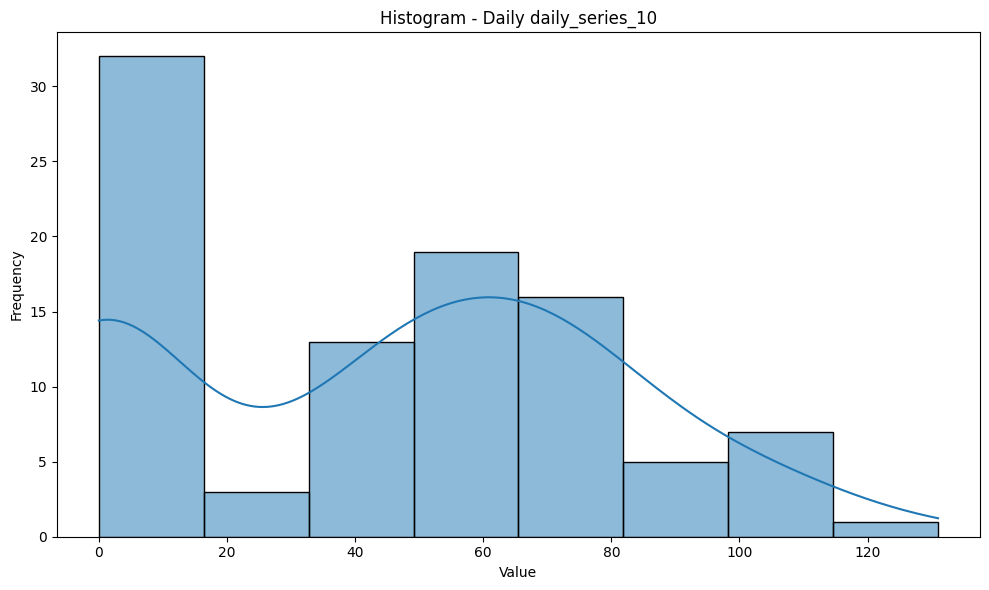

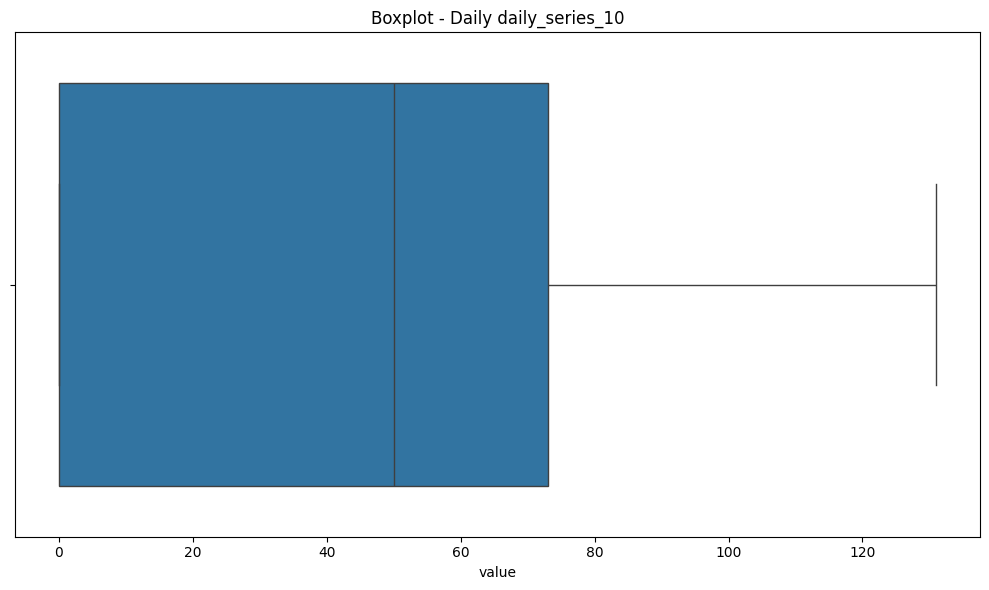

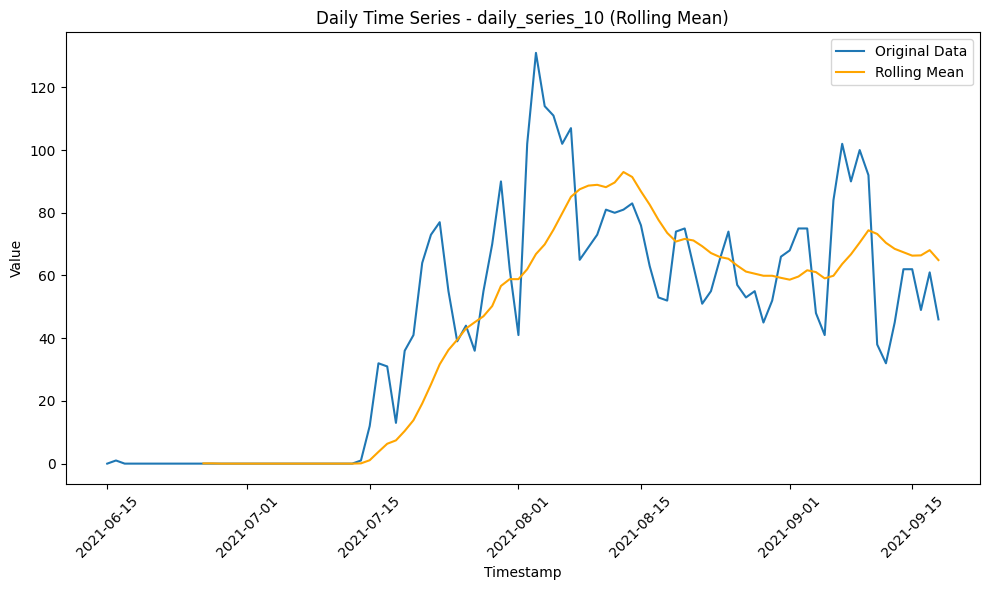

<Figure size 1000x600 with 0 Axes>

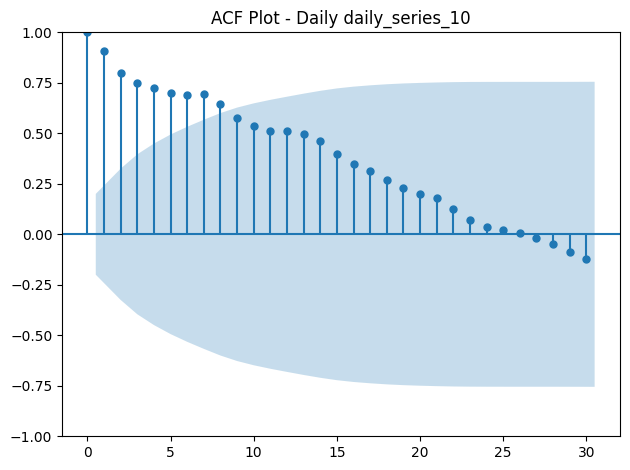

<Figure size 1000x600 with 0 Axes>

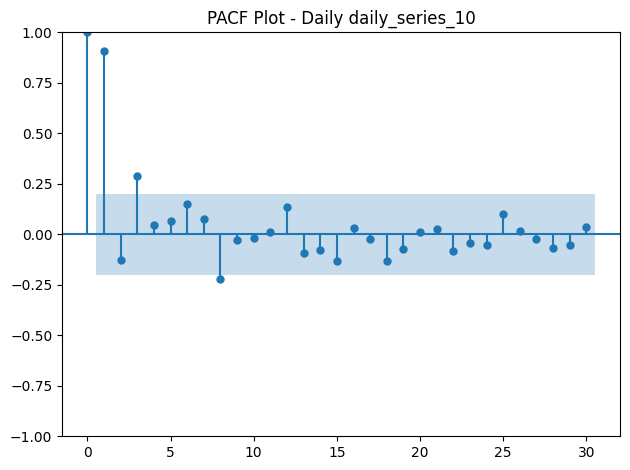

Decomposing series daily_series_10 with period=12...


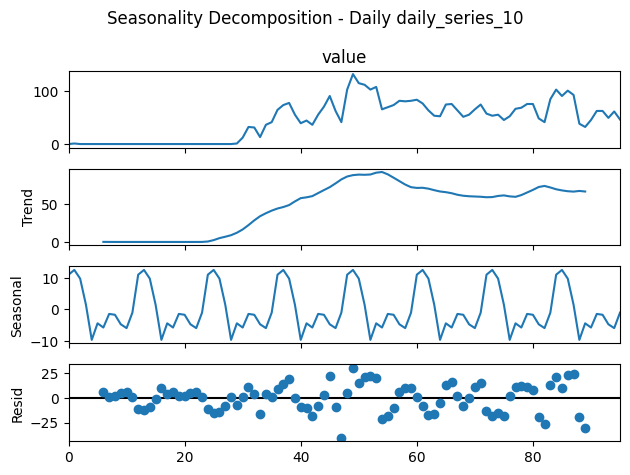

Plotting weekly data for weekly_series_1...

EDA for weekly_series_1:
       Unnamed: 0            timestamp         value
count   75.000000                   75  7.500000e+01
mean    37.000000  2021-09-27 00:00:00  1.245492e+08
min      0.000000  2021-01-11 00:00:00  5.041067e+07
25%     18.500000  2021-05-20 12:00:00  1.093099e+08
50%     37.000000  2021-09-27 00:00:00  1.301956e+08
75%     55.500000  2022-02-03 12:00:00  1.433756e+08
max     74.000000  2022-06-13 00:00:00  1.774219e+08
std     21.794495                  NaN  2.919470e+07
Missing values in weekly_series_1:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


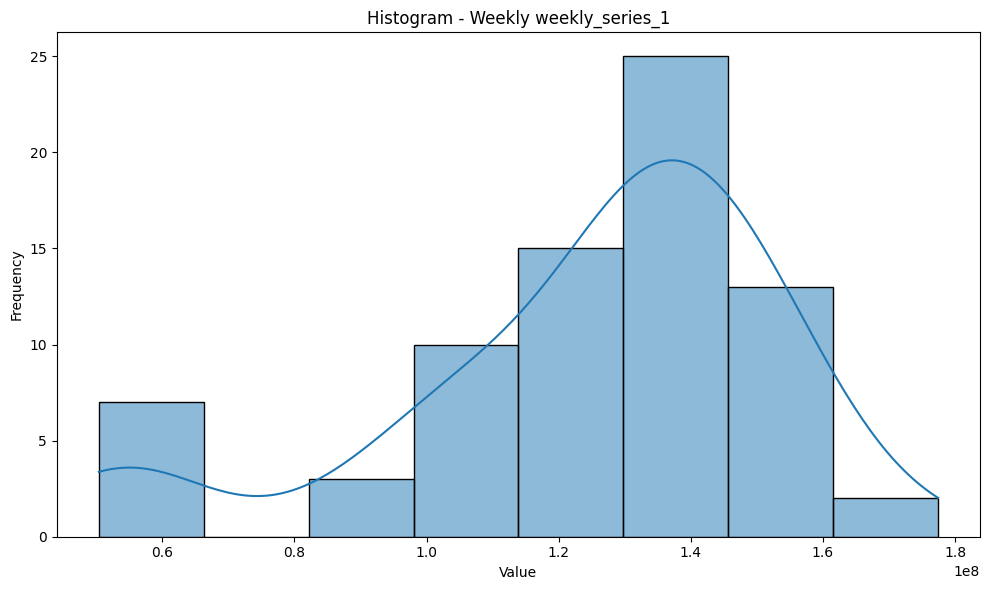

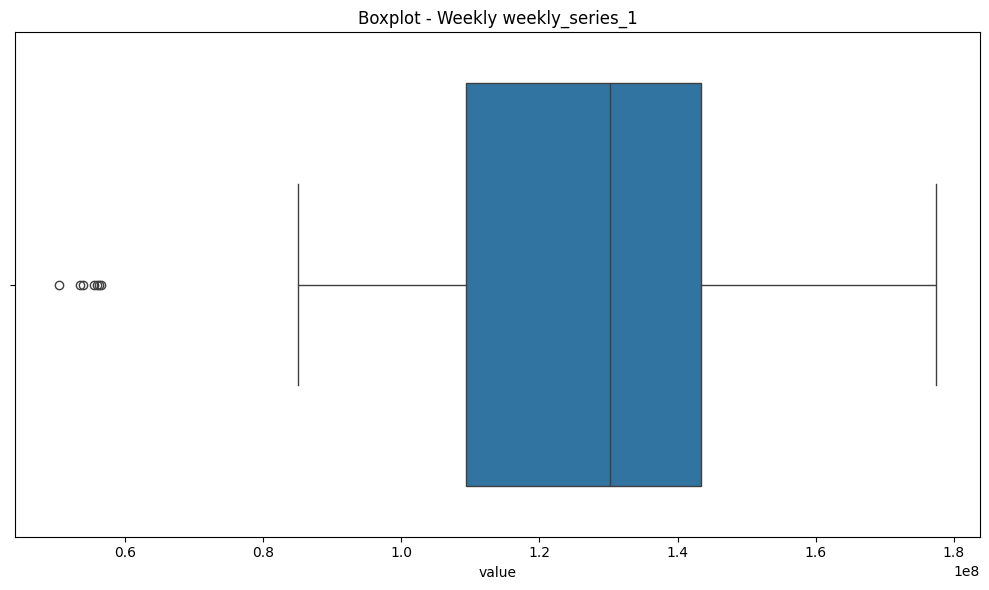

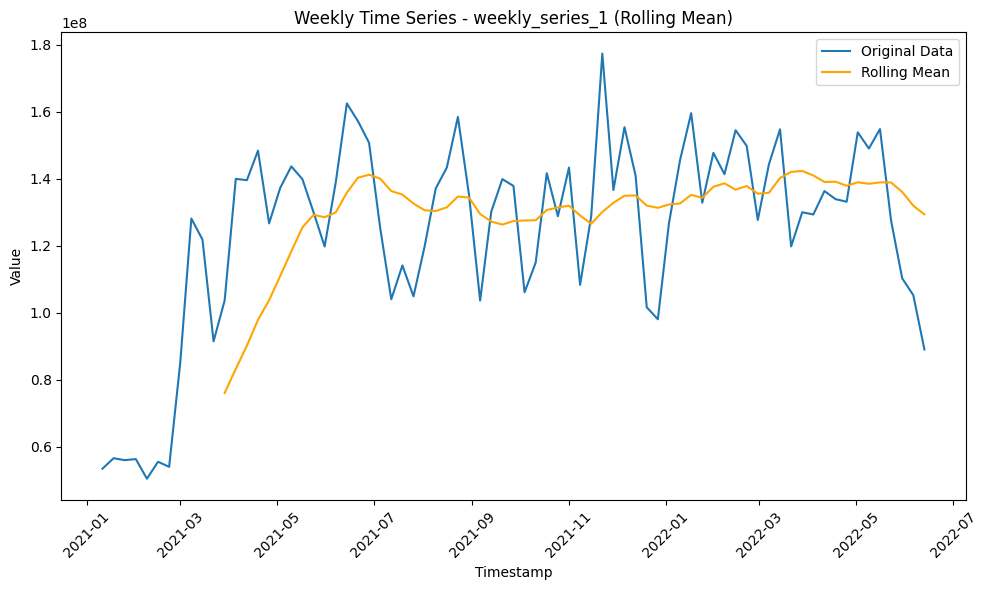

<Figure size 1000x600 with 0 Axes>

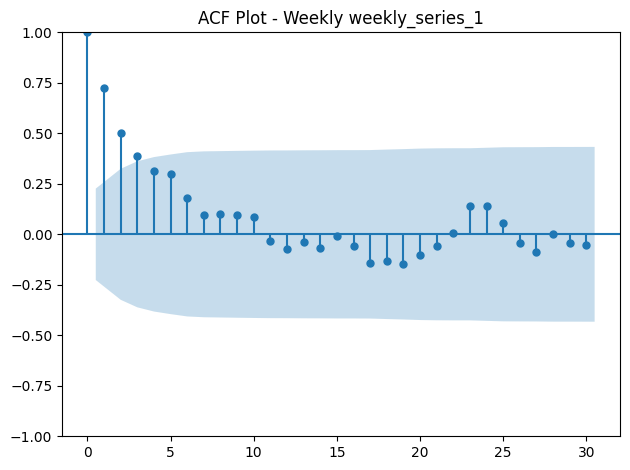

<Figure size 1000x600 with 0 Axes>

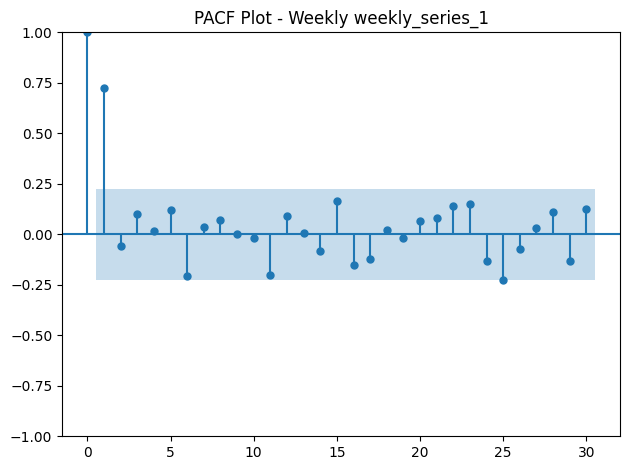

Decomposing series weekly_series_1 with period=12...


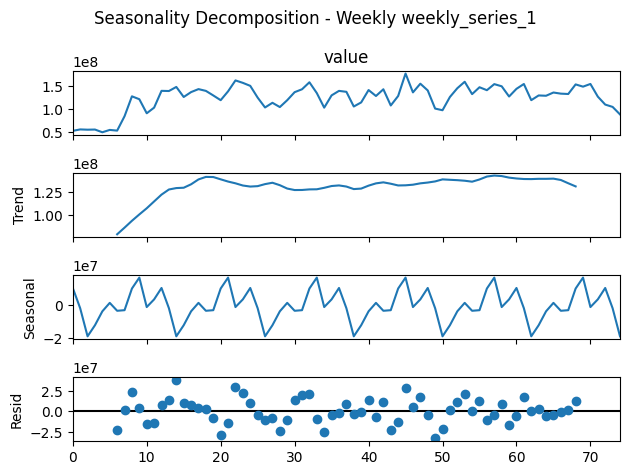

Plotting weekly data for weekly_series_2...

EDA for weekly_series_2:
       Unnamed: 0            timestamp         value
count   18.000000                   18     18.000000
mean     8.500000  2022-05-19 12:00:00   9746.923837
min      0.000000  2022-03-21 00:00:00    563.318845
25%      4.250000  2022-04-19 18:00:00   4834.377251
50%      8.500000  2022-05-19 12:00:00  10134.388068
75%     12.750000  2022-06-18 06:00:00  14068.550345
max     17.000000  2022-07-18 00:00:00  21552.633669
std      5.338539                  NaN   6181.478765
Missing values in weekly_series_2:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


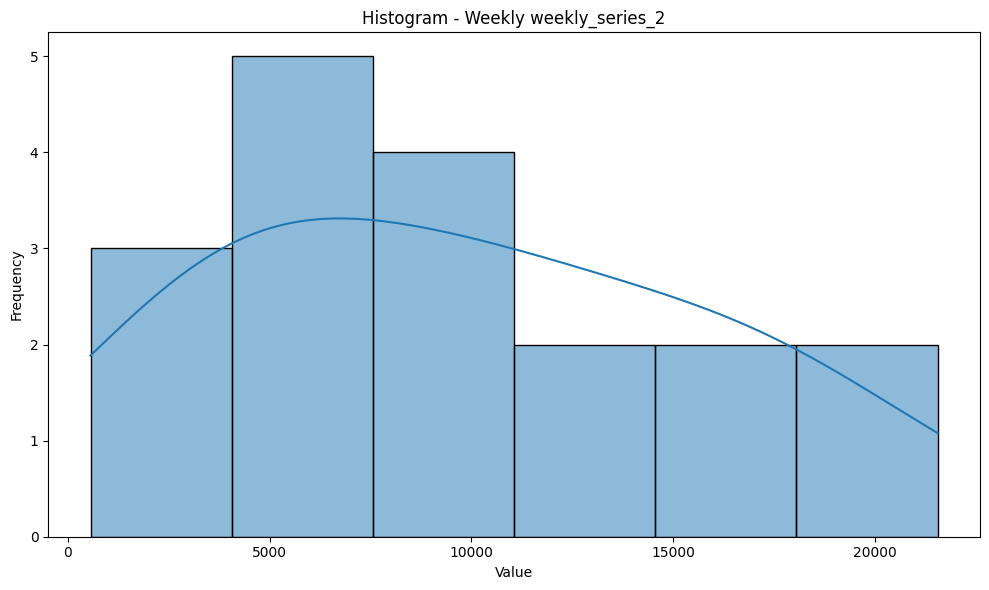

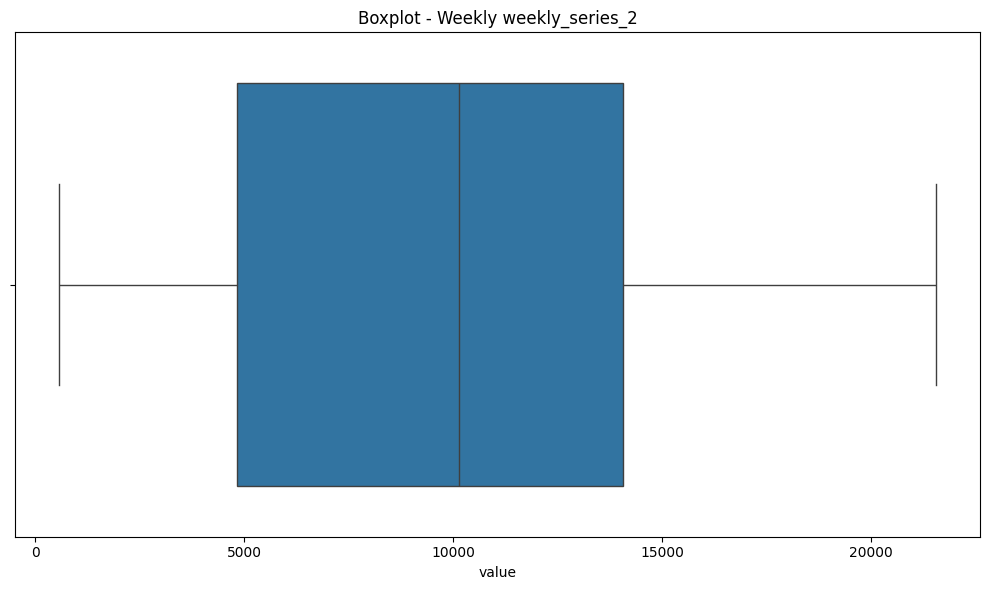

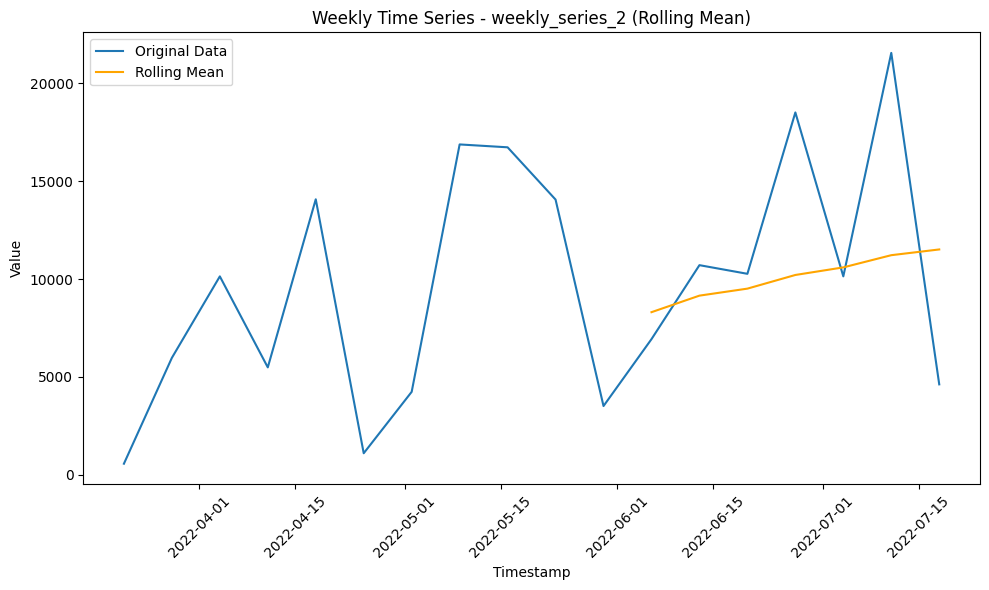

<Figure size 1000x600 with 0 Axes>

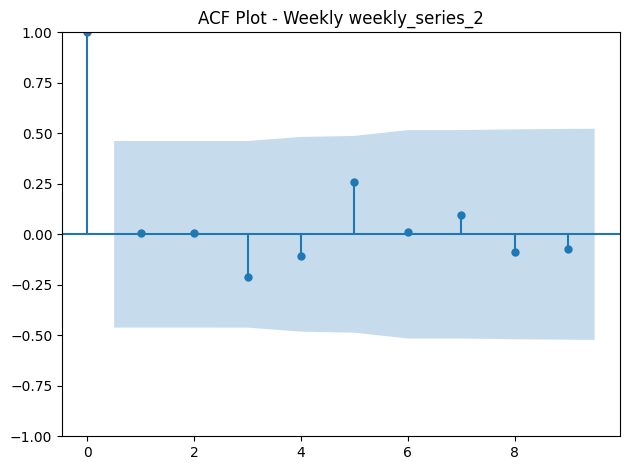

<Figure size 1000x600 with 0 Axes>

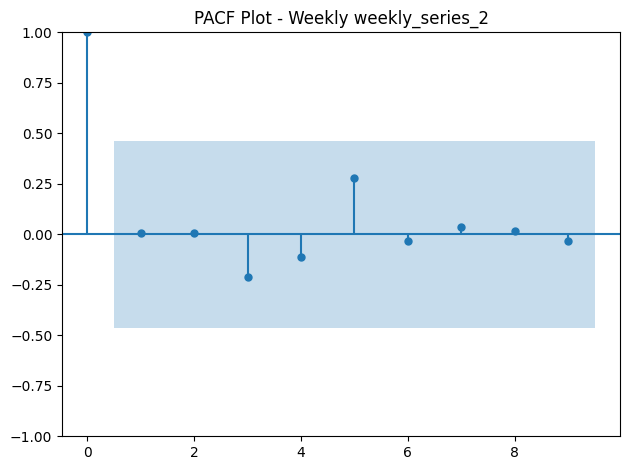

Decomposing series weekly_series_2 with period=9...


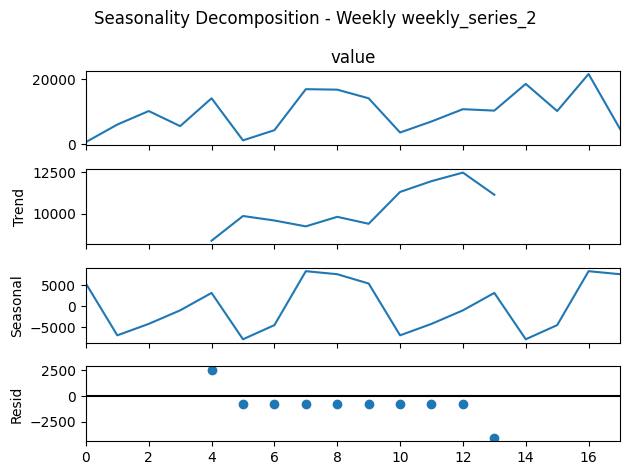

Plotting weekly data for weekly_series_3...

EDA for weekly_series_3:
       Unnamed: 0            timestamp         value
count   18.000000                   18     18.000000
mean     8.500000  2022-05-19 12:00:00  40751.959989
min      0.000000  2022-03-21 00:00:00  11366.153709
25%      4.250000  2022-04-19 18:00:00  31704.265245
50%      8.500000  2022-05-19 12:00:00  38618.563606
75%     12.750000  2022-06-18 06:00:00  50447.759296
max     17.000000  2022-07-18 00:00:00  70663.619609
std      5.338539                  NaN  16171.556464
Missing values in weekly_series_3:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


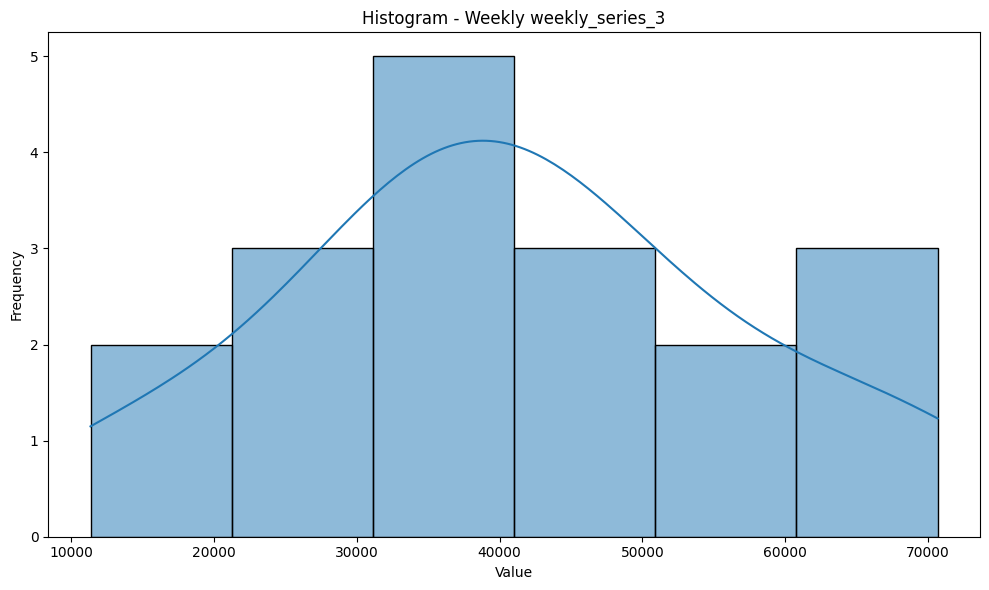

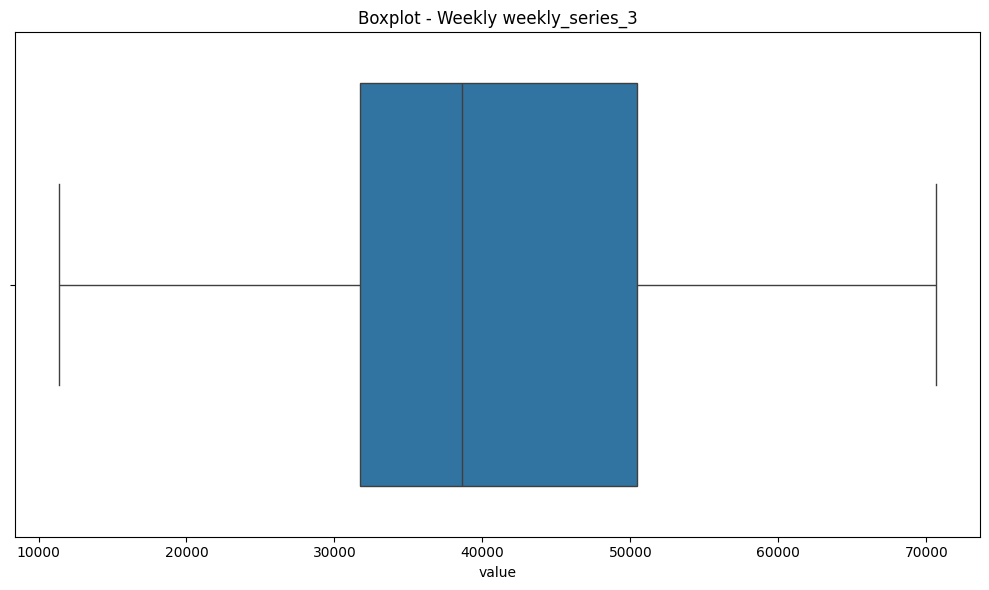

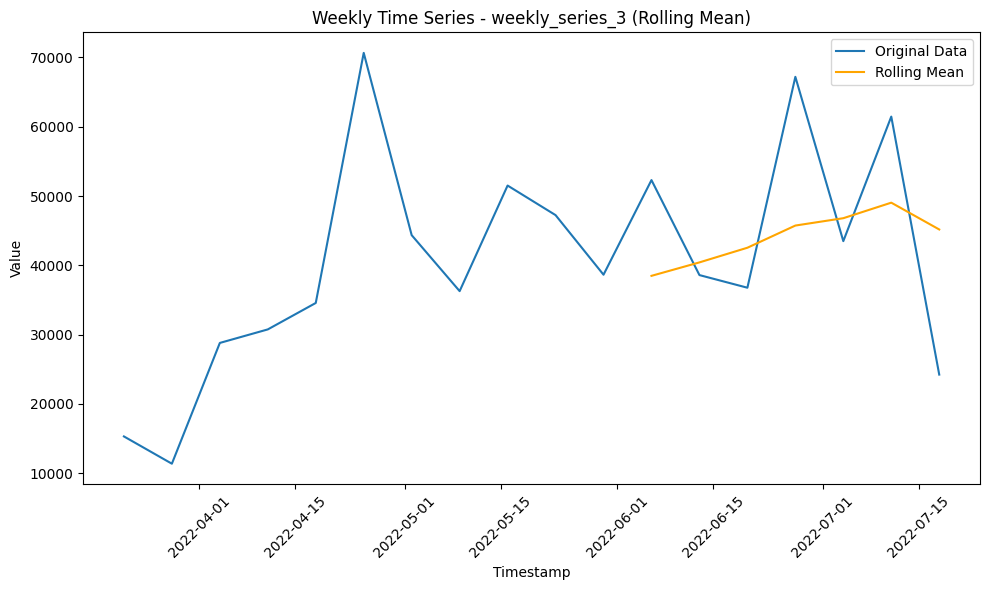

<Figure size 1000x600 with 0 Axes>

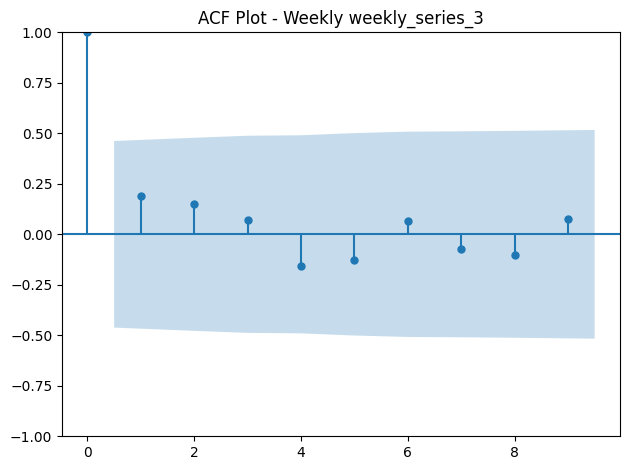

<Figure size 1000x600 with 0 Axes>

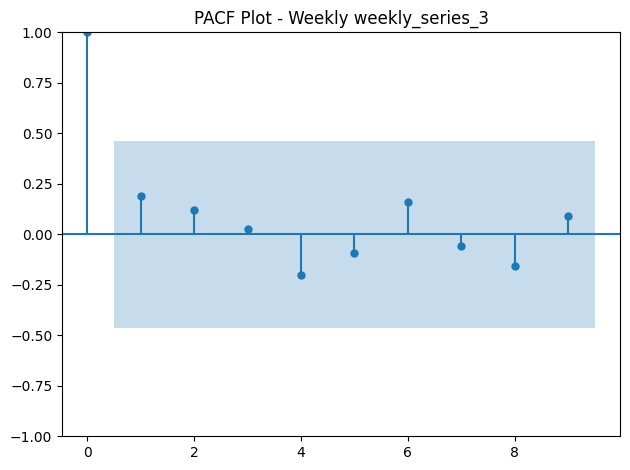

Decomposing series weekly_series_3 with period=9...


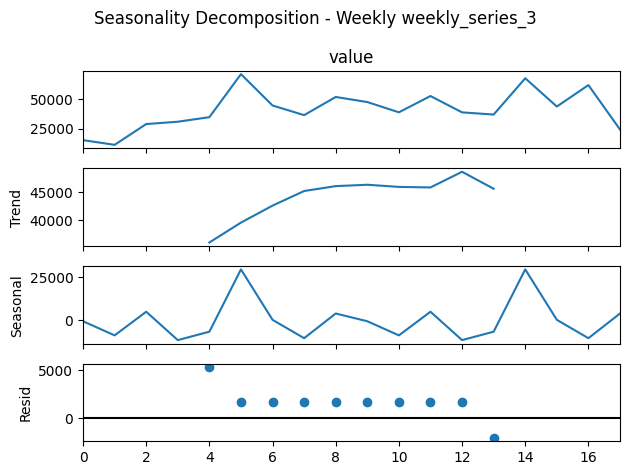

Plotting weekly data for weekly_series_4...

EDA for weekly_series_4:
       Unnamed: 0            timestamp       value
count  117.000000                  117  117.000000
mean    58.000000  2021-06-07 00:00:00   78.977742
min      0.000000  2020-04-27 00:00:00   73.599728
25%     29.000000  2020-11-16 00:00:00   78.048408
50%     58.000000  2021-06-07 00:00:00   79.291599
75%     87.000000  2021-12-27 00:00:00   80.359825
max    116.000000  2022-07-18 00:00:00   82.816160
std     33.919021                  NaN    2.048750
Missing values in weekly_series_4:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


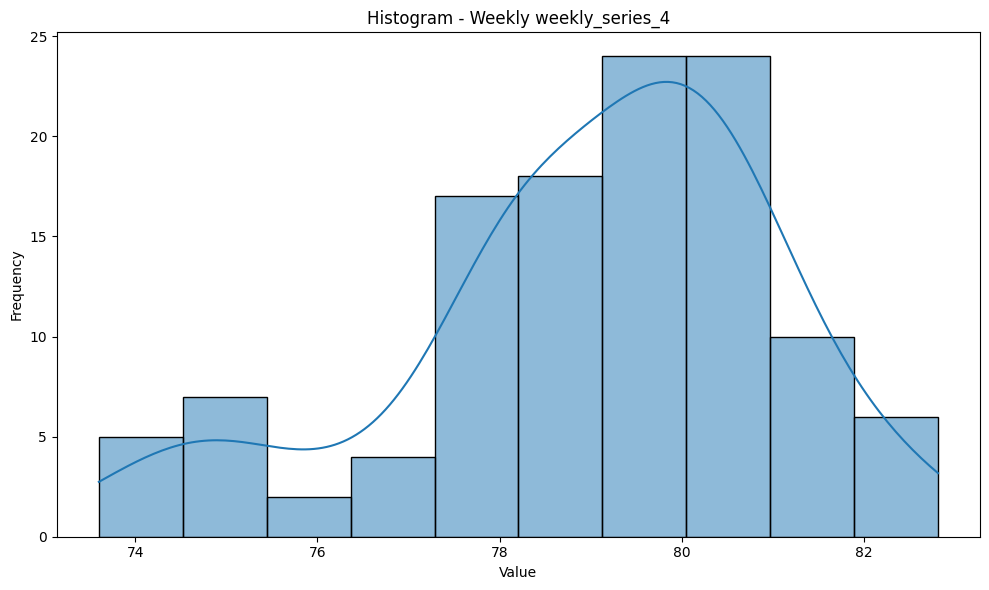

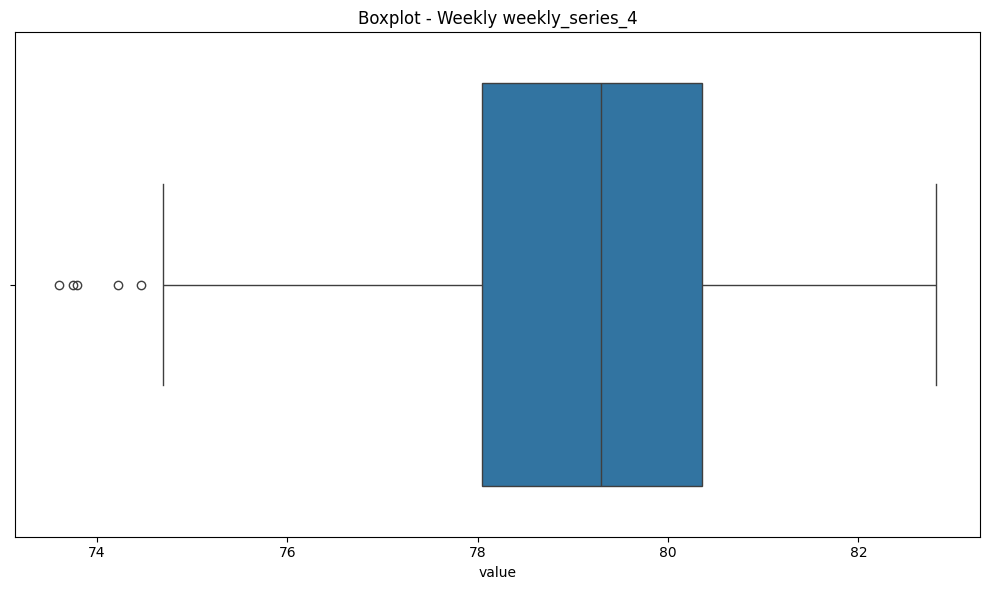

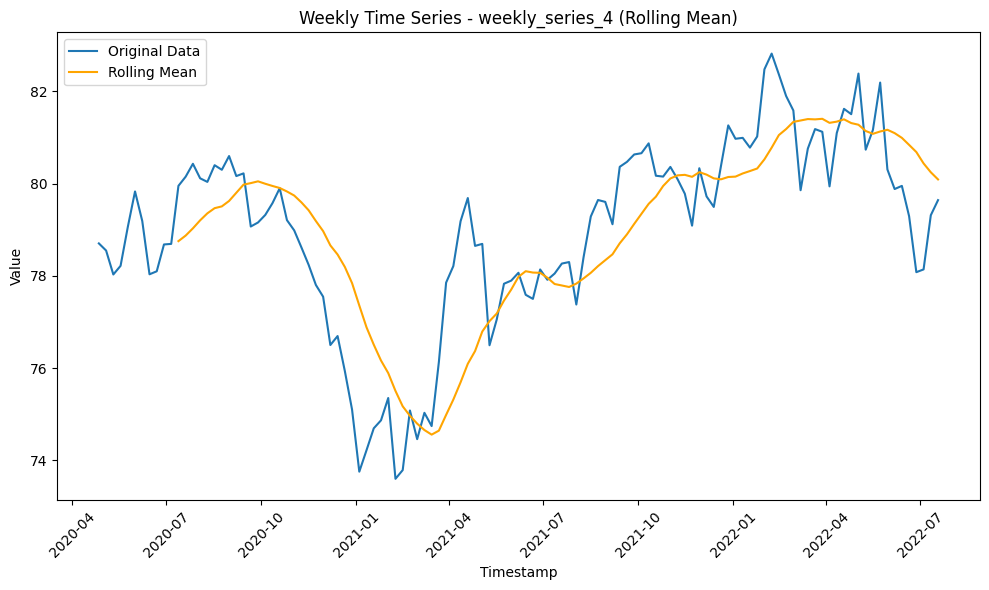

<Figure size 1000x600 with 0 Axes>

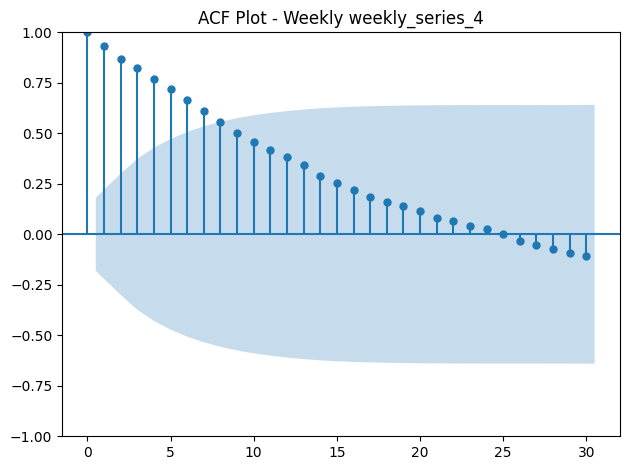

<Figure size 1000x600 with 0 Axes>

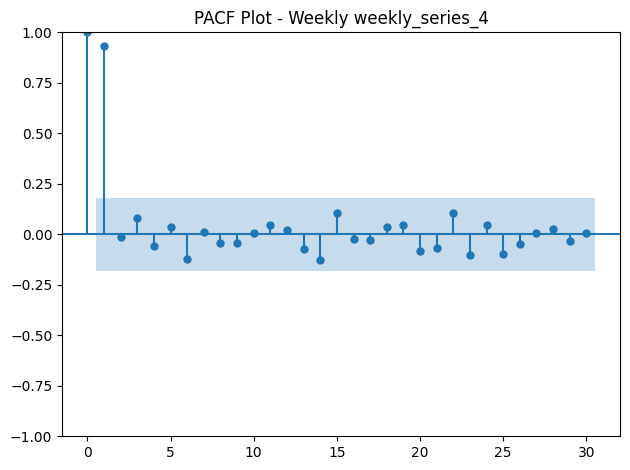

Decomposing series weekly_series_4 with period=12...


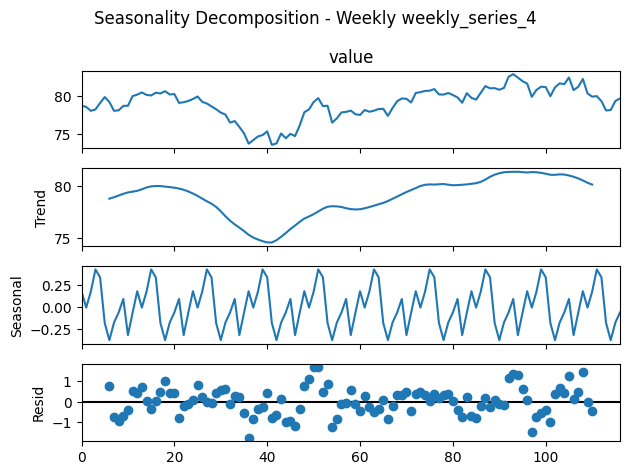

Plotting weekly data for weekly_series_5...

EDA for weekly_series_5:
       Unnamed: 0            timestamp         value
count   75.000000                   75  7.500000e+01
mean    37.000000  2021-09-27 00:00:00  8.617195e+06
min      0.000000  2021-01-11 00:00:00  6.271015e+06
25%     18.500000  2021-05-20 12:00:00  7.987855e+06
50%     37.000000  2021-09-27 00:00:00  8.542699e+06
75%     55.500000  2022-02-03 12:00:00  9.397798e+06
max     74.000000  2022-06-13 00:00:00  1.059072e+07
std     21.794495                  NaN  1.015644e+06
Missing values in weekly_series_5:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


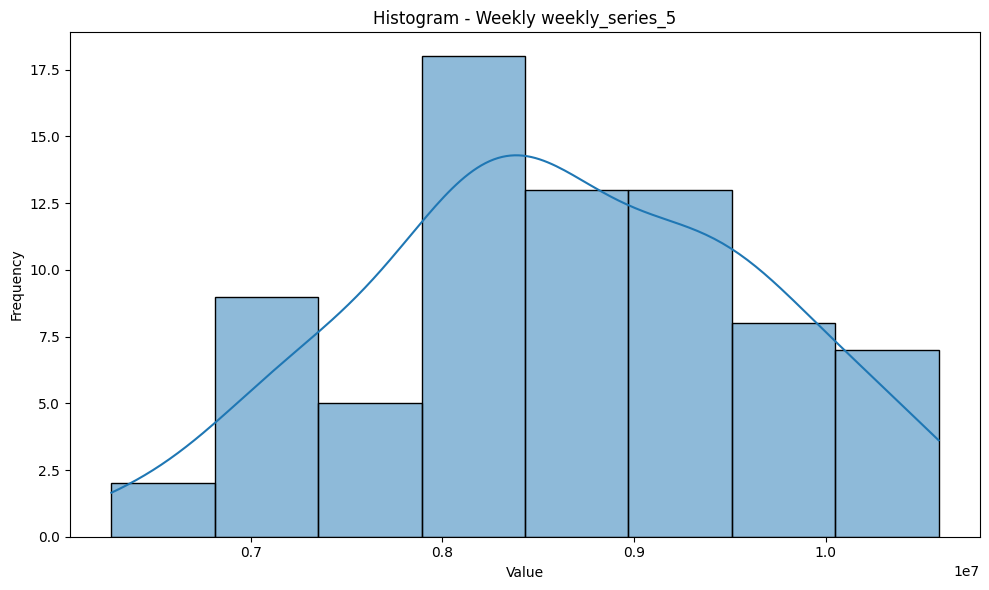

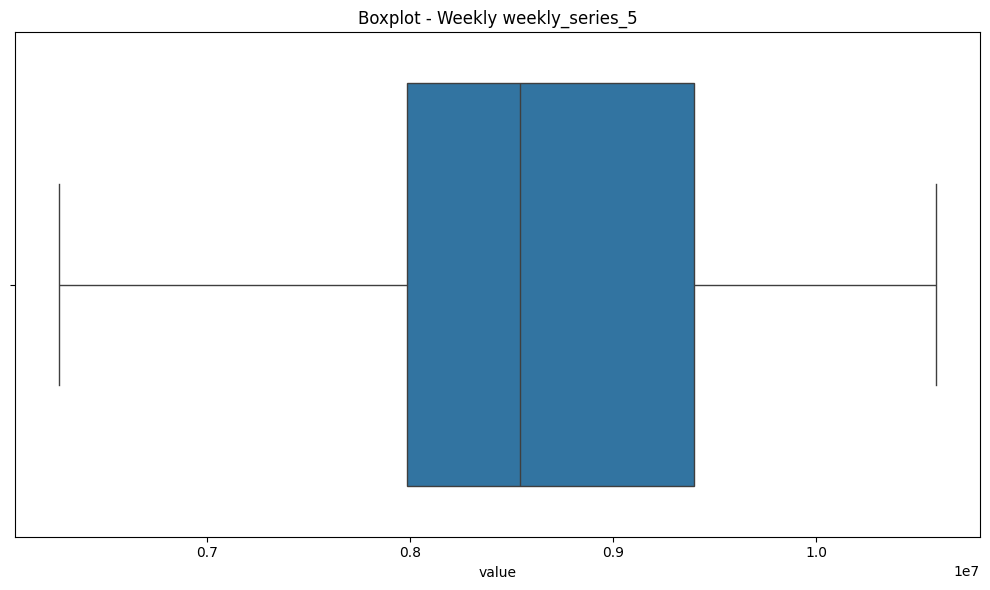

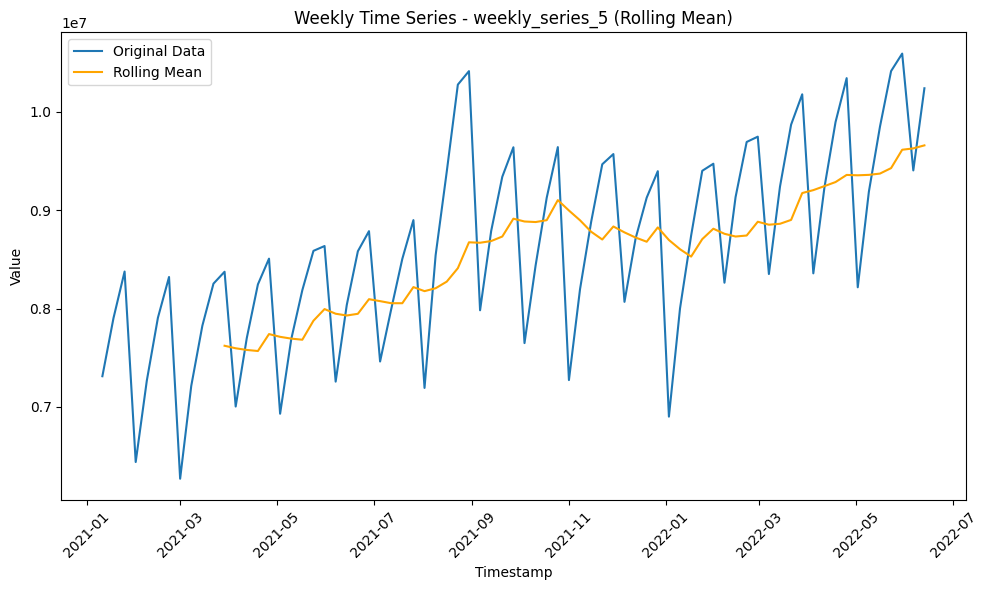

<Figure size 1000x600 with 0 Axes>

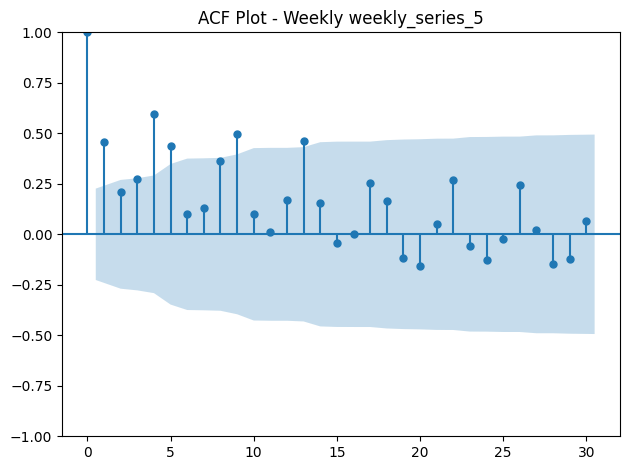

<Figure size 1000x600 with 0 Axes>

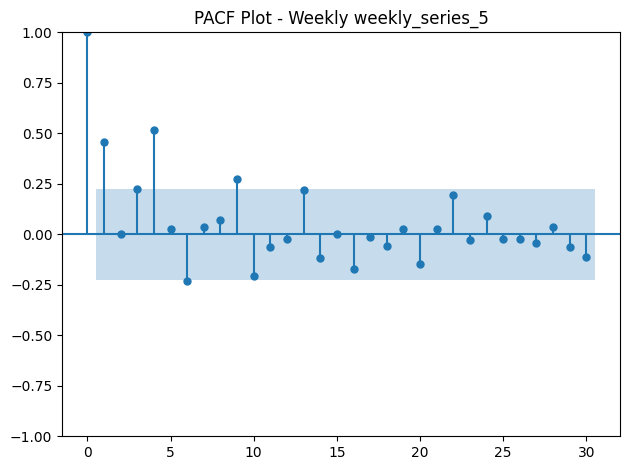

Decomposing series weekly_series_5 with period=12...


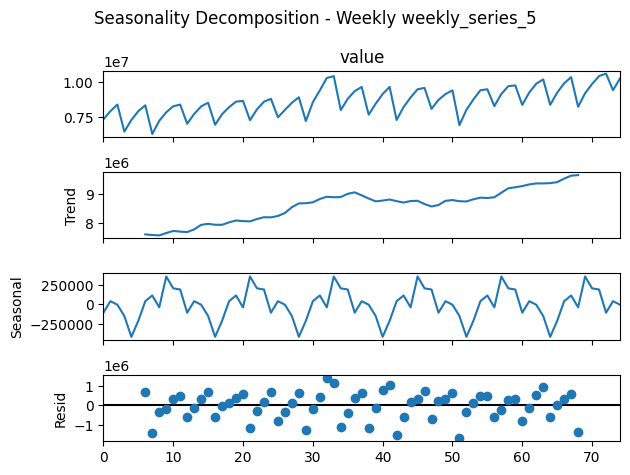

Plotting weekly data for weekly_series_6...

EDA for weekly_series_6:
       Unnamed: 0            timestamp         value
count   53.000000                   53     53.000000
mean    26.000000  2017-01-30 00:00:00  14760.301887
min      0.000000  2016-08-01 00:00:00   4514.000000
25%     13.000000  2016-10-31 00:00:00  12610.000000
50%     26.000000  2017-01-30 00:00:00  13952.000000
75%     39.000000  2017-05-01 00:00:00  14701.000000
max     52.000000  2017-07-31 00:00:00  25382.000000
std     15.443445                  NaN   4192.040336
Missing values in weekly_series_6:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


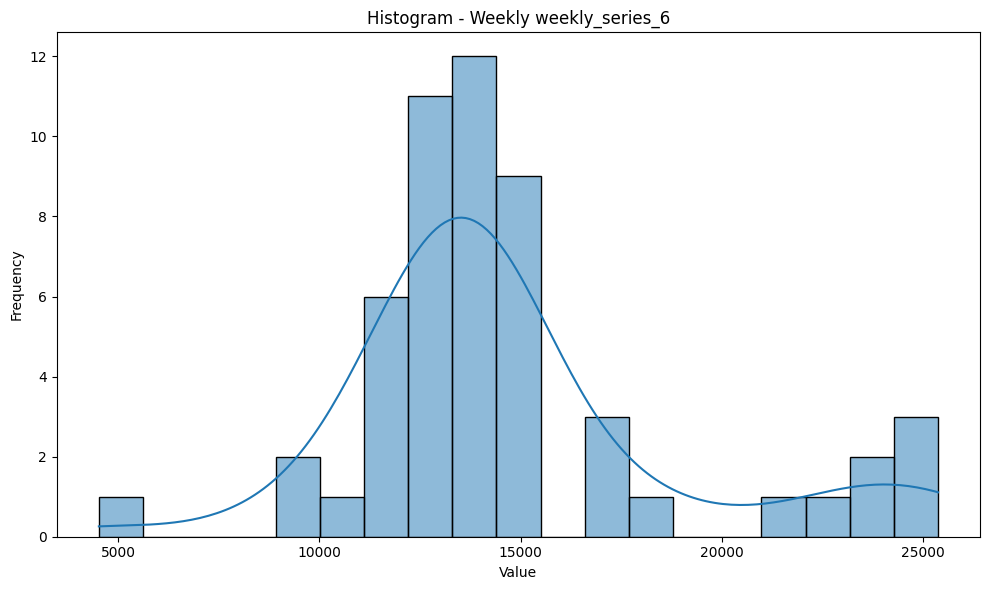

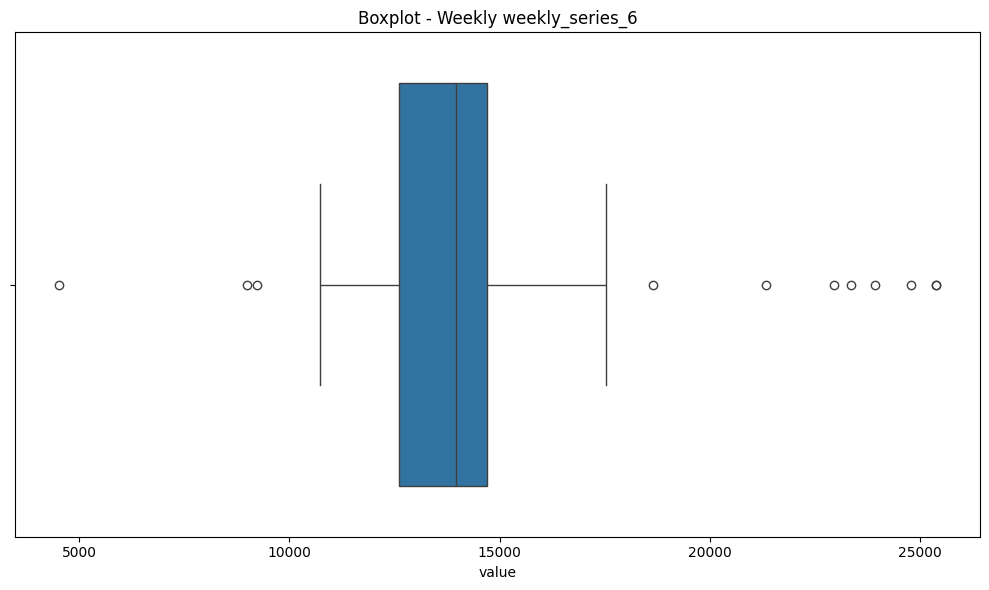

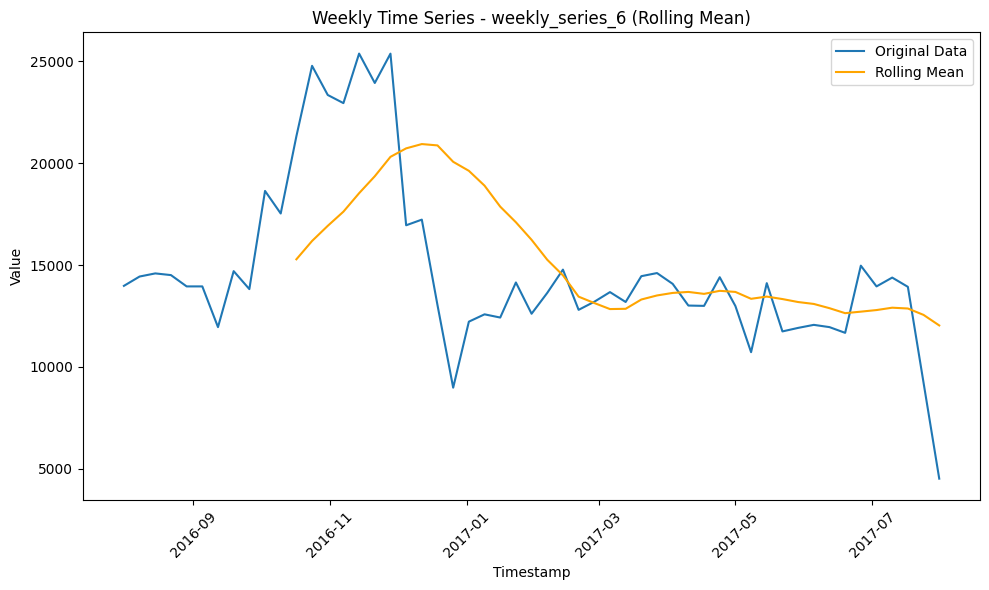

<Figure size 1000x600 with 0 Axes>

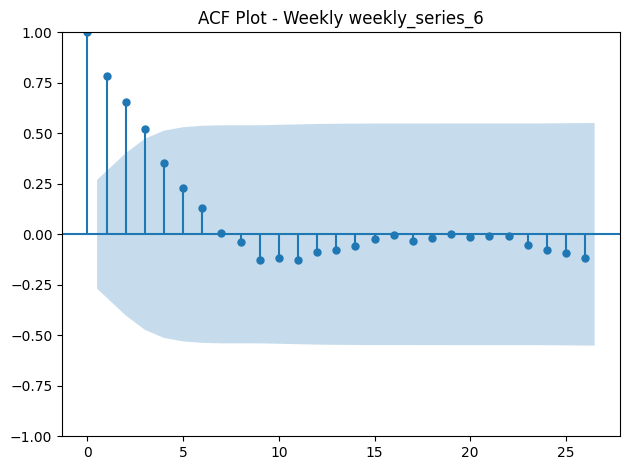

<Figure size 1000x600 with 0 Axes>

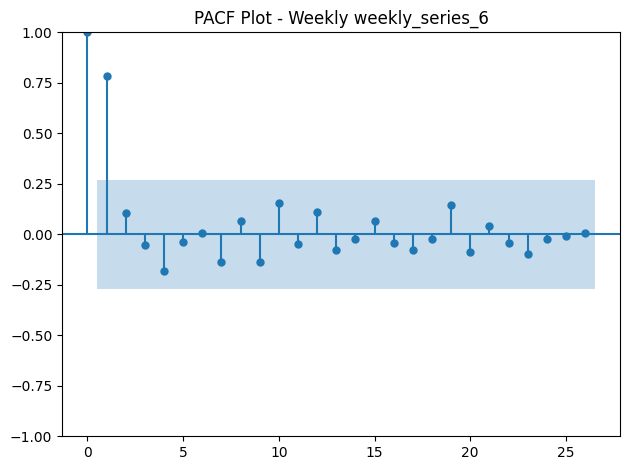

Decomposing series weekly_series_6 with period=12...


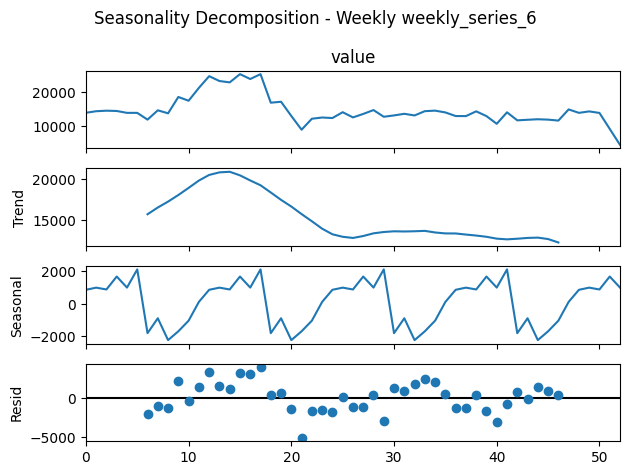

Plotting weekly data for weekly_series_7...

EDA for weekly_series_7:
       Unnamed: 0            timestamp      value
count   53.000000                   53  53.000000
mean    26.000000  2017-01-30 00:00:00  49.834475
min      0.000000  2016-08-01 00:00:00  43.146586
25%     13.000000  2016-10-31 00:00:00  48.329033
50%     26.000000  2017-01-30 00:00:00  49.751244
75%     39.000000  2017-05-01 00:00:00  51.009674
max     52.000000  2017-07-31 00:00:00  59.171621
std     15.443445                  NaN   3.087721
Missing values in weekly_series_7:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


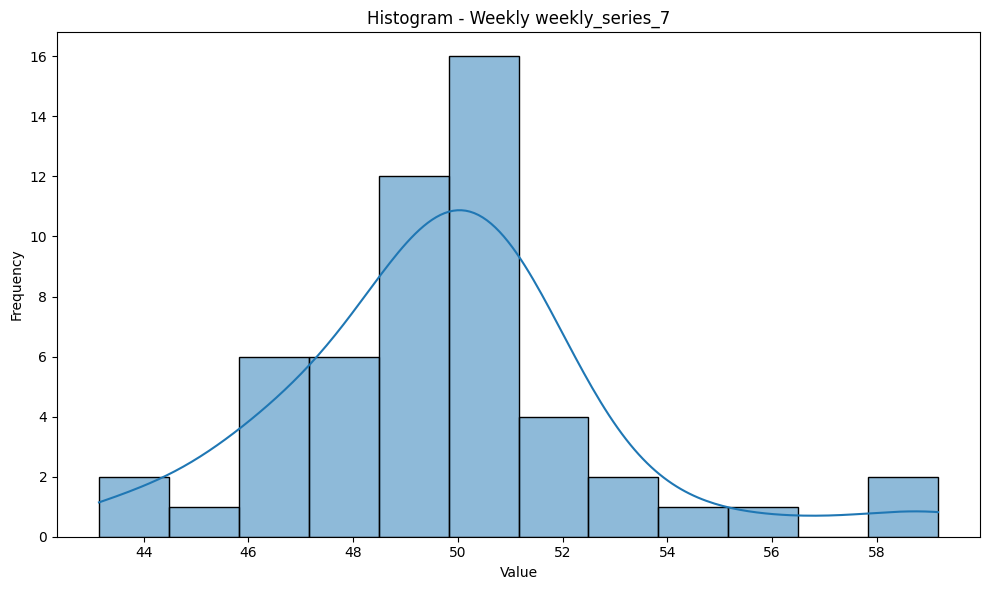

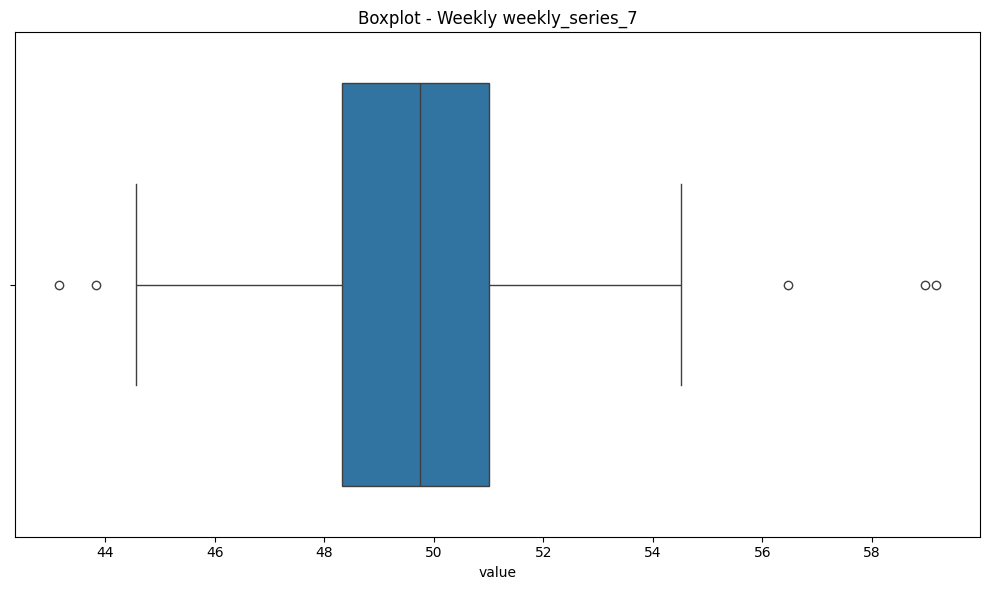

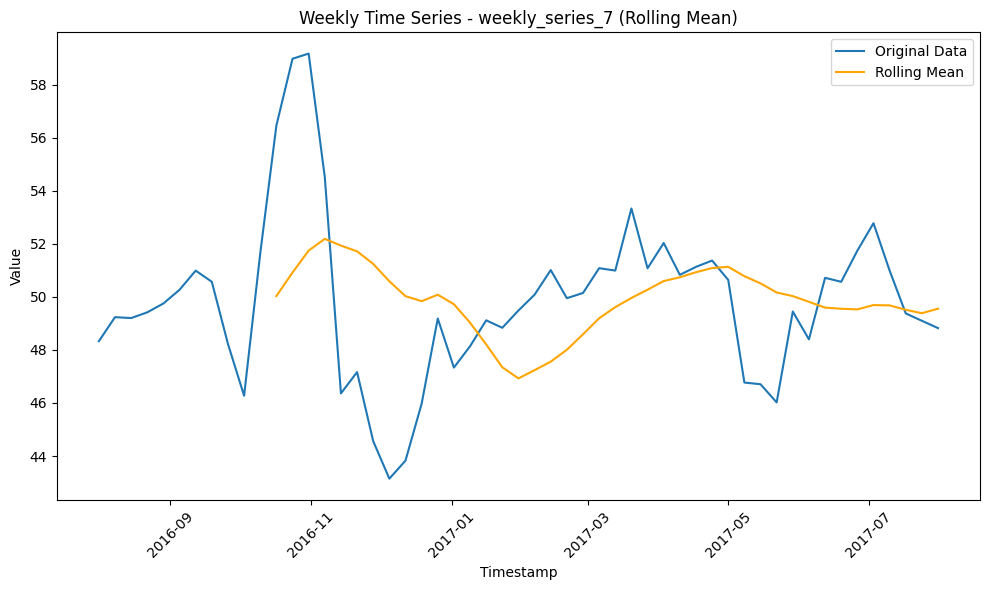

<Figure size 1000x600 with 0 Axes>

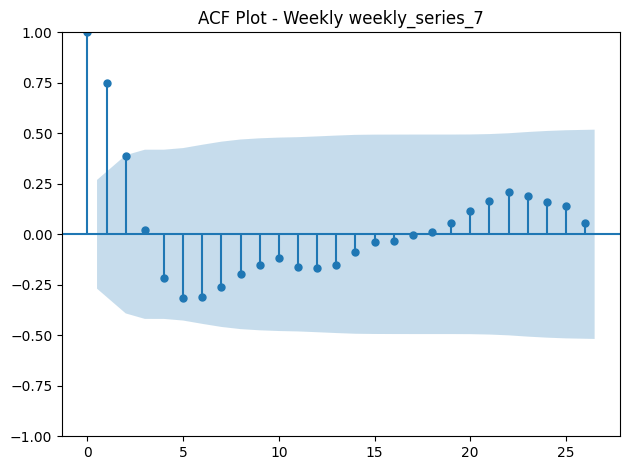

<Figure size 1000x600 with 0 Axes>

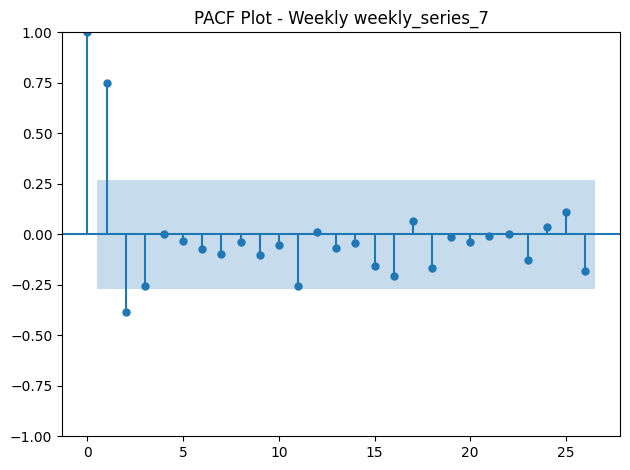

Decomposing series weekly_series_7 with period=12...


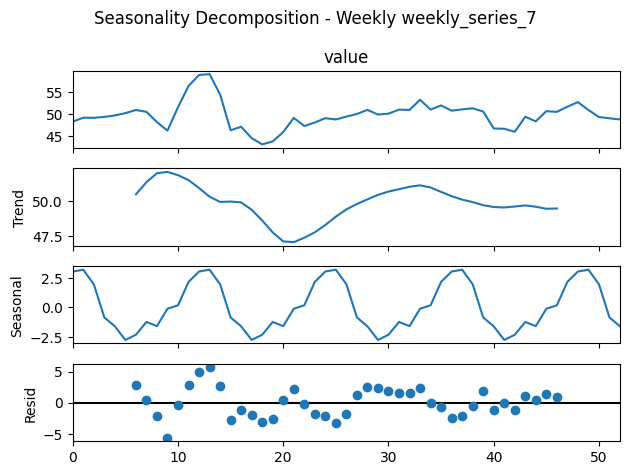

Plotting monthly data for monthly_series_1...

EDA for monthly_series_1:
       Unnamed: 0          value
count  145.000000     145.000000
mean    72.000000  240900.606897
std     42.001984   34409.783380
min      0.000000  161926.000000
25%     36.000000  221130.000000
50%     72.000000  239212.000000
75%    108.000000  265615.000000
max    144.000000  318991.000000
Missing values in monthly_series_1:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


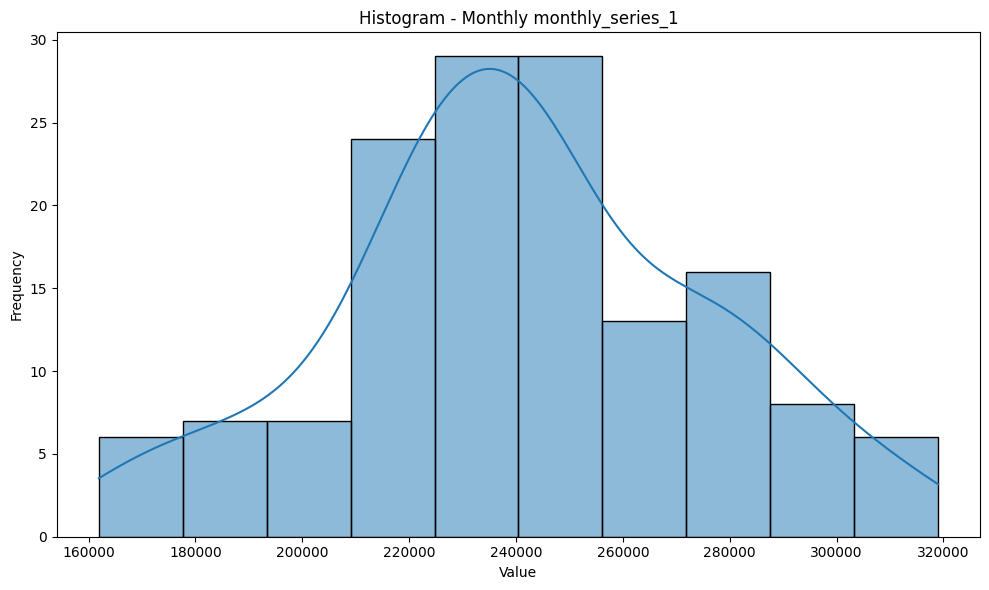

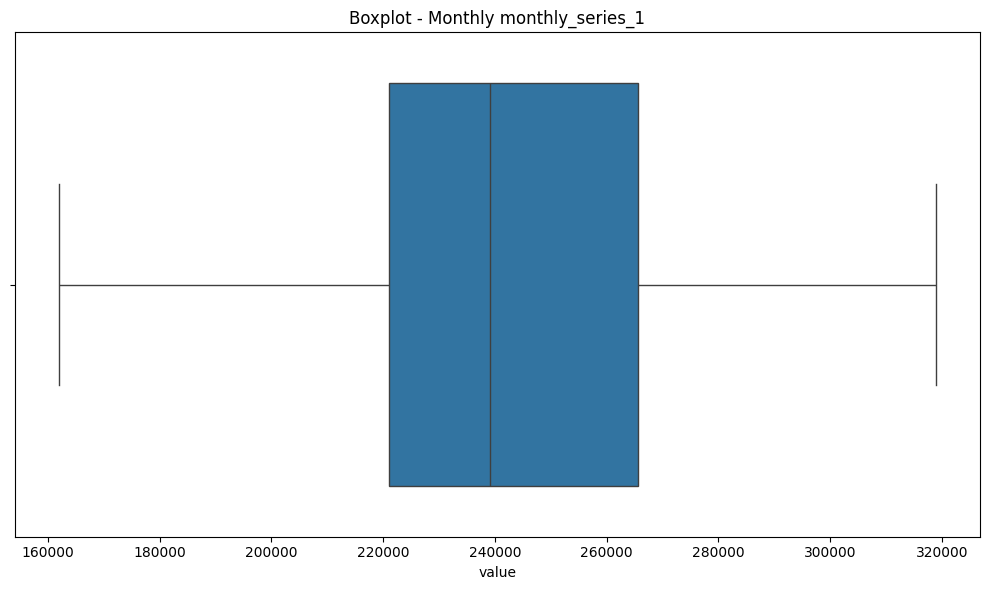

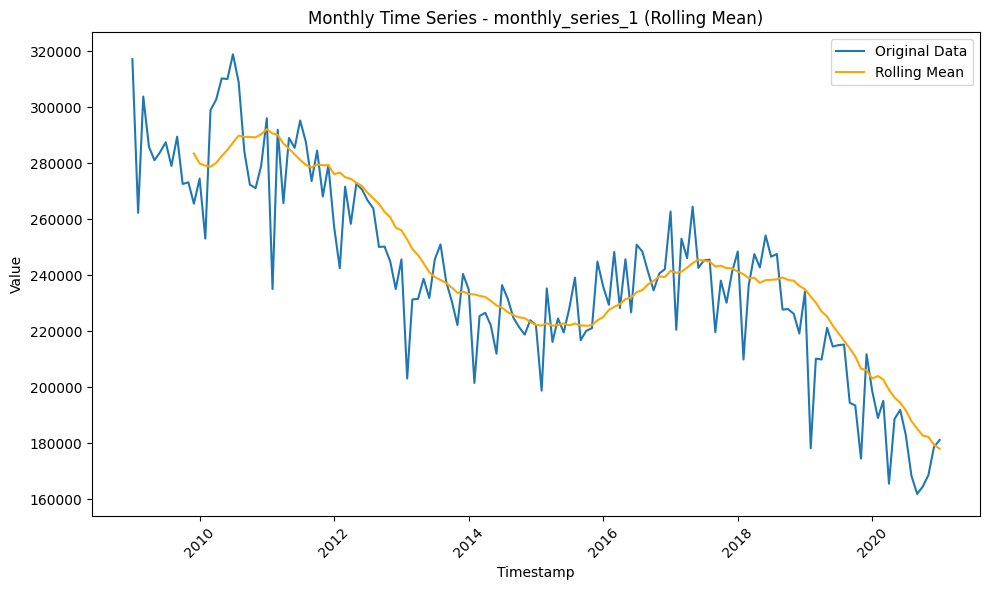

<Figure size 1000x600 with 0 Axes>

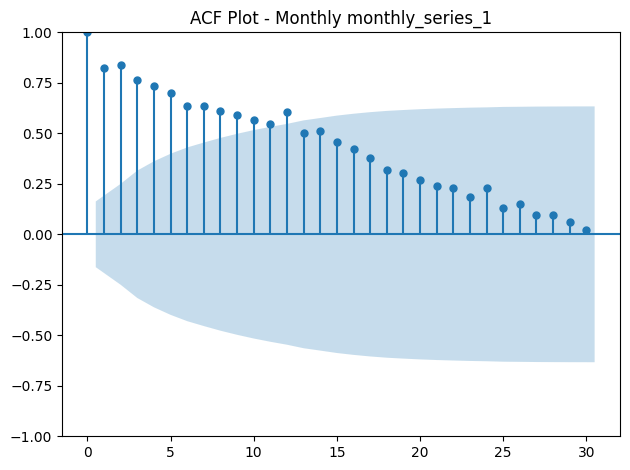

<Figure size 1000x600 with 0 Axes>

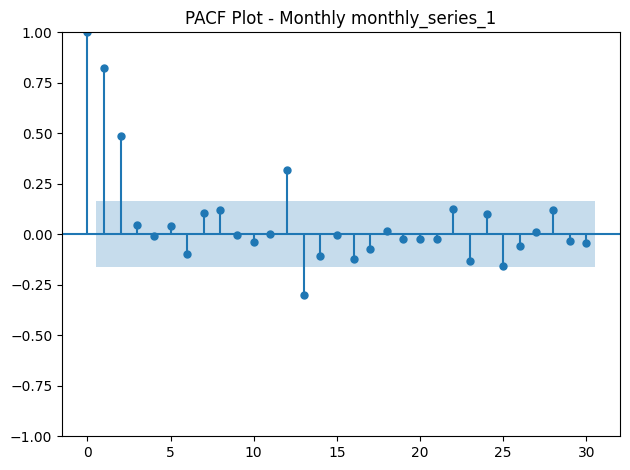

Decomposing series monthly_series_1 with period=12...


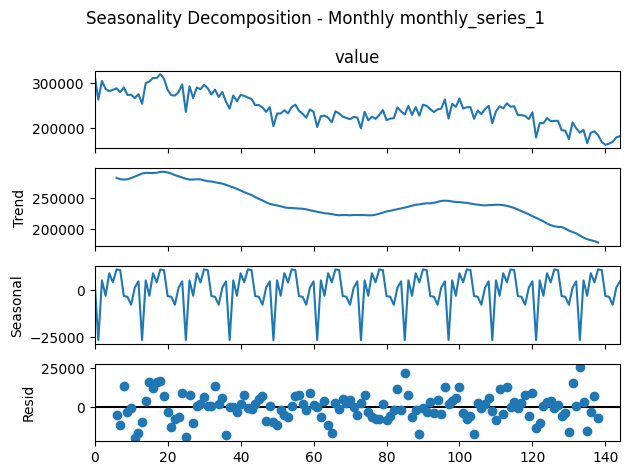

Plotting monthly data for monthly_series_2...

EDA for monthly_series_2:
       Unnamed: 0            timestamp      value
count   25.000000                   25  25.000000
mean    12.000000  2018-12-31 05:45:36   0.000269
min      0.000000  2018-01-01 00:00:00   0.000000
25%      6.000000  2018-07-01 00:00:00   0.000079
50%     12.000000  2019-01-01 00:00:00   0.000150
75%     18.000000  2019-07-01 00:00:00   0.000361
max     24.000000  2020-01-01 00:00:00   0.000993
std      7.359801                  NaN   0.000279
Missing values in monthly_series_2:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


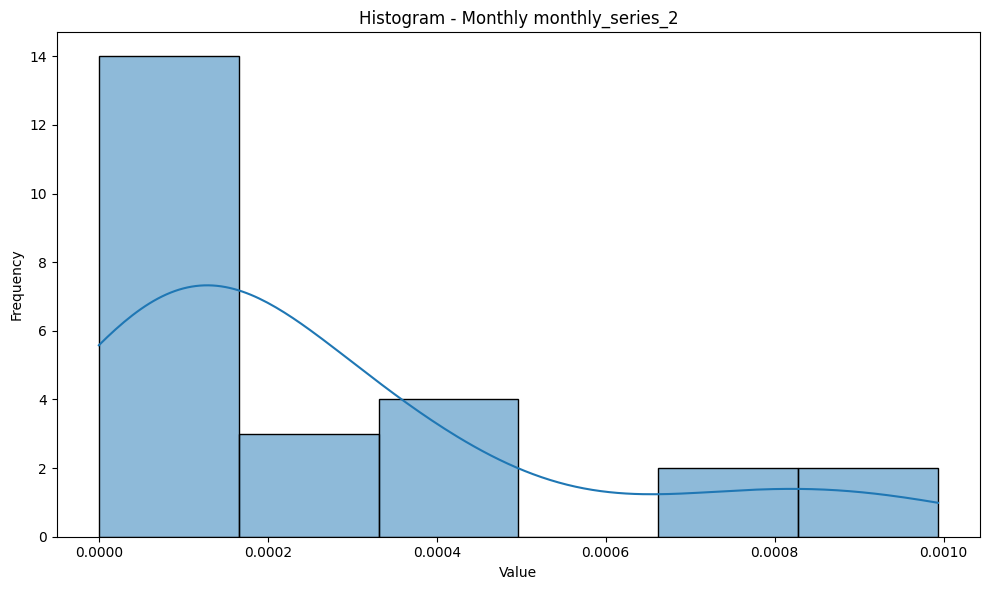

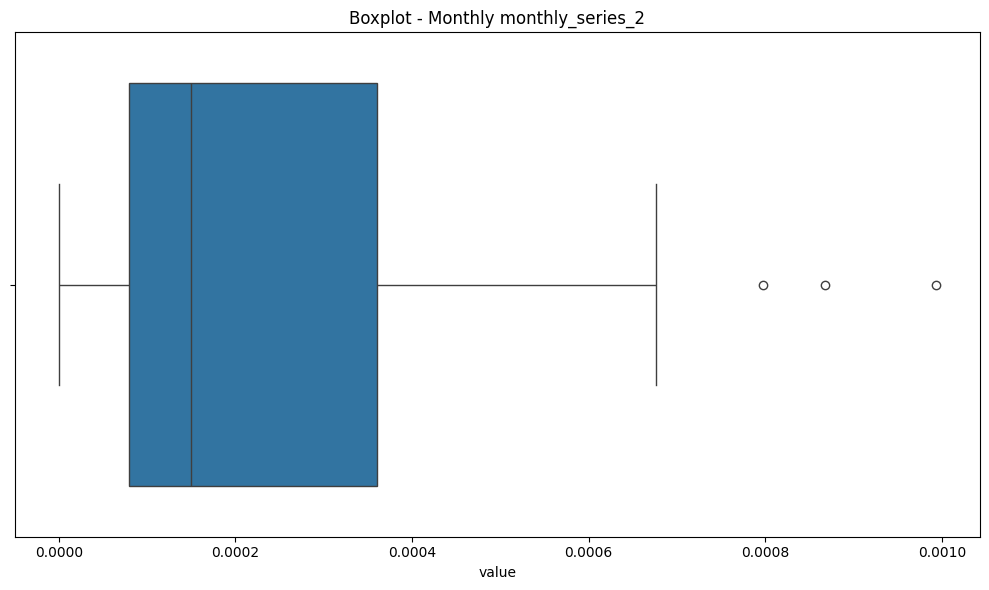

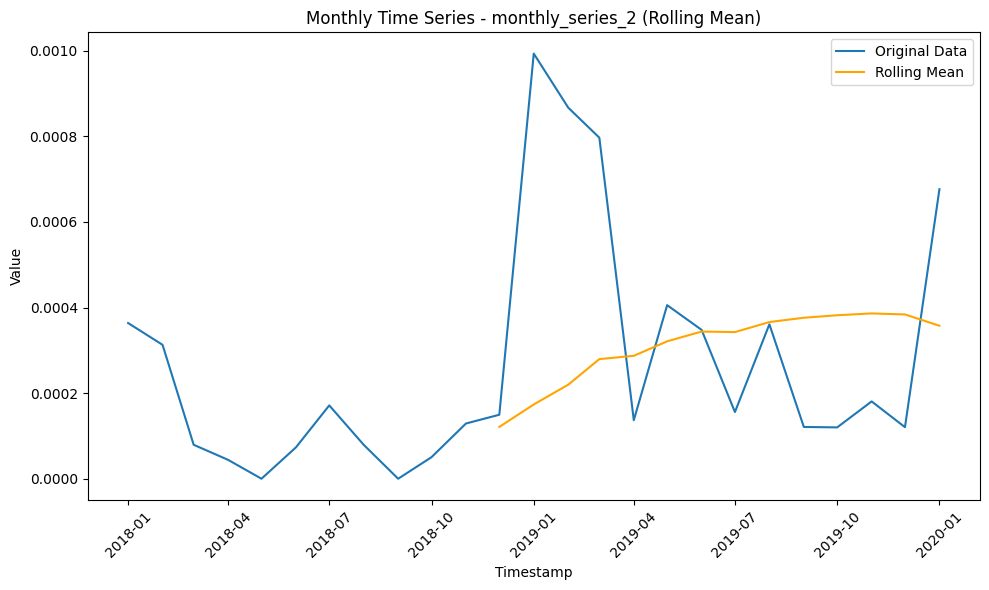

<Figure size 1000x600 with 0 Axes>

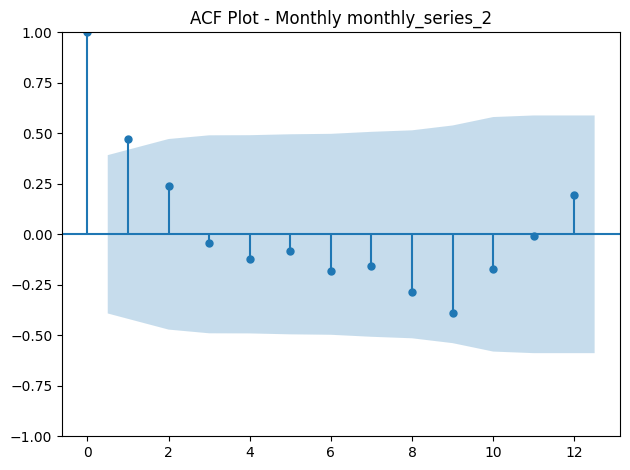

<Figure size 1000x600 with 0 Axes>

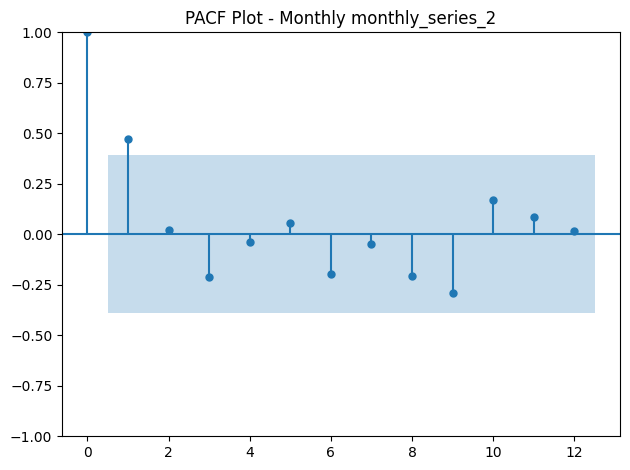

Decomposing series monthly_series_2 with period=12...


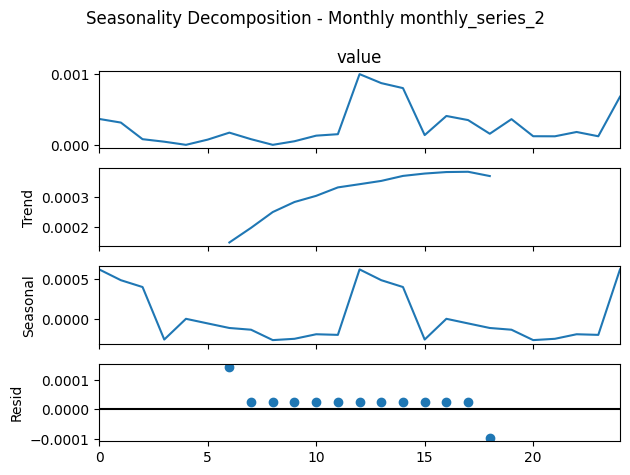

Plotting monthly data for monthly_series_3...

EDA for monthly_series_3:
       Unnamed: 0            timestamp      value
count   25.000000                   25  25.000000
mean    12.000000  2018-12-31 05:45:36   0.000283
min      0.000000  2018-01-01 00:00:00   0.000000
25%      6.000000  2018-07-01 00:00:00   0.000000
50%     12.000000  2019-01-01 00:00:00   0.000156
75%     18.000000  2019-07-01 00:00:00   0.000420
max     24.000000  2020-01-01 00:00:00   0.001530
std      7.359801                  NaN   0.000354
Missing values in monthly_series_3:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


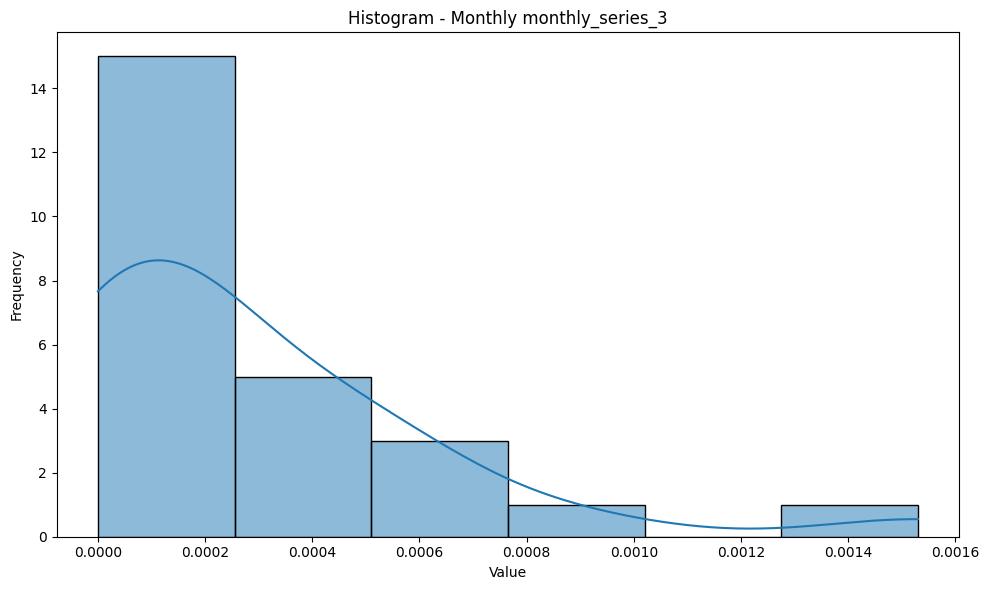

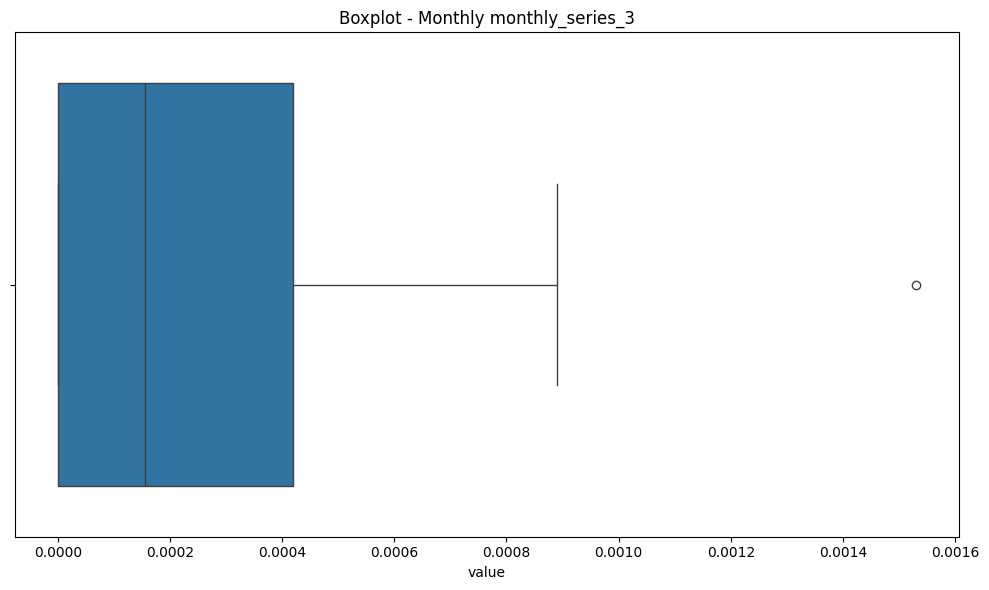

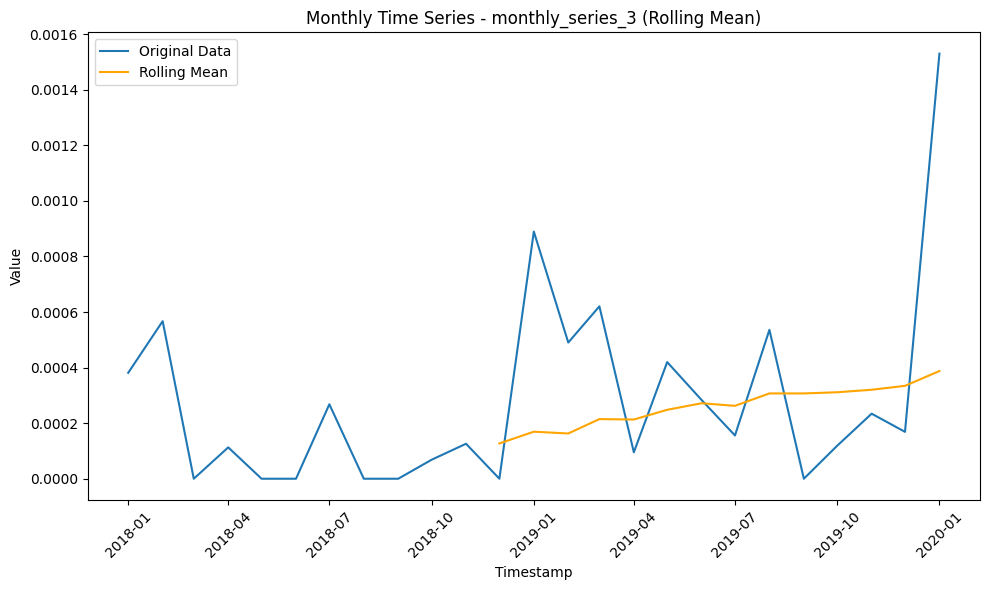

<Figure size 1000x600 with 0 Axes>

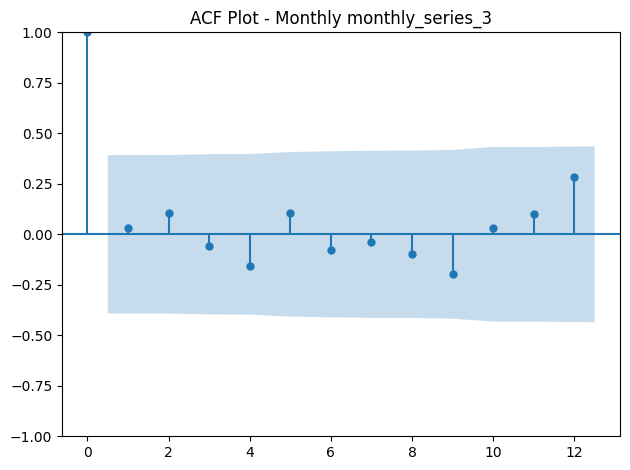

<Figure size 1000x600 with 0 Axes>

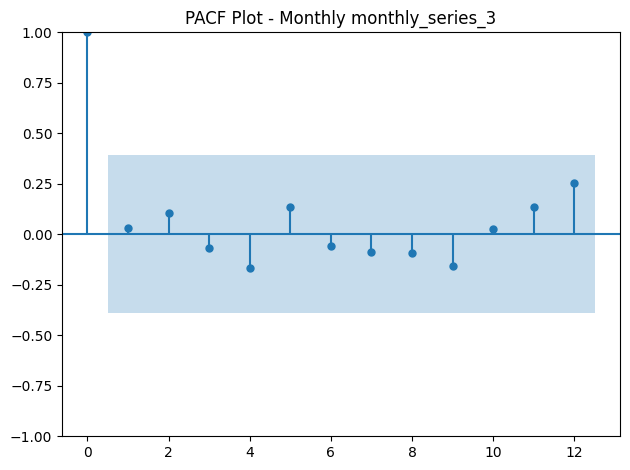

Decomposing series monthly_series_3 with period=12...


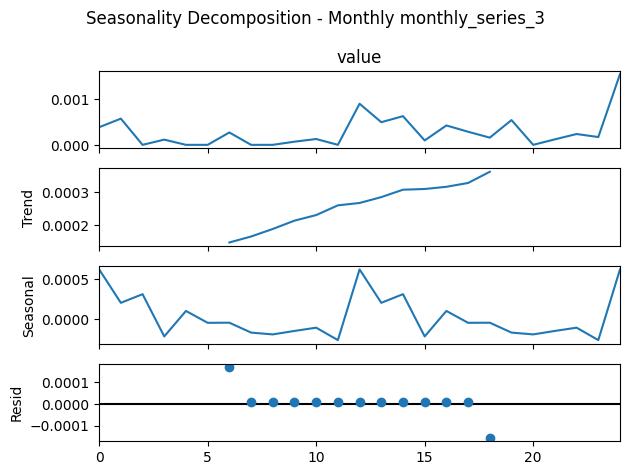

Plotting monthly data for monthly_series_4...

EDA for monthly_series_4:
       Unnamed: 0            timestamp      value
count   17.000000                   17  17.000000
mean     8.000000  2019-05-02 00:00:00   0.054178
min      0.000000  2018-09-01 00:00:00   0.000000
25%      4.000000  2019-01-01 00:00:00   0.000000
50%      8.000000  2019-05-01 00:00:00   0.036697
75%     12.000000  2019-09-01 00:00:00   0.057500
max     16.000000  2020-01-01 00:00:00   0.333333
std      5.049752                  NaN   0.078966
Missing values in monthly_series_4:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


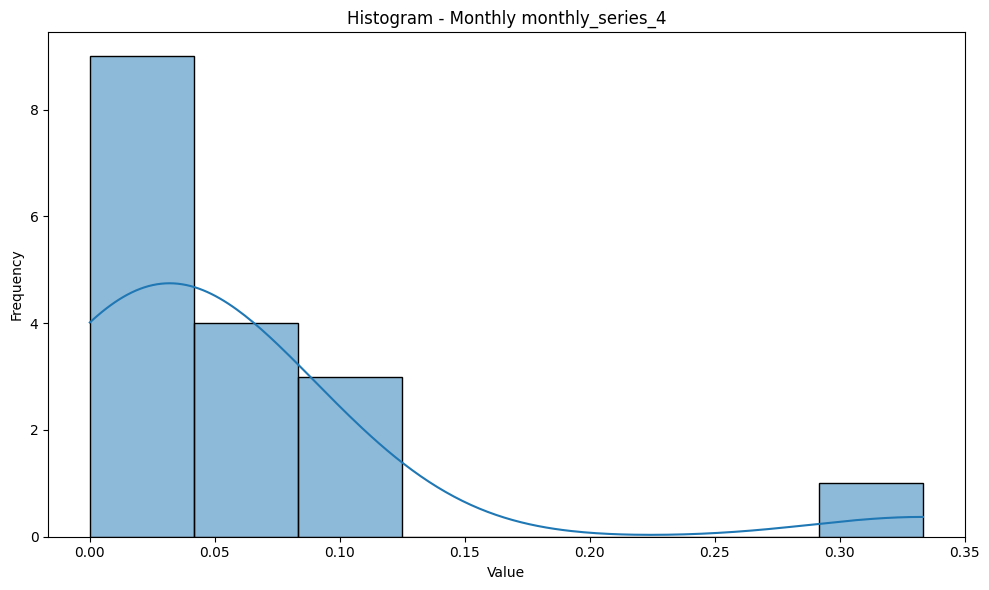

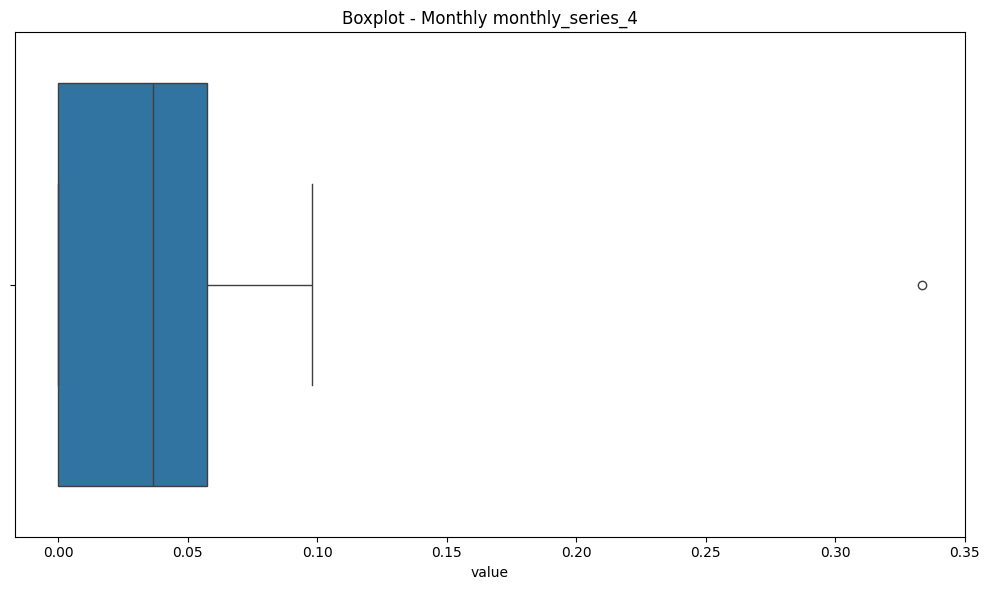

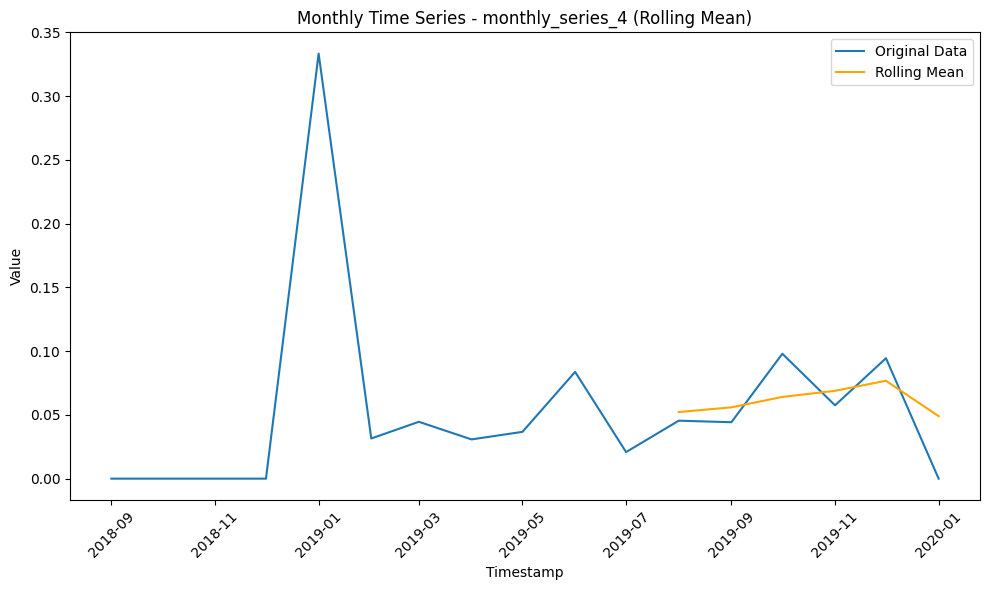

<Figure size 1000x600 with 0 Axes>

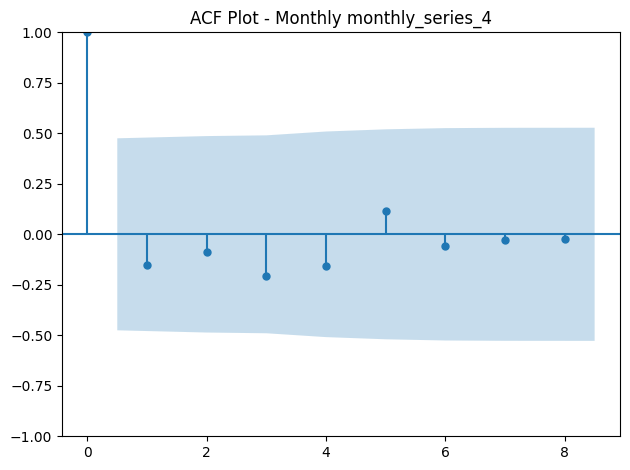

<Figure size 1000x600 with 0 Axes>

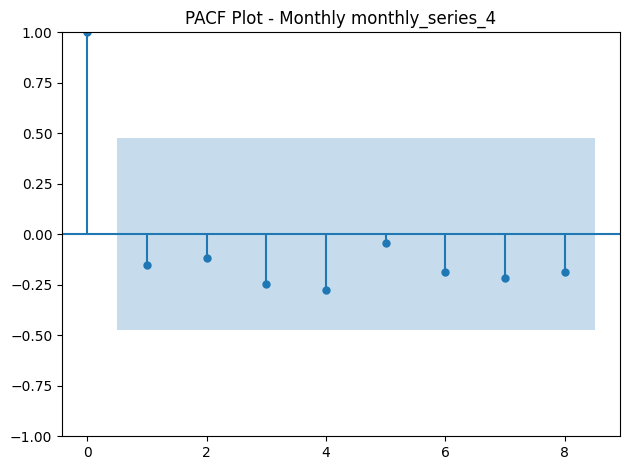

Decomposing series monthly_series_4 with period=8...


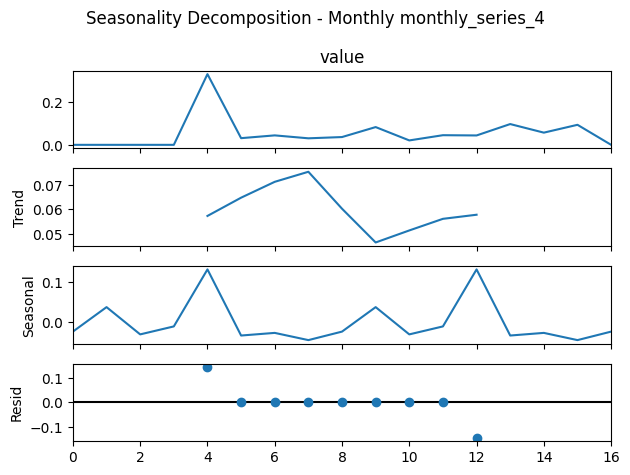

Plotting monthly data for monthly_series_5...

EDA for monthly_series_5:
       Unnamed: 0            timestamp      value
count   25.000000                   25  25.000000
mean    12.000000  2018-12-31 05:45:36   0.176218
min      0.000000  2018-01-01 00:00:00   0.145364
25%      6.000000  2018-07-01 00:00:00   0.164314
50%     12.000000  2019-01-01 00:00:00   0.177511
75%     18.000000  2019-07-01 00:00:00   0.189654
max     24.000000  2020-01-01 00:00:00   0.199722
std      7.359801                  NaN   0.015494
Missing values in monthly_series_5:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


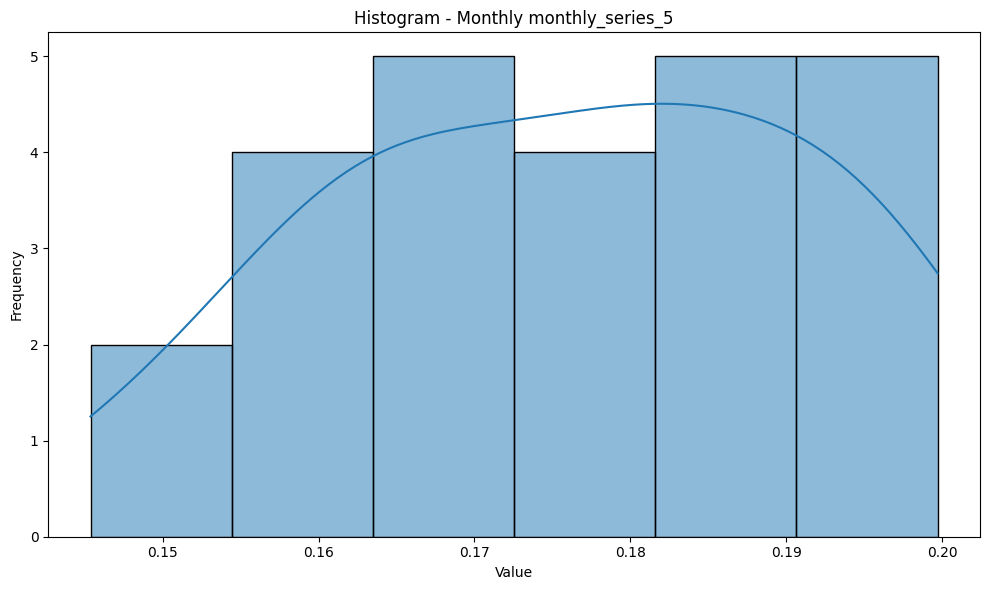

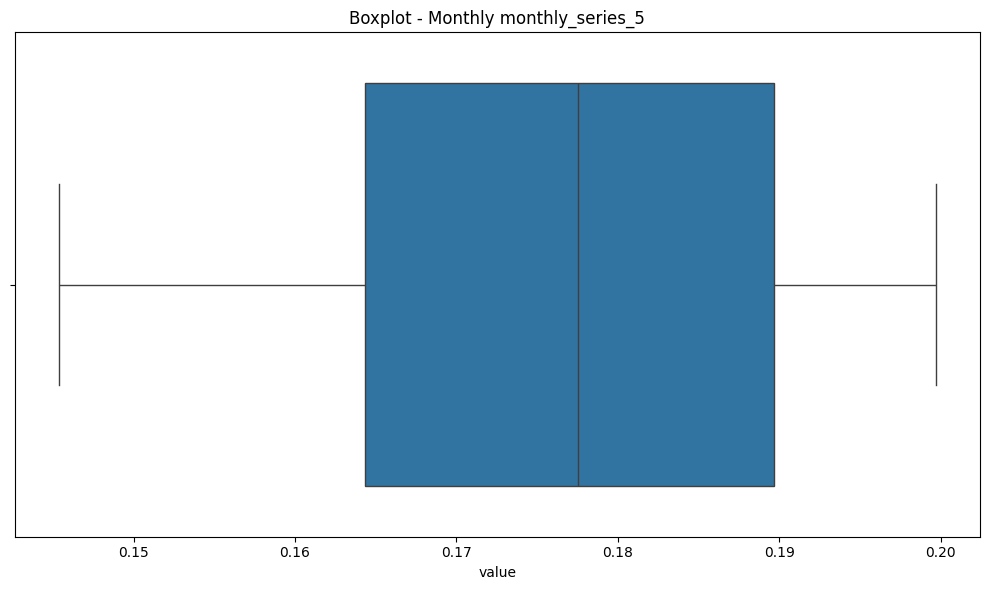

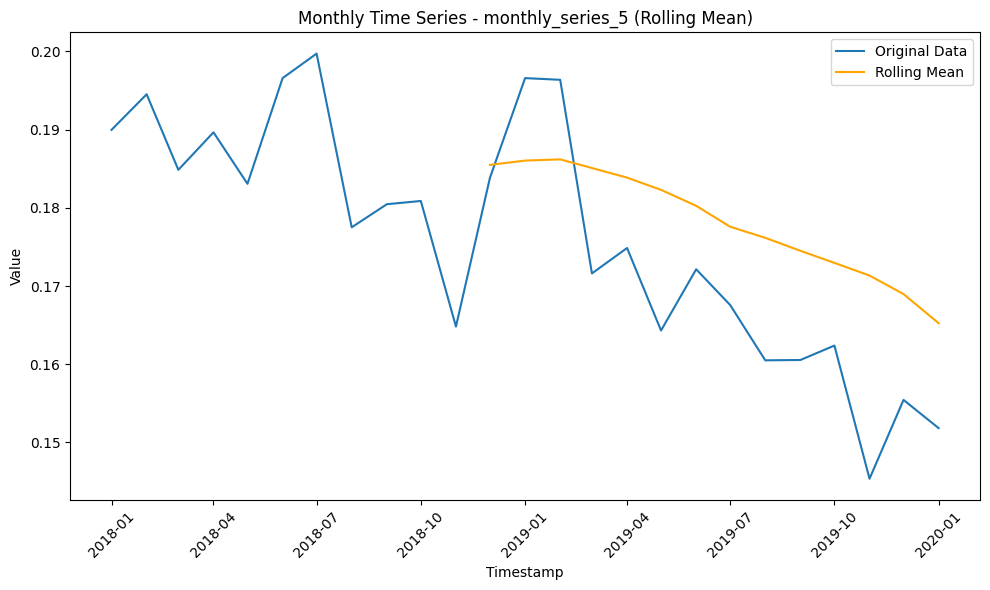

<Figure size 1000x600 with 0 Axes>

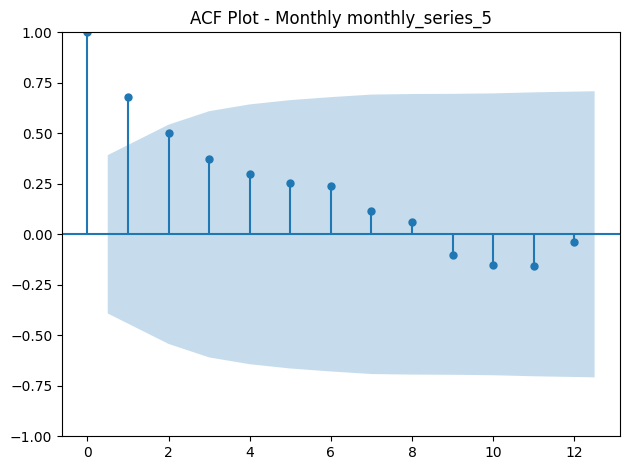

<Figure size 1000x600 with 0 Axes>

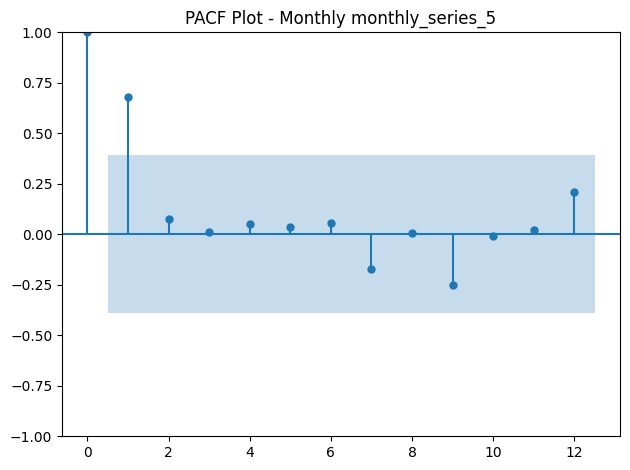

Decomposing series monthly_series_5 with period=12...


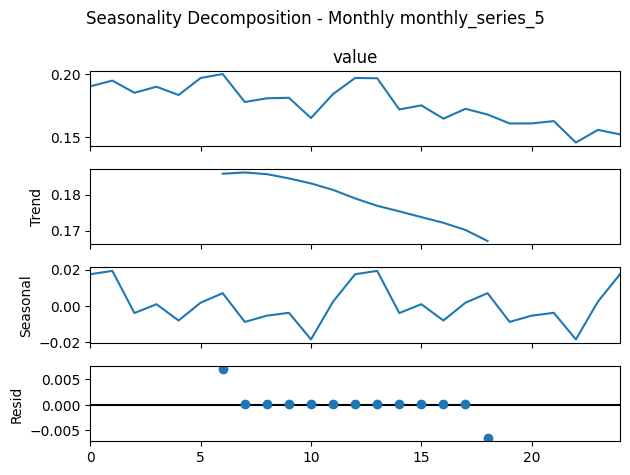

Plotting monthly data for monthly_series_6...

EDA for monthly_series_6:
       Unnamed: 0            timestamp      value
count   17.000000                   17  17.000000
mean     8.000000  2019-05-02 00:00:00   0.090922
min      0.000000  2018-09-01 00:00:00   0.068606
25%      4.000000  2019-01-01 00:00:00   0.079441
50%      8.000000  2019-05-01 00:00:00   0.087172
75%     12.000000  2019-09-01 00:00:00   0.104878
max     16.000000  2020-01-01 00:00:00   0.123207
std      5.049752                  NaN   0.017409
Missing values in monthly_series_6:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


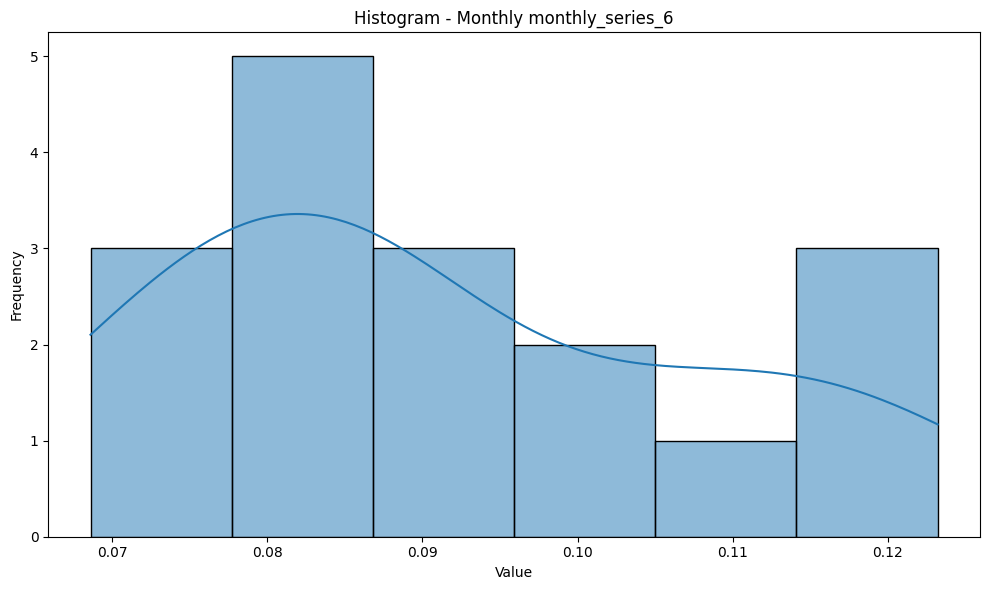

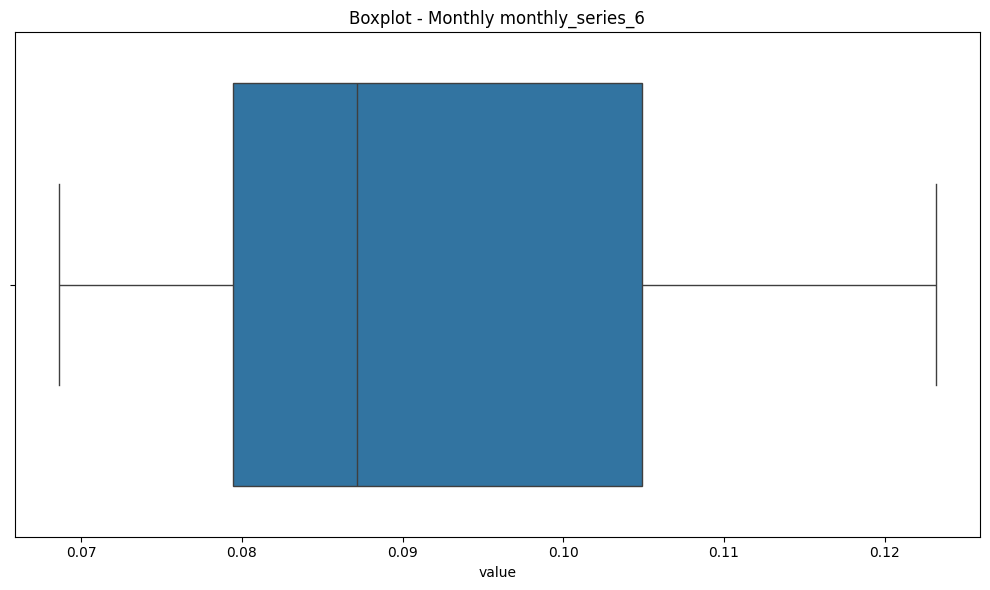

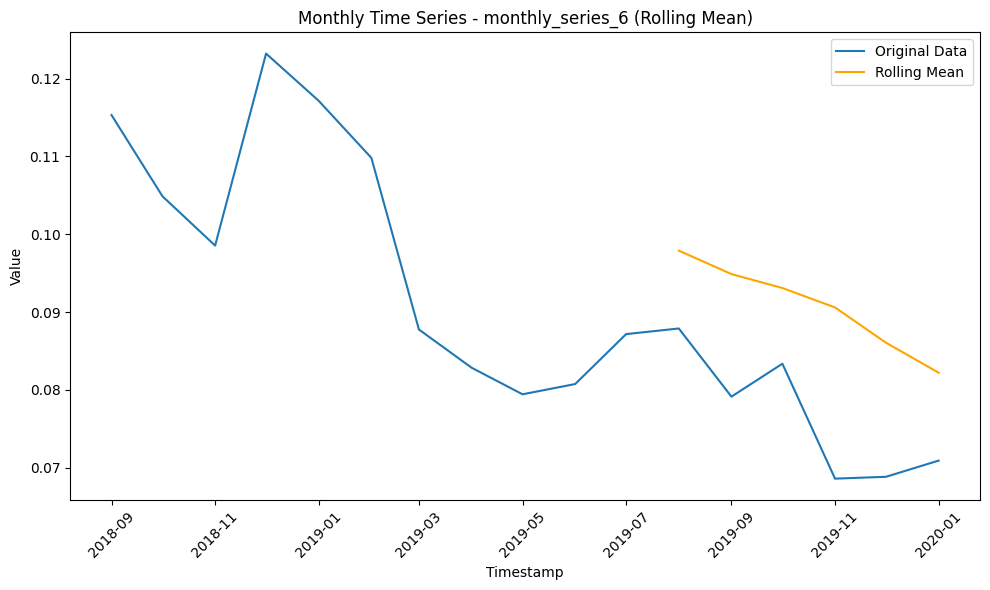

<Figure size 1000x600 with 0 Axes>

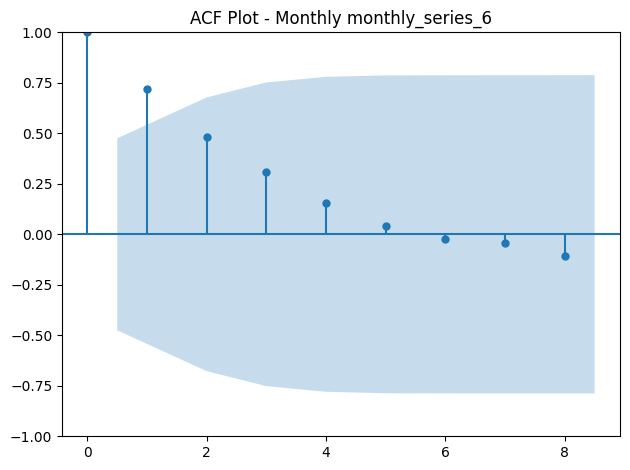

<Figure size 1000x600 with 0 Axes>

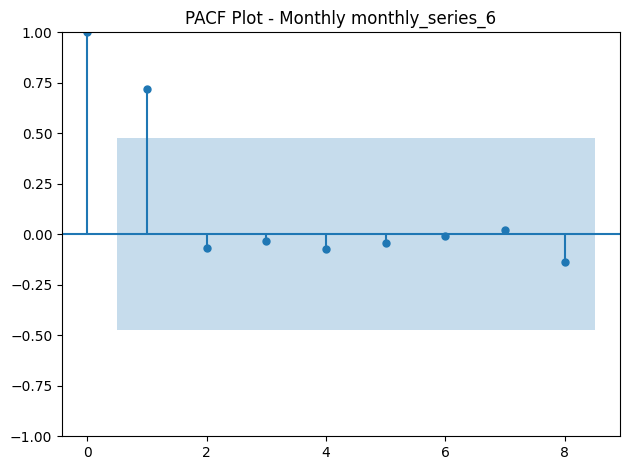

Decomposing series monthly_series_6 with period=8...


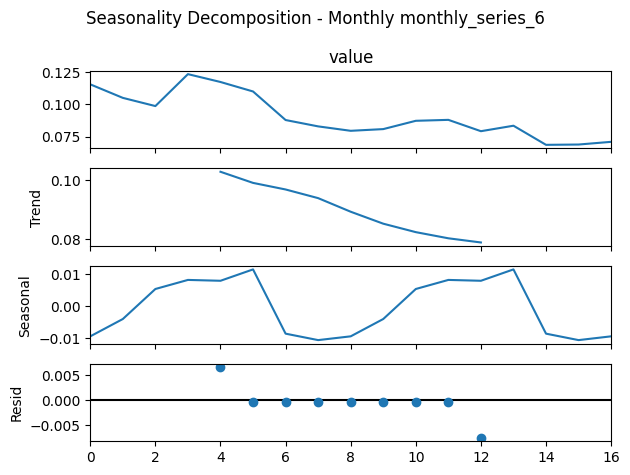

Plotting monthly data for monthly_series_7...

EDA for monthly_series_7:
       Unnamed: 0            timestamp      value
count   25.000000                   25  25.000000
mean    12.000000  2018-12-31 05:45:36   0.007851
min      0.000000  2018-01-01 00:00:00   0.000623
25%      6.000000  2018-07-01 00:00:00   0.007096
50%     12.000000  2019-01-01 00:00:00   0.008529
75%     18.000000  2019-07-01 00:00:00   0.009231
max     24.000000  2020-01-01 00:00:00   0.010708
std      7.359801                  NaN   0.002325
Missing values in monthly_series_7:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


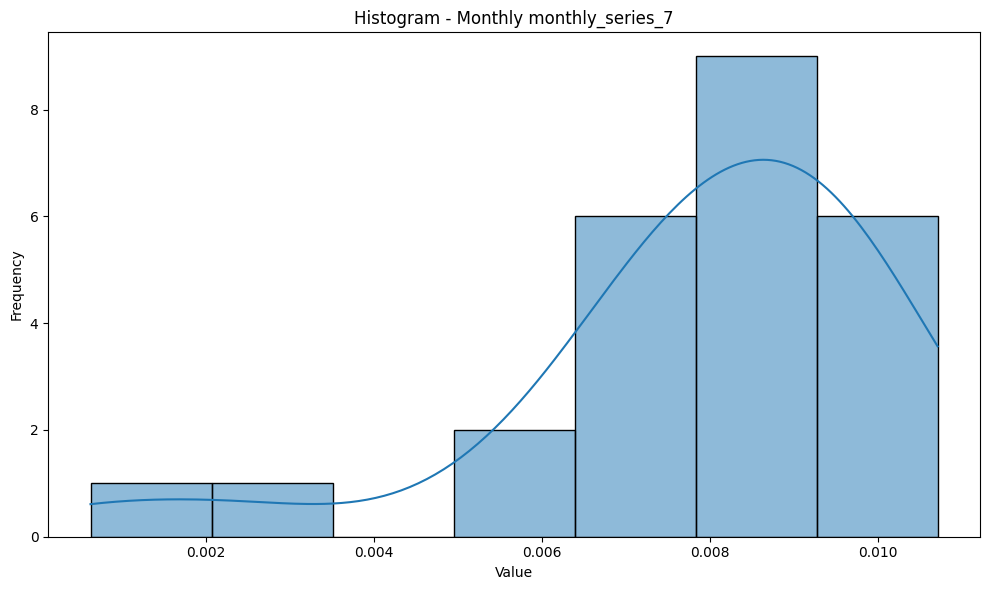

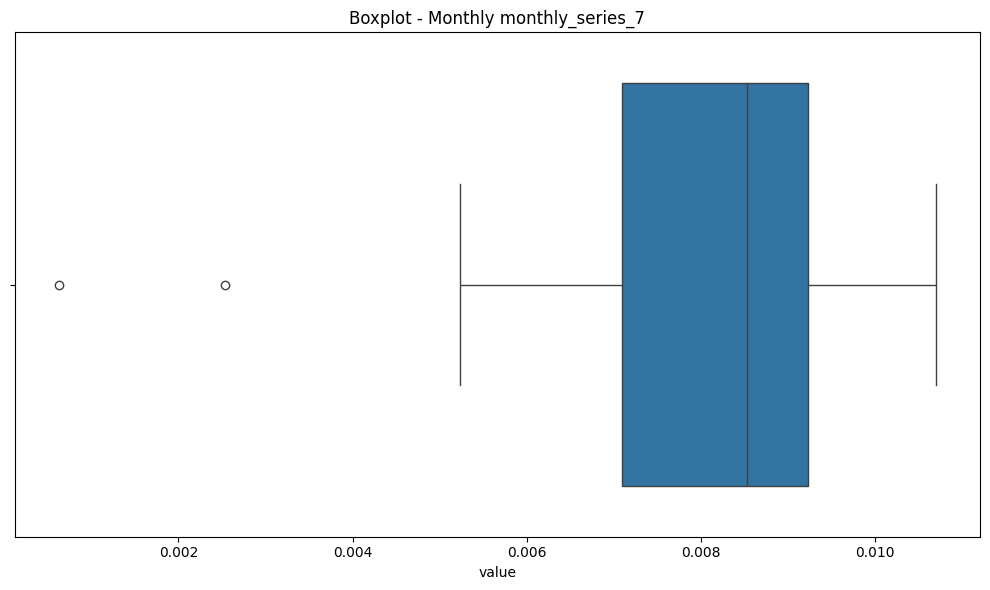

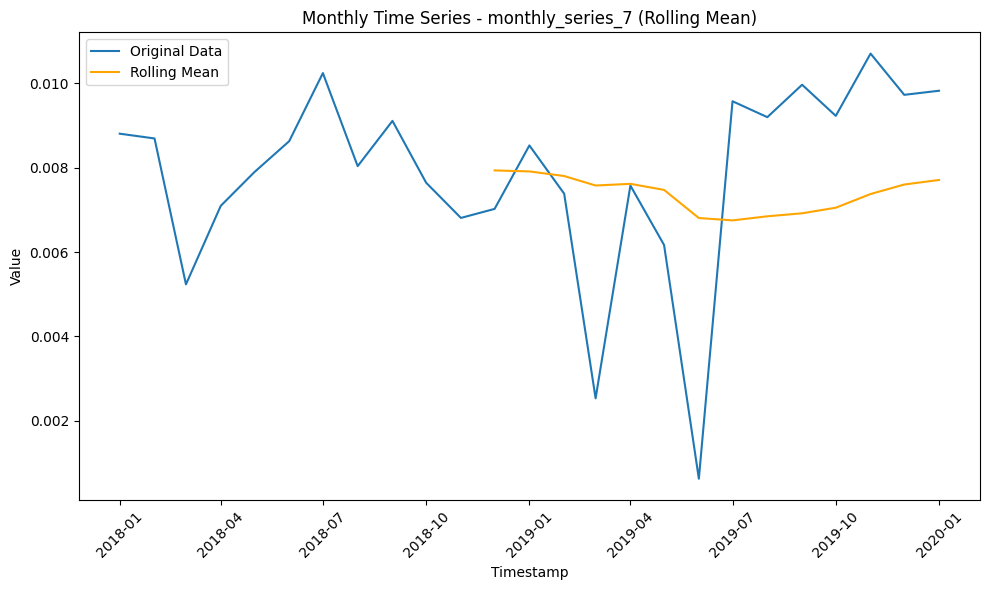

<Figure size 1000x600 with 0 Axes>

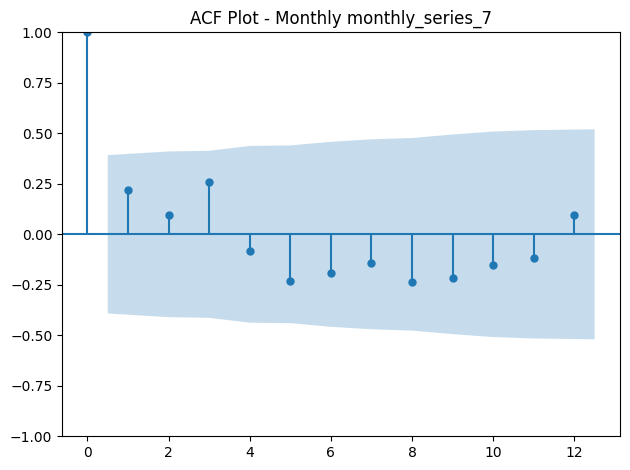

<Figure size 1000x600 with 0 Axes>

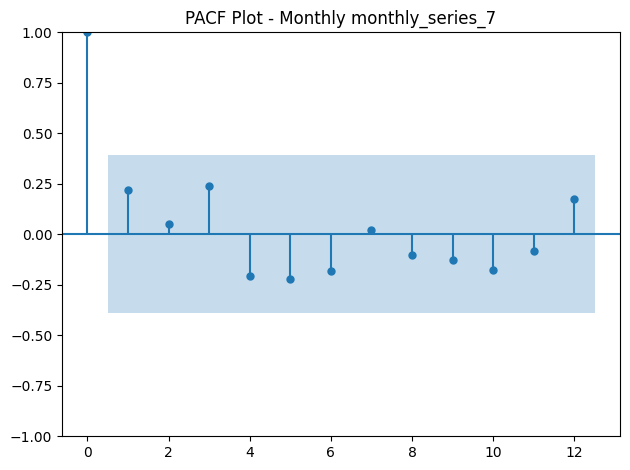

Decomposing series monthly_series_7 with period=12...


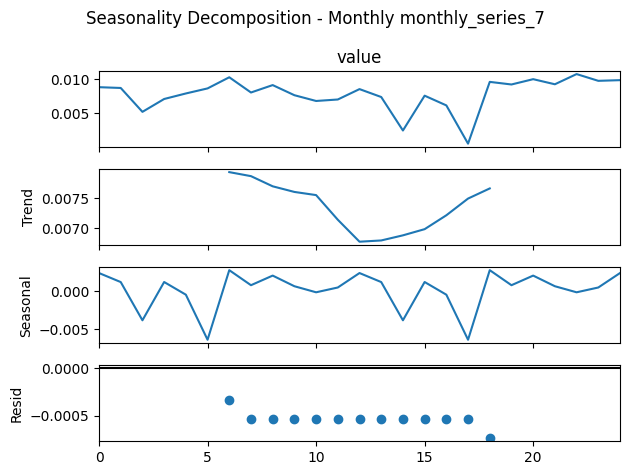

Plotting monthly data for monthly_series_8...

EDA for monthly_series_8:
       Unnamed: 0            timestamp      value
count   25.000000                   25  25.000000
mean    12.000000  2018-12-31 05:45:36   8.360000
min      0.000000  2018-01-01 00:00:00   7.000000
25%      6.000000  2018-07-01 00:00:00   8.000000
50%     12.000000  2019-01-01 00:00:00   8.000000
75%     18.000000  2019-07-01 00:00:00   9.000000
max     24.000000  2020-01-01 00:00:00   9.000000
std      7.359801                  NaN   0.637704
Missing values in monthly_series_8:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


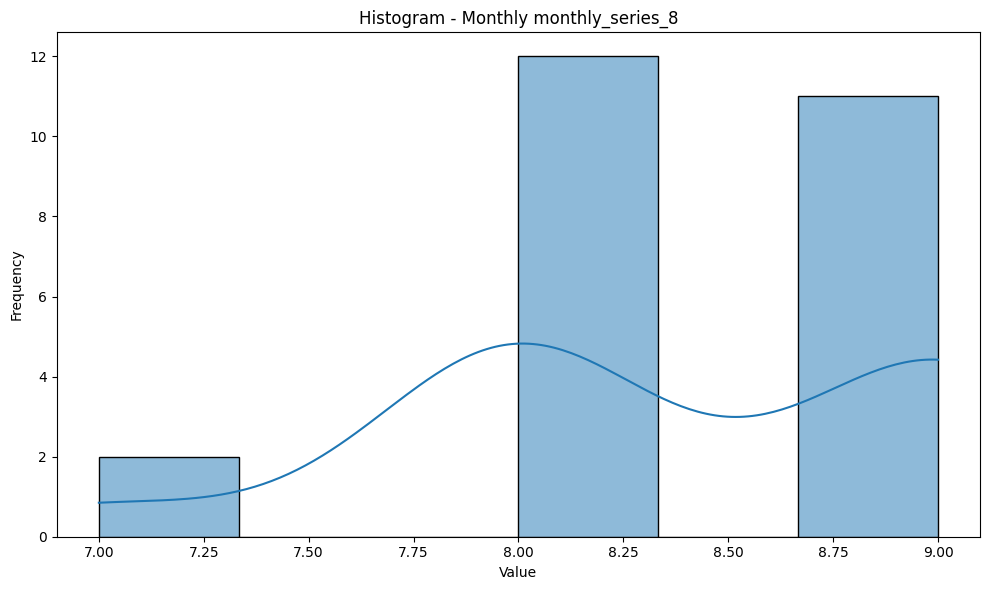

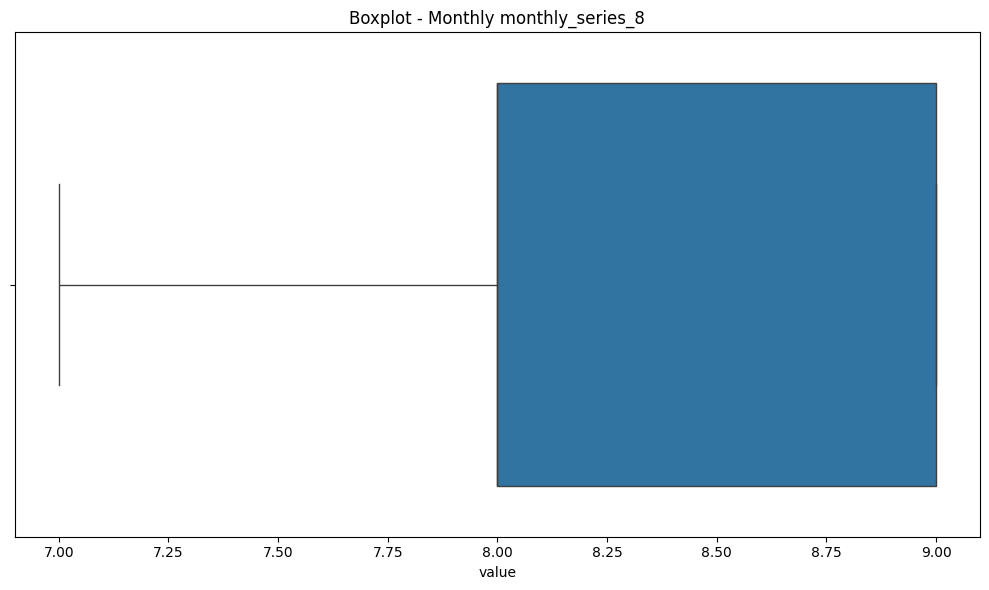

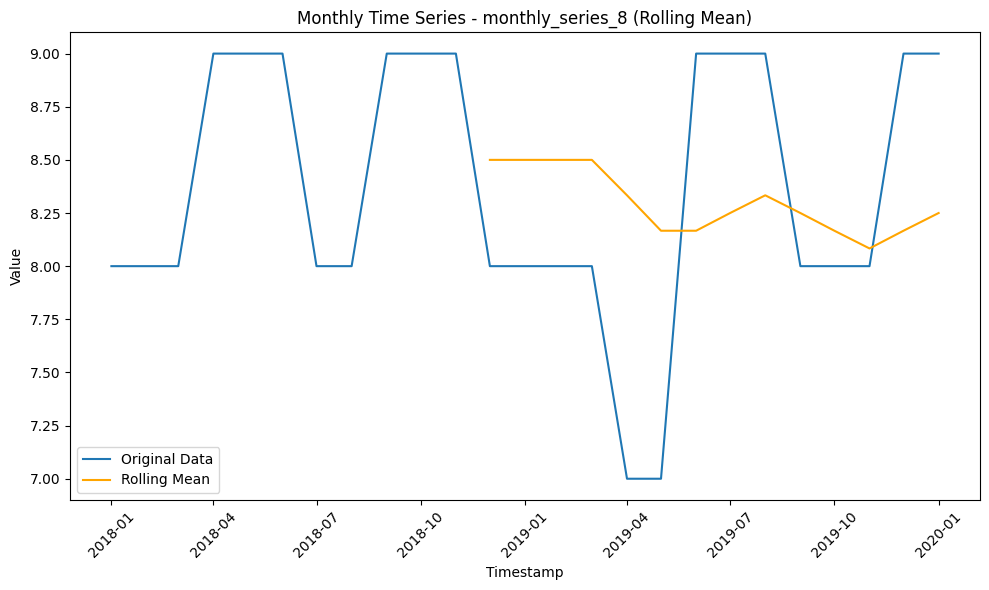

<Figure size 1000x600 with 0 Axes>

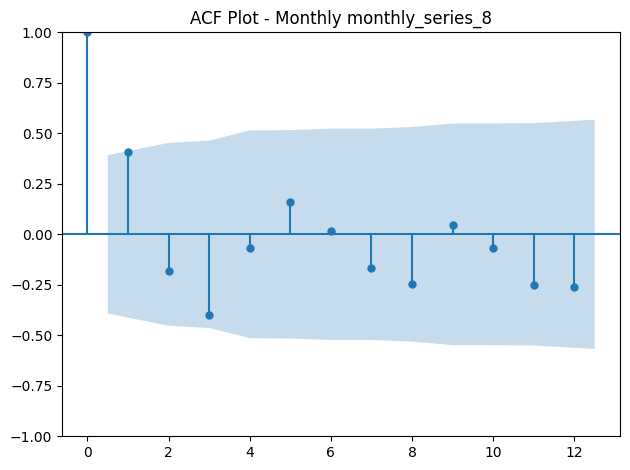

<Figure size 1000x600 with 0 Axes>

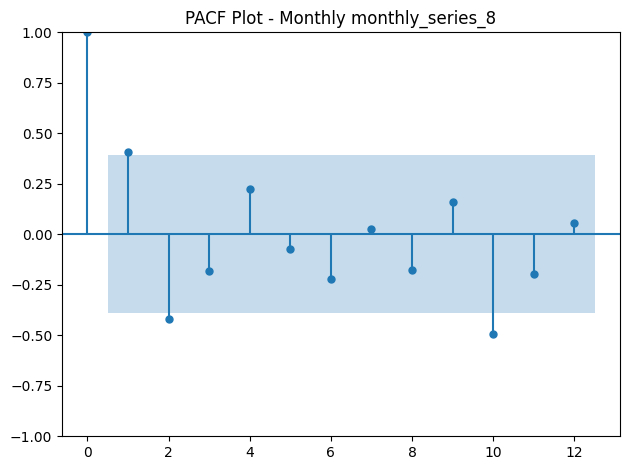

Decomposing series monthly_series_8 with period=12...


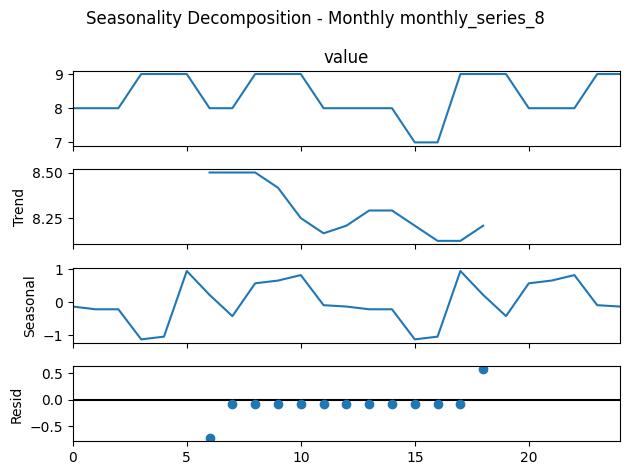

Plotting monthly data for monthly_series_9...

EDA for monthly_series_9:
       Unnamed: 0                      timestamp       value
count  291.000000                            291  291.000000
mean   145.000000  2009-01-30 08:54:25.979381504    4.175945
min      0.000000            1997-01-01 00:00:00    1.630000
25%     72.500000            2003-01-16 12:00:00    2.645000
50%    145.000000            2009-02-01 00:00:00    3.500000
75%    217.500000            2015-02-15 00:00:00    5.290000
max    290.000000            2021-03-01 00:00:00   13.420000
std     84.148678                            NaN    2.172401
Missing values in monthly_series_9:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64


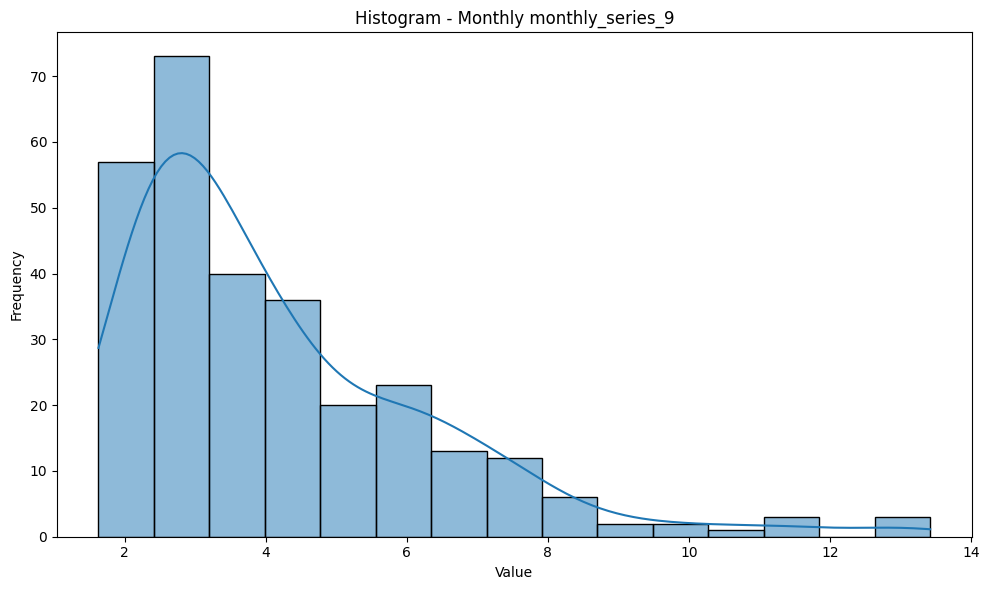

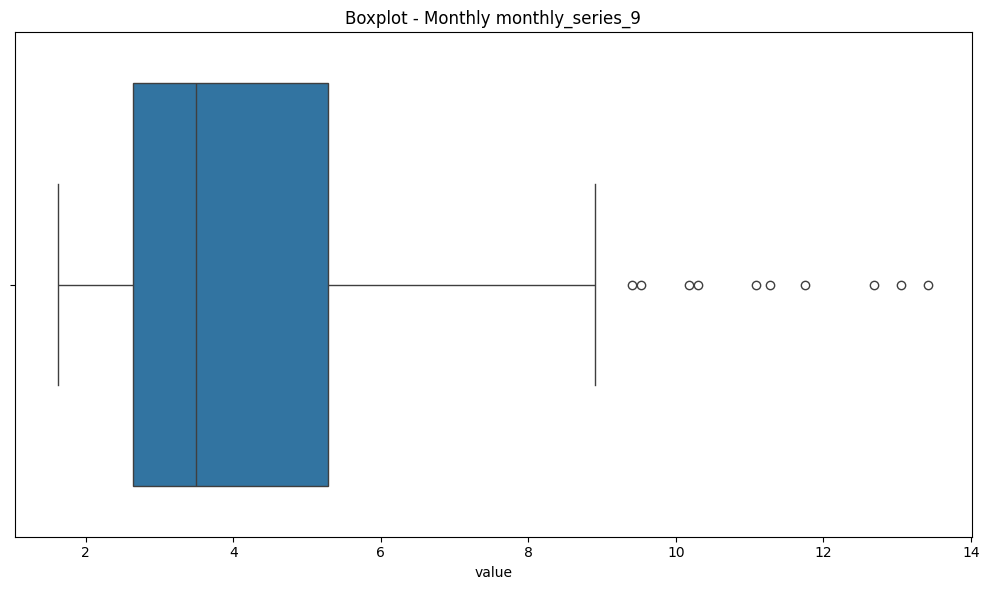

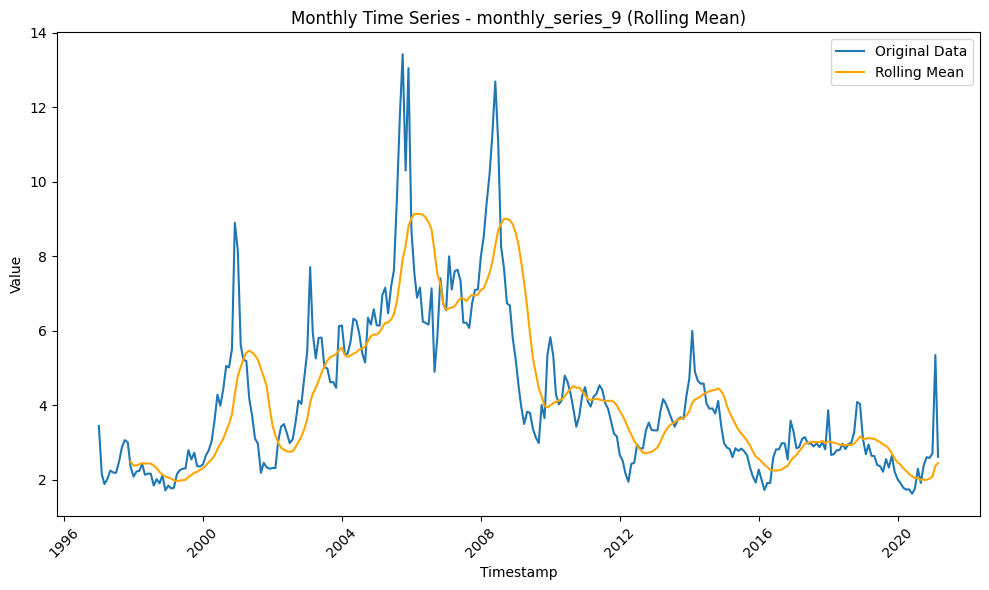

<Figure size 1000x600 with 0 Axes>

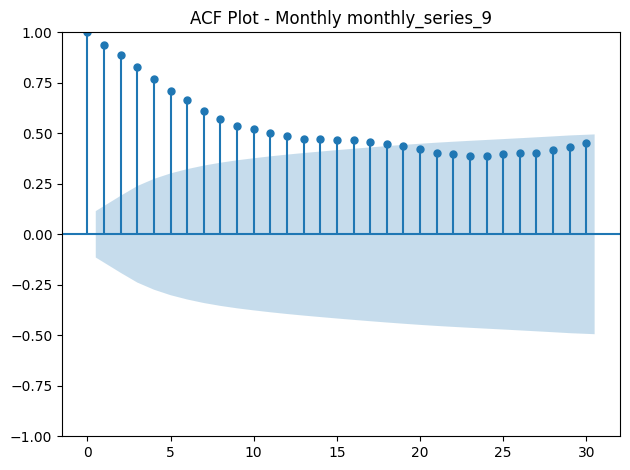

<Figure size 1000x600 with 0 Axes>

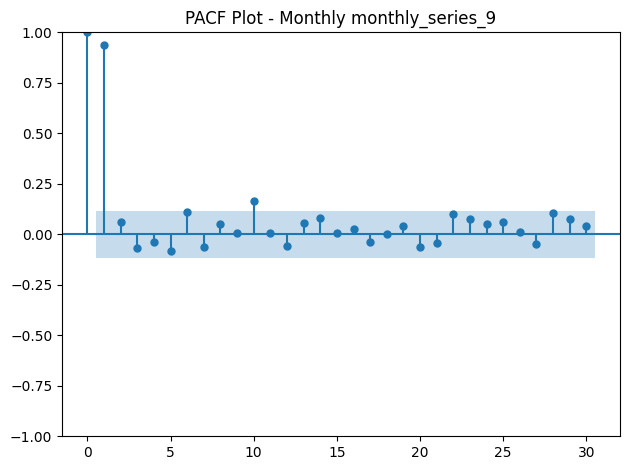

Decomposing series monthly_series_9 with period=12...


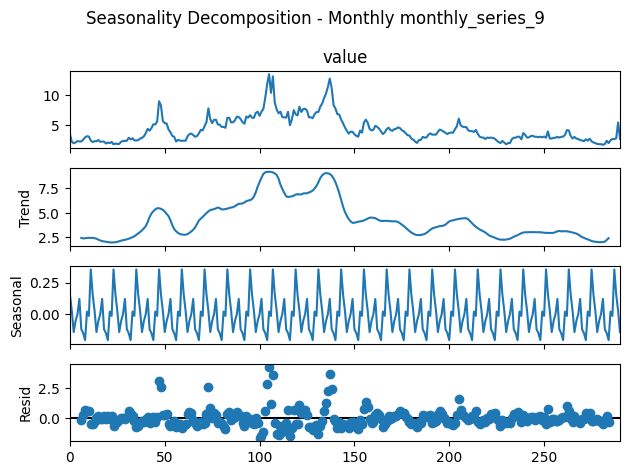

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

def plot_time_series_with_eda(df, granularity, series_name):
    
    print(f"\nEDA for {series_name}:")
    print(df.describe())  
    print(f"Missing values in {series_name}:")
    print(df.isnull().sum())  

    plt.figure(figsize=(10, 6))
    sns.histplot(df['value'], kde=True)
    plt.title(f'Histogram - {granularity.capitalize()} {series_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Boxplot for detecting outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['value'])
    plt.title(f'Boxplot - {granularity.capitalize()} {series_name}')
    plt.tight_layout()
    plt.show()

    # Plotting Time Series with rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['value'], label='Original Data')
    df['rolling_mean'] = df['value'].rolling(window=12).mean()
    plt.plot(df['timestamp'], df['rolling_mean'], label='Rolling Mean', color='orange')
    plt.title(f'{granularity.capitalize()} Time Series - {series_name} (Rolling Mean)')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ACF and PACF
 
    max_lags = min(len(df) // 2, 30)  

    plt.figure(figsize=(10, 6))
    plot_acf(df['value'], lags=max_lags)
    plt.title(f'ACF Plot - {granularity.capitalize()} {series_name}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(df['value'], lags=max_lags)
    plt.title(f'PACF Plot - {granularity.capitalize()} {series_name}')
    plt.tight_layout()
    plt.show()

    # Seasonality Decomposition 
    data_length = len(df)
    period = min(12, data_length // 2) 
    if data_length >= period * 2:
        print(f"Decomposing series {series_name} with period={period}...")
        result = seasonal_decompose(df['value'], model='additive', period=period)
        result.plot()
        plt.suptitle(f'Seasonality Decomposition - {granularity.capitalize()} {series_name}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for seasonality decomposition. Skipping decomposition for {series_name}.")

for granularity, time_series_list in all_data.items():
    for idx, df in enumerate(time_series_list):
        series_name = f"{granularity}_series_{idx+1}"
        print(f"Plotting {granularity} data for {series_name}...")
        plot_time_series_with_eda(df, granularity, series_name)


In [6]:
# Saving cleaned data in python list 

import os
import pandas as pd

cleaned_data_path = r'C:\Users\valin\OneDrive\DataGenieHackathon\cleaned_data'

all_cleaned_data = []

for subdir, dirs, files in os.walk(cleaned_data_path):
    for file in files:

        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            df = pd.read_csv(file_path)

            if 'Unnamed: 0' in df.columns:
                df.drop(columns=['Unnamed: 0'], inplace=True)
            
            df['series_name'] = file.split('.')[0]  
            granularity = os.path.basename(subdir)  
            df['granularity'] = granularity  
            all_cleaned_data.append(df)

print(f"Loaded {len(all_cleaned_data)} datasets into the 'all_cleaned_data' list.")
print(all_cleaned_data[0].head())


Loaded 36 datasets into the 'all_cleaned_data' list.
    timestamp  value  rolling_mean     series_name granularity
0  2019-07-14      6           NaN  daily_series_1       daily
1  2019-07-15      7           NaN  daily_series_1       daily
2  2019-07-16      6           NaN  daily_series_1       daily
3  2019-07-17      6           NaN  daily_series_1       daily
4  2019-07-18      7           NaN  daily_series_1       daily


Feature Extraction 
1. Stationarity (ADF Test p-value)
2. Trend Strength (Rolling Mean Standard Deviation)
3. Seasonality
4. Skewness & Kurtosis
5. Anomaly Count



In [9]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

log_file = 'feature_extraction_log.txt'

def make_stationary(series):
    series = series.copy()
    if series.max() / (series.mean() + 1e-10) > 1e6 or series.min() == 0:
        series = np.log1p(series.replace(0, 1e-10))
    is_differenced = False
    try:
        pvalue = adfuller(series.dropna())[1]
        if pvalue > 0.05:
            series = series.diff().dropna()
            is_differenced = True
    except Exception as e:
        print(f"Warning: ADF test failed due to: {e}")
        pvalue = 1.0  
    return series, is_differenced


def detect_seasonality(series, period):
    try:
        acf_values = acf(series.dropna(), nlags=period * 2, fft=False)
        return acf_values[period] > 0.5  
    except Exception as e:
        print(f"Warning: Seasonality detection failed due to: {e}")
        return False

def auto_detect_seasonal_period(series):
    try:
        series = series.dropna()
        if len(series) < 3:
            return 7 
        freqs, power = periodogram(series)
        if len(power) > 1:
            peak_freq = freqs[np.argmax(power[1:]) + 1]  
            if peak_freq > 0:
                period = int(round(1 / peak_freq))
                return max(period, 1)
    except Exception as e:
        print(f"Warning: Periodogram failed due to: {e}")
    return 7  

def detect_anomalies(df):
    df['is_anomaly'] = df['value'] > df['value'].mean() + 3 * df['value'].std()  
    return df

all_features = []
for idx, df in enumerate(all_cleaned_data):
    series_name = df['series_name'].iloc[0]
    granularity = df['granularity'].iloc[0] 
    print(f"\nProcessing dataset: {series_name} ({granularity})")

    if df.empty or 'value' not in df.columns or df['value'].dropna().shape[0] < 3:
        print(f"Warning: Skipping dataset '{series_name}' due to insufficient data.")
        continue

    series, _ = make_stationary(df['value'])
    df['value'] = series

    df_with_anomalies = detect_anomalies(df)  

    seasonal_period = auto_detect_seasonal_period(df['value'])

    try:
        stationarity_pvalue = adfuller(df['value'].dropna())[1]
    except Exception as e:
        print(f"Warning: ADF test failed due to: {e}")
        stationarity_pvalue = 1.0

    try:
        trend_strength = df['value'].rolling(7).mean().std()
    except Exception as e:
        print(f"Warning: Trend calculation failed: {e}")
        trend_strength = np.nan

    skewness = df['value'].skew()
    kurtosis = df['value'].kurt()
    seasonality = detect_seasonality(df['value'], seasonal_period)

    features = {
        'series_name': series_name,
        'num_observations': len(df),
        'mean': df['value'].mean(),
        'variance': df['value'].var(),
        'skewness': skewness,
        'kurtosis': kurtosis,
        'trend_strength': trend_strength,
        'stationarity_pvalue': stationarity_pvalue,
        'seasonality': seasonality,
        'anomaly_count': df_with_anomalies['is_anomaly'].sum()
    }

    all_features.append(features)

if not all_features:
    print("No valid datasets were processed.")
else:
    feature_df = pd.DataFrame(all_features)
    
    print("\nExtracted Features for All Datasets")
    print(feature_df.to_string(index=False))

    with open(log_file, 'a') as f:
        f.write("\nExtracted Features for All Datasets\n")
        f.write(feature_df.to_string(index=False) + "\n")

    # Summary

    total_datasets = len(feature_df)
    avg_observations = feature_df['num_observations'].mean()
    observations_range = (feature_df['num_observations'].min(), feature_df['num_observations'].max())
    avg_anomalies = feature_df['anomaly_count'].mean()
    max_anomalies = feature_df['anomaly_count'].max()
    seasonality_count = feature_df['seasonality'].sum()
    seasonality_percent = (seasonality_count / total_datasets) * 100
    stationary_count = feature_df[feature_df['stationarity_pvalue'] < 0.05].shape[0]
    stationary_percent = (stationary_count / total_datasets) * 100

    print("\n=== Feature Extraction Summary ===")
    print(f"Total Datasets Processed: {total_datasets}")
    print(f"Average Observations: {avg_observations} (Range: {observations_range[0]} to {observations_range[1]})")
    print(f"Average Anomalies per Dataset: {avg_anomalies} (Max: {max_anomalies})")
    print(f"Seasonality Detected in: {seasonality_count} datasets ({seasonality_percent:.2f}%)")
    print(f"Stationary Series (p-value < 0.05): {stationary_count} datasets ({stationary_percent:.2f}%)")

    with open(log_file, 'a') as f:
        f.write("\n=== Feature Extraction Summary ===\n")
        f.write(f"Total Datasets Processed: {total_datasets}\n")
        f.write(f"Average Observations: {avg_observations} (Range: {observations_range[0]} to {observations_range[1]})\n")
        f.write(f"Average Anomalies per Dataset: {avg_anomalies} (Max: {max_anomalies})\n")
        f.write(f"Seasonality Detected in: {seasonality_count} datasets ({seasonality_percent:.2f}%)\n")
        f.write(f"Stationary Series (p-value < 0.05): {stationary_count} datasets ({stationary_percent:.2f}%)\n")

    # Interpretation
    
    print("\n=== Conclusion ===")
    print("The feature extraction revealed a diverse set of time series with varying lengths and characteristics. "
          f"Approximately {seasonality_percent:.2f}% of datasets exhibit seasonality, and an average of {avg_anomalies:.2f} anomalies per dataset highlight potential outliers. "
          f"Most series ({stationary_percent:.2f}%) are stationary, supporting robust model fitting.")

    with open(log_file, 'a') as f:
        f.write("\n=== Conclusion ===\n")
        f.write(f"The feature extraction revealed a diverse set of time series with varying lengths and characteristics. "
                f"Approximately {seasonality_percent:.2f}% of datasets exhibit seasonality, and an average of {avg_anomalies:.2f} anomalies per dataset highlight potential outliers. "
                f"Most series ({stationary_percent:.2f}%) are stationary, supporting robust model fitting.\n")
        
    feature_df.to_csv('extracted_features.csv', index=False)
    print("Feature DataFrame exported to 'extracted_features.csv'")




Processing dataset: daily_series_1 (daily)

Processing dataset: daily_series_10 (daily)

Processing dataset: daily_series_2 (daily)

Processing dataset: daily_series_3 (daily)

Processing dataset: daily_series_4 (daily)

Processing dataset: daily_series_5 (daily)

Processing dataset: daily_series_6 (daily)

Processing dataset: daily_series_7 (daily)

Processing dataset: daily_series_8 (daily)

Processing dataset: daily_series_9 (daily)

Processing dataset: hourly_series_1 (hourly)

Processing dataset: hourly_series_10 (hourly)

Processing dataset: hourly_series_2 (hourly)

Processing dataset: hourly_series_3 (hourly)

Processing dataset: hourly_series_4 (hourly)

Processing dataset: hourly_series_5 (hourly)

Processing dataset: hourly_series_6 (hourly)

Processing dataset: hourly_series_7 (hourly)

Processing dataset: hourly_series_8 (hourly)

Processing dataset: hourly_series_9 (hourly)

Processing dataset: monthly_series_1 (monthly)

Processing dataset: monthly_series_2 (monthly)

P

Time SeriesModel Training and Evaluation with Rolling Features

Models :Naive Forecast Model,Holt-Winters (Exponential Smoothing) Model,ARIMA model

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings("ignore")

def naive_forecast(train_data, test_data):
    forecast = [train_data.iloc[-1]] * len(test_data)
    return np.array(forecast)

def holt_winters(train_data, test_data):
    try:
        model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
        model_fitted = model.fit()
        forecast = model_fitted.forecast(len(test_data))
        return forecast
    except Exception:
        return np.array([np.nan] * len(test_data))

def arima(train_data, test_data):
    try:
        model = ARIMA(train_data, order=(5, 1, 0))
        model_fitted = model.fit()
        forecast = model_fitted.forecast(steps=len(test_data))
        return forecast
    except Exception:
        return np.array([np.nan] * len(test_data))

def calculate_mape(y_true, y_pred):
    try:
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100
        if np.isinf(mape) or np.isnan(mape):
            return np.nan
        return mape
    except Exception:
        return np.nan

def extract_dynamic_features(series):
    features = {}

    try:
        adf_pvalue = adfuller(series.dropna())[1]
    except:
        adf_pvalue = np.nan
    features['adf_pvalue'] = adf_pvalue

    rolling_mean = series.rolling(window=min(5, len(series))).mean()
    features['trend_strength'] = rolling_mean.std()
    
    try:
        features['seasonality_strength'] = series.autocorr(lag=12) if len(series) >= 13 else np.nan
    except:
        features['seasonality_strength'] = np.nan

    features['skewness'] = skew(series.dropna())
    features['kurtosis'] = kurtosis(series.dropna())

    mean_val = series.mean()
    std_val = series.std()
    if std_val > 0:
        anomaly_count = ((np.abs(series - mean_val) > 3 * std_val).sum())
    else:
        anomaly_count = 0
    features['anomaly_count'] = anomaly_count

    return features

features_df = pd.read_csv('extracted_features.csv')

all_results = []
all_features = []

model_counts = {'naive': 0, 'holt_winters': 0, 'arima': 0}

print("\n Processing datasets...\n")

for idx, row in features_df.iterrows():
    series_name = row['series_name']

    series_values = np.random.normal(loc=row['mean'], scale=row['variance'], size=row['num_observations'])
    
    series_data = pd.Series(series_values)
    series_data.index = pd.date_range(start='2000-01-01', periods=len(series_data), freq='MS') 
    if len(series_data) < 3:
        print(f" Skipping dataset '{series_name}' due to insufficient data.")
        continue

    train_size = int(0.8 * len(series_data))
    train_data = series_data[:train_size]
    test_data = series_data[train_size:]
    
    # Rolling forecast
    for i in range(len(test_data)):
        current_train_data = pd.concat([train_data, test_data[:i]])
        dynamic_features = extract_dynamic_features(current_train_data)


        preds_naive = naive_forecast(current_train_data, test_data[i:i+1])
        preds_hw = holt_winters(current_train_data, test_data[i:i+1])
        preds_arima = arima(current_train_data, test_data[i:i+1])
        
        mape_naive = calculate_mape(test_data[i:i+1], preds_naive)
        mape_hw = calculate_mape(test_data[i:i+1], preds_hw)
        mape_arima = calculate_mape(test_data[i:i+1], preds_arima)

        model_mapes = {
            'naive': mape_naive,
            'holt_winters': mape_hw,
            'arima': mape_arima
        }

        best_model = min(model_mapes, key=lambda k: model_mapes[k] if not np.isnan(model_mapes[k]) else np.inf)

        model_counts[best_model] += 1

        result_entry = {
            'series_name': series_name,
            'forecast_point': len(train_data) + i + 1,
            'mean': row['mean'],
            'variance': row['variance'],
            'num_observations': row['num_observations'],
            'mape_naive': mape_naive,
            'mape_holt_winters': mape_hw,
            'mape_arima': mape_arima,
            'best_model': best_model
        }
        result_entry.update(dynamic_features)
        all_results.append(result_entry)

        feature_entry = {
            'series_name': series_name,
            'forecast_point': len(train_data) + i + 1
        }
        feature_entry.update(dynamic_features)
        all_features.append(feature_entry)

        print(f"{series_name} | Point {len(train_data) + i + 1} | Best: {best_model} | MAPE: {model_mapes[best_model]:.2f}%")

results_df = pd.DataFrame(all_results)
results_df.to_csv('final_results_with_features.csv', index=False)
print("\n Full results saved to 'final_results_with_features.csv'")

features_only_df = pd.DataFrame(all_features)
features_only_df.to_csv('rolling_features.csv', index=False)
print(" Features saved to 'rolling_features.csv'")

print("\n📊 Model selection counts (number of times chosen as best model):")
for model_name, count in model_counts.items():
    print(f"{model_name}: {count} times")



🚀 Processing datasets...

✅ daily_series_1 | Point 597 | Best: holt_winters | MAPE: 8.46%
✅ daily_series_1 | Point 598 | Best: naive | MAPE: 2.04%
✅ daily_series_1 | Point 599 | Best: holt_winters | MAPE: 2.91%
✅ daily_series_1 | Point 600 | Best: naive | MAPE: 1.46%
✅ daily_series_1 | Point 601 | Best: naive | MAPE: 0.57%
✅ daily_series_1 | Point 602 | Best: holt_winters | MAPE: 6.61%
✅ daily_series_1 | Point 603 | Best: naive | MAPE: 0.49%
✅ daily_series_1 | Point 604 | Best: holt_winters | MAPE: 0.22%
✅ daily_series_1 | Point 605 | Best: holt_winters | MAPE: 10.00%
✅ daily_series_1 | Point 606 | Best: arima | MAPE: 2.30%
✅ daily_series_1 | Point 607 | Best: holt_winters | MAPE: 4.59%
✅ daily_series_1 | Point 608 | Best: naive | MAPE: 0.59%
✅ daily_series_1 | Point 609 | Best: holt_winters | MAPE: 4.40%
✅ daily_series_1 | Point 610 | Best: naive | MAPE: 5.98%
✅ daily_series_1 | Point 611 | Best: holt_winters | MAPE: 0.11%
✅ daily_series_1 | Point 612 | Best: holt_winters | MAPE: 3.1

Classifier building 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import catboost
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.impute import SimpleImputer

df = pd.read_csv('final_results_with_features.csv')

label_encoder = LabelEncoder()
df['best_model_encoded'] = label_encoder.fit_transform(df['best_model'])

X = df.drop(columns=['best_model', 'best_model_encoded', 'series_name', 'forecast_point'])  
y = df['best_model_encoded']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': catboost.CatBoostClassifier(learning_rate=0.1, iterations=500, random_state=42, verbose=0)
}

results = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()

    results[name] = {
        'Accuracy': accuracy,
        'F1-score': f1,
        'Confusion Matrix': cm,
        'Cross-validation Mean Accuracy': cv_mean
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Cross-validation Mean Accuracy: {cv_mean:.4f}\n")
    
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])  
print(f"Best Model: {best_model_name}")

best_model = classifiers[best_model_name]
best_model.fit(X_train, y_train)

with open(f'best_model_{best_model_name}.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model saved as 'best_model_{best_model_name}.pkl'")


Random Forest Results:
Accuracy: 0.8517
F1-score: 0.8516
Confusion Matrix:
[[123  24   8]
 [ 15 189   4]
 [  6  21 136]]
Cross-validation Mean Accuracy: 0.5285

XGBoost Results:
Accuracy: 0.9087
F1-score: 0.9086
Confusion Matrix:
[[136  13   6]
 [  5 198   5]
 [  5  14 144]]
Cross-validation Mean Accuracy: 0.8095

Logistic Regression Results:
Accuracy: 0.3973
F1-score: 0.2873
Confusion Matrix:
[[  2 125  28]
 [  0 185  23]
 [  0 141  22]]
Cross-validation Mean Accuracy: 0.4125

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 2104, number of used features: 12
[LightGBM] [Info] Start training from score -1.307715
[LightGBM] [Info] Start training from score -0.852540
[LightGBM] [Info] Start training from score -1.193257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overh